In [1]:
source("Main.R")
source("Conf.R")
source("Utilities.R")
source("DAVID_query.R")
library("factoextra")
library("maptree")
library("ggpubr")

library(repr)
fileDir = "/home/beraslan/jovian-work/analysisSingle/"
library("GeneOverlap")

corrplot 0.92 loaded



ERROR: Error in library("pls"): there is no package called ‘pls’


In [13]:
factorGeneGroups <- readRDS(paste0("/home/beraslan/jovian-work/analysisSingle/R/factorGeneGroups.rds"))
DC_cellstate_genes <- data.frame(read.csv(paste0("/home/beraslan/jovian-work/analysisSingle/PositiveControls/DC_cellstate_genes.csv")))
Known_programs <- data.frame(read.csv(paste0("/home/beraslan/jovian-work/analysisSingle/PositiveControls/Known_programs.csv")))
TNFcontrols <- data.frame(read.csv(paste0("/home/beraslan/jovian-work/analysisSingle/PositiveControls/TNFcontrols.csv")))


In [44]:
allGeneSets = list()

for(i in 1:ncol(DC_cellstate_genes)){
    k = unlist(sapply(DC_cellstate_genes[,i], function(x){return(strsplit(as.character(x), " "))}))
    k = k[k!=""]
    allGeneSets <- lappend(allGeneSets, k)
}

for(i in 1:ncol(Known_programs)){
    k = unlist(sapply(Known_programs[,i], function(x){return(strsplit(as.character(x), " "))}))
    k = k[k!=""]
    allGeneSets <- lappend(allGeneSets, k)
}

for(i in 1:ncol(TNFcontrols)){
    k = unlist(sapply(TNFcontrols[,i], function(x){return(strsplit(as.character(x), " "))}))
    k = k[k!=""]
    allGeneSets <- lappend(allGeneSets, k)
}

In [47]:
names(allGeneSets) = c(colnames(DC_cellstate_genes), colnames(Known_programs), colnames(TNFcontrols))

In [48]:
allGeneSets

$Mitochondrial.genes
 [1] "mt-Nd1"  "mt-Nd2"  "mt-Co1"  "mt-Co2"  "mt-Atp8" "mt-Atp6" "mt-Co3" 
 [8] "mt-Nd3"  "mt-Nd4l" "mt-Nd4"  "mt-Nd5"  "mt-Nd6"  "mt-Cytb"

$pDC.genes
 [1] "Sell"    "Atp1b1"  "Fcrla"   "Hsd11b1" "Slpi"    "Gm43291" "Cd8b1"  
 [8] "Cd8a"    "Klk1"    "Siglech" "Cox6a2"  "Bst2"    "Rpgrip1" "Ccr9"   
[15] "Ly6d"    "Ly6c2"   "Mzb1"   

$RBC.genes
[1] "Hbb-bs" "Hba-a1" "Hba-a2" "Hbb-bt"

$Mast.cell.genes
[1] "Cma1"   "Tpsab1" "Cpa3"   "Tpsb2"  "Mcpt4"  "Fcer1a"

$T.NK.genes
  [1] "Khdc1a"        "Zap70"         "2010300C02Rik" "Il18r1"       
  [5] "Il18rap"       "Fhl2"          "Gm17767"       "Stat4"        
  [9] "Cd28"          "Ctla4"         "Icos"          "Ikzf2"        
 [13] "Serpine2"      "Pdcd1"         "Bcl2"          "Tmem163"      
 [17] "Cd55"          "Il10"          "Lax1"          "Atp2b4"       
 [21] "Rgs16"         "Rabgap1l"      "Fasl"          "Xcl1"         
 [25] "Cd247"         "Fcrl6"         "Traf3ip3"      "4930570N18Rik"
 [29] "Lamb3"         "Hsd11b1"       "Gata3"         "Itih5"        
 [33] "Prkcq"         "Il2ra"         "Nrarp"         "Lcn4"         
 [37] "Qrfp"          "Fam102a"       "Neb"           "Cobll1"       
 [41] "Galnt3"        "Stk39"         "Ddb2"          "Trp53i11"     
 [45] "Dusp2"         "Gm14029"       "Cst7"          "Sdcbp2"       
 [49] "a"             "Sla2"          "Ppp1r16b"      "Eya2"         
 [53] "Phactr3"       "Foxp3"         "Pim2"          "Sept6"        
 [57] "Sh2d1a"        "Stk26"         "Cd40lg"        "Xlr4a"        
 [61] "Ar"            "Cxcr3"         "Zdhhc15"       "P2ry10"       
 [65] "Gpr174"        "Itm2a"         "Tmsb15a"       "Tmsb15l"      
 [69] "Zcchc18"       "Spin2c"        "Gpm6b"         "Gm8817"       
 [73] "Car2"          "Pde7a"         "Tnik"          "Gm42921"      
 [77] "Gpr87"         "Pear1"         "Sh2d2a"        "Fam189b"      
 [81] "Muc1"          "Cd160"         "Cd2"           "Ptpn22"       
 [85] "Ppm1j"         "Gm42722"       "Dennd2d"       "Csf1"         
 [89] "S1pr1"         "Lef1"          "Slc9b2"        "St6galnac3"   
 [93] "Penk"          "Tox"           "Gem"           "Fam92a"       
 [97] "Sit1"          "D630039A03Rik" "Bspry"         "Rgs3"         
[101] "Tnfsf8"        "Mllt3"         "Sgip1"         "Faah"         
[105] "Lck"           "Adgrb2"        "Sytl1"         "Ubxn11"       
[109] "Ncmap"         "Camk2n1"       "Padi2"         "Tnfrsf9"      
[113] "Tnfrsf25"      "Prkcz"         "Tnfrsf4"       "Tnfrsf18"     
[117] "Crot"          "Gm8879"        "Gm5861"        "Krtcap3"      
[121] "Jakmip1"       "Crmp1"         "Clnk"          "Arap2"        
[125] "Txk"           "Hopxos"        "Areg"          "Spp1"         
[129] "Gfi1"          "Tesc"          "A930024E05Rik" "Rhof"         
[133] "Hip1r"         "Vps37b"        "Abcb9"         "Pitpnm2"      
[137] "Ccdc92"        "Gm36551"       "Card11"        "Tecpr1"       
[141] "Wdr95"         "Rab19"         "Gimap8"        "Gimap9"       
[145] "Gimap4"        "Gimap6"        "Gimap7"        "Gimap1"       
[149] "Gimap5"        "4833403J16Rik" "Gimap3"        "Osbpl3"       
[153] "Gprin3"        "Il12rb2"       "Cd8b1"         "Cd8a"         
[157] "Gm44040"       "Vgll4"         "Klrg1"         "Slc2a3"       
[161] "Cd4"           "Lag3"          "Cd27"          "Klrb1a"       
[165] "Klrb1c"        "Klrb1f"        "Klre1"         "Klrd1"        
[169] "Klrk1"         "Klrc2"         "Klrc1"         "Klri2"        
[173] "Klra5"         "Klra6"         "Klra4"         "Klra8"        
[177] "Klra9"         "Klra7"         "Klra10"        "Klra3"        
[181] "Klra1"         "Styk1"         "Lockd"         "Kcnj8"        
[185] "Ncr1"          "Klc3"          "Rinl"          "Lgals7"       
[189] "Hcst"          "Zbtb32"        "Nkg7"          "Klk8"         
[193] "Flt3l"         "Dkkl1"         "Sult2b1"       "Fam169b"      
[197] "Mctp2"         "Fam174b"       "Ntrk3"         "Nmb"          
[

In [51]:
guideModuleClusterings= c("ME_GuideModules_biClustering_6_Modules", 
                          "ME_GuideModules_kmeans_5_Modules",
                          "ME_GuideModules_kmeans_6_Modules",
                          "ME_GuideModules_kmeans_7_Modules",
                          "ME_GuideModules_kmeans_8_Modules",
                          "ME_GuideModules_leiden_5_Modules",
                          "ME_GuideModules_leiden_6_Modules",
                          "ME_GuideModules_leiden_8_Modules")

geneModuleClusterings= c("ME_GeneModules_biClustering_10_Modules",
                          "ME_GeneModules_kmeans_7_Modules",
                          "ME_GeneModules_kmeans_8_Modules",
                          "ME_GeneModules_kmeans_9_Modules",
                          "ME_GeneModules_leiden_8_Modules",
                          "ME_GeneModules_leiden_9_Modules")



In [4]:
factorGeneGroups[[1]][[1]]

[1] "H2.K1"    "H2.D1"    "B2m"      "Laptm5"   "Psap"     "Ctsb"    
  [7] "Ms4a7"    "Il1rn"    "Alcam"    "Sgk1"     "Lhfpl2"   "Ccdc88a" 
 [13] "H2.M2"    "Anxa2"    "Actb"     "Atp5e"    "Hspa5"    "Cdh1"    
 [19] "Pabpc1"   "Eif3e"    "Cox4i1"   "Cox7a2l"  "Uqcrh"    "Aprt"    
 [25] "Eif1"     "Eef1g"    "Gapdh"    "Ncl"      "Hspa8"    "Hsp90ab1"
 [31] "Btf3"     "Eif3k"    "Ssr4"     "Rps20"    "Rps13"    "Rps23"   
 [37] "Tpt1"     "Fau"      "Rps19"    "Rpl19"    "Rpl27a"   "Rps16"   
 [43] "Rps5"     "Rpl30"    "Rps27a"   "Rpl18a"   "Rplp1"    "Rps28"   
 [49] "Eef1a1"   "Rpl23a"   "Rplp2"    "Rps29"    "Rps27"    "Rps26"   
 [55] "Rplp0"    "Rps12"    "Rpsa"     "Rpl7"     "Rpl35a"   "Rpl15"   
 [61] "Rps6"     "Rps7"     "Rps10"    "Rpl32"    "Rps8"     "Rpl9"    
 [67] "Rpl13"    "Rpl26"    "Rpl23"    "Rps24"    "Rps3a1"   "Rpl31"   
 [73] "Rps15"    "Rps9"     "Rpl37a"   "Rpl37"    "Rpl17"    "Rps4x"   
 [79] "Rpl5"     "Rps14"    "Rpl24"    "Rpl29"    "Rpl12"    "Rps2"    
 [85] "Npm1"     "Rpl14"    "Rps25"    "Rpl21"    "Rpl22"    "Naca"    
 [91] "Rpl4"     "Rpl36"    "Rps17"    "Rpl35"    "Rps18"    "Rps3"    
 [97] "Rpl34"    "Rpl18"    "Rpl11"    "Rpl28"    "Rpl3"     "Rpl10a"  
[103] "Eef1b2"   "Rpl6"     "Rpl7a"    "Rpl8"     "Rack1"    "Rps11"   
[109] "Rps21"    "Rpl36a"   "Rps15a"   "Rpl10"    "Rpl39"    "Eif3f"   
[115] "Rpl22l1"  "Rpl38"    "Rpl13a"   "Rpl41"    "Eef2"

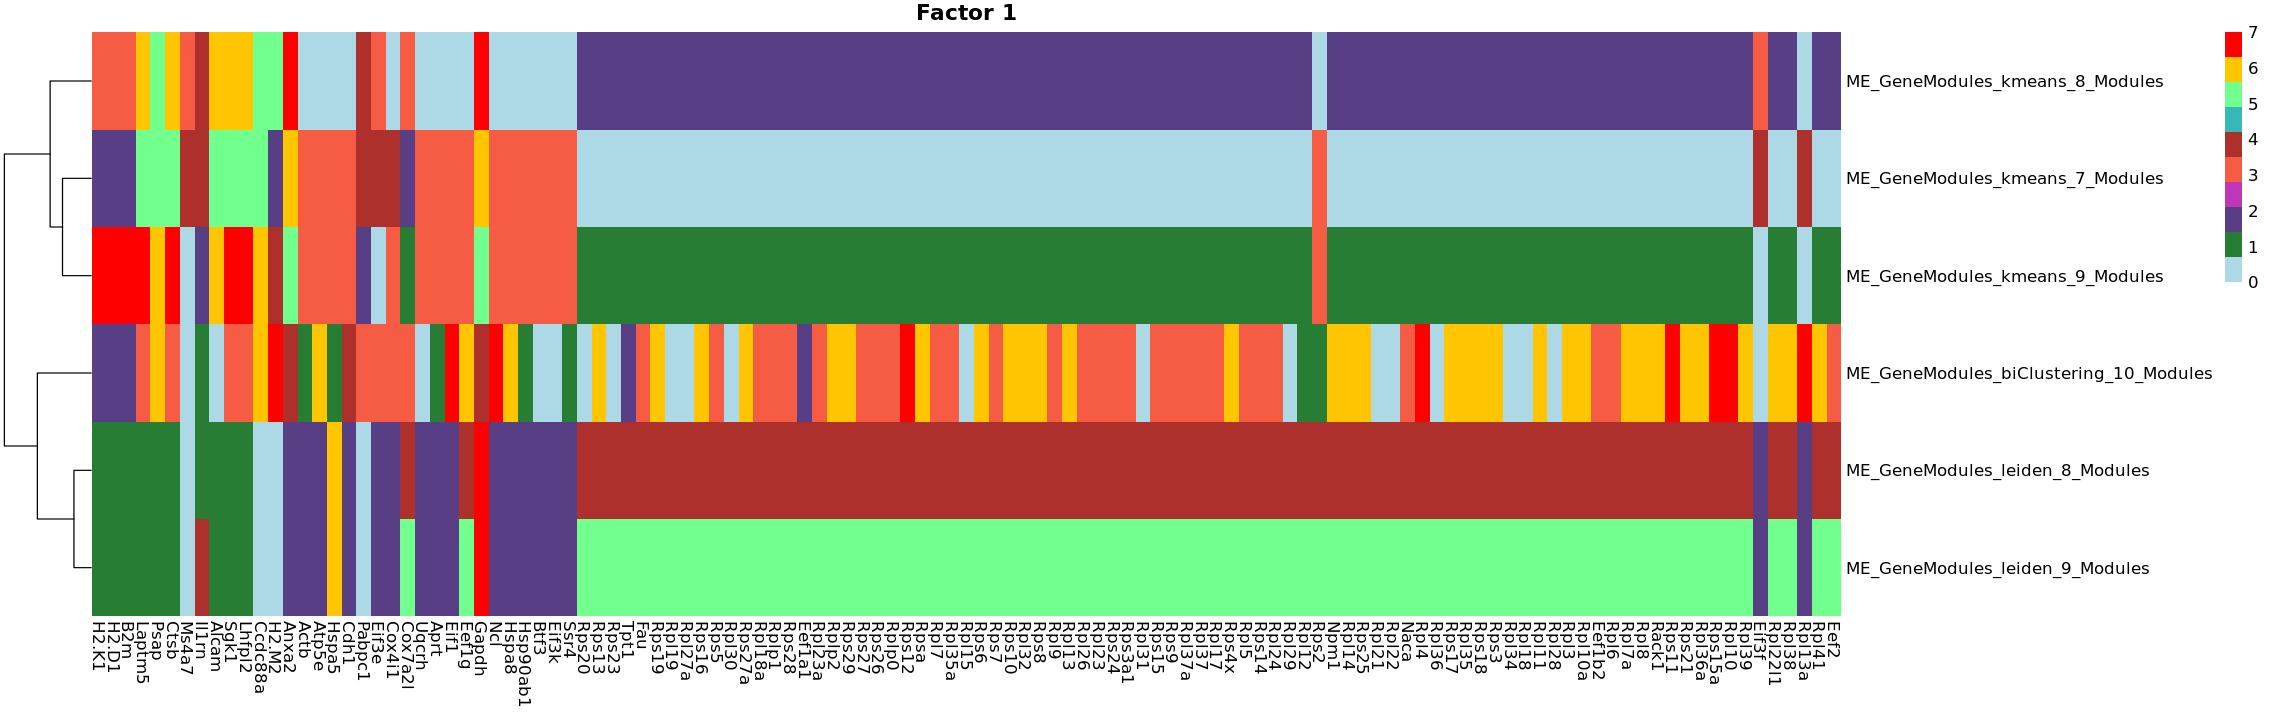

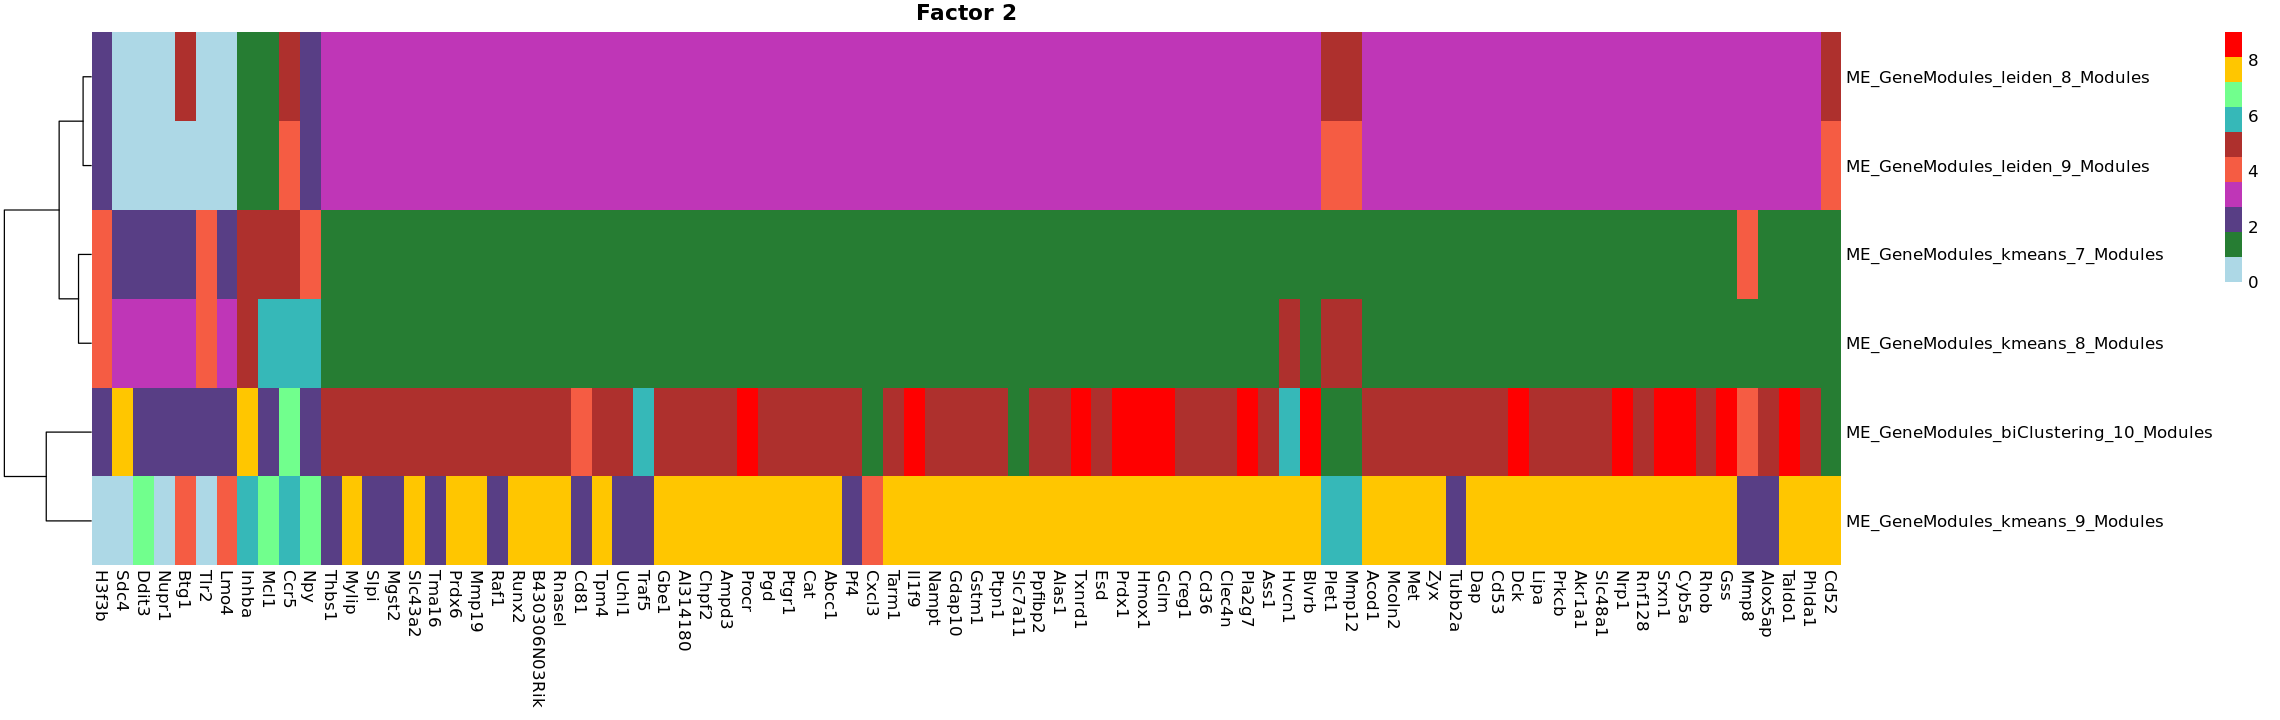

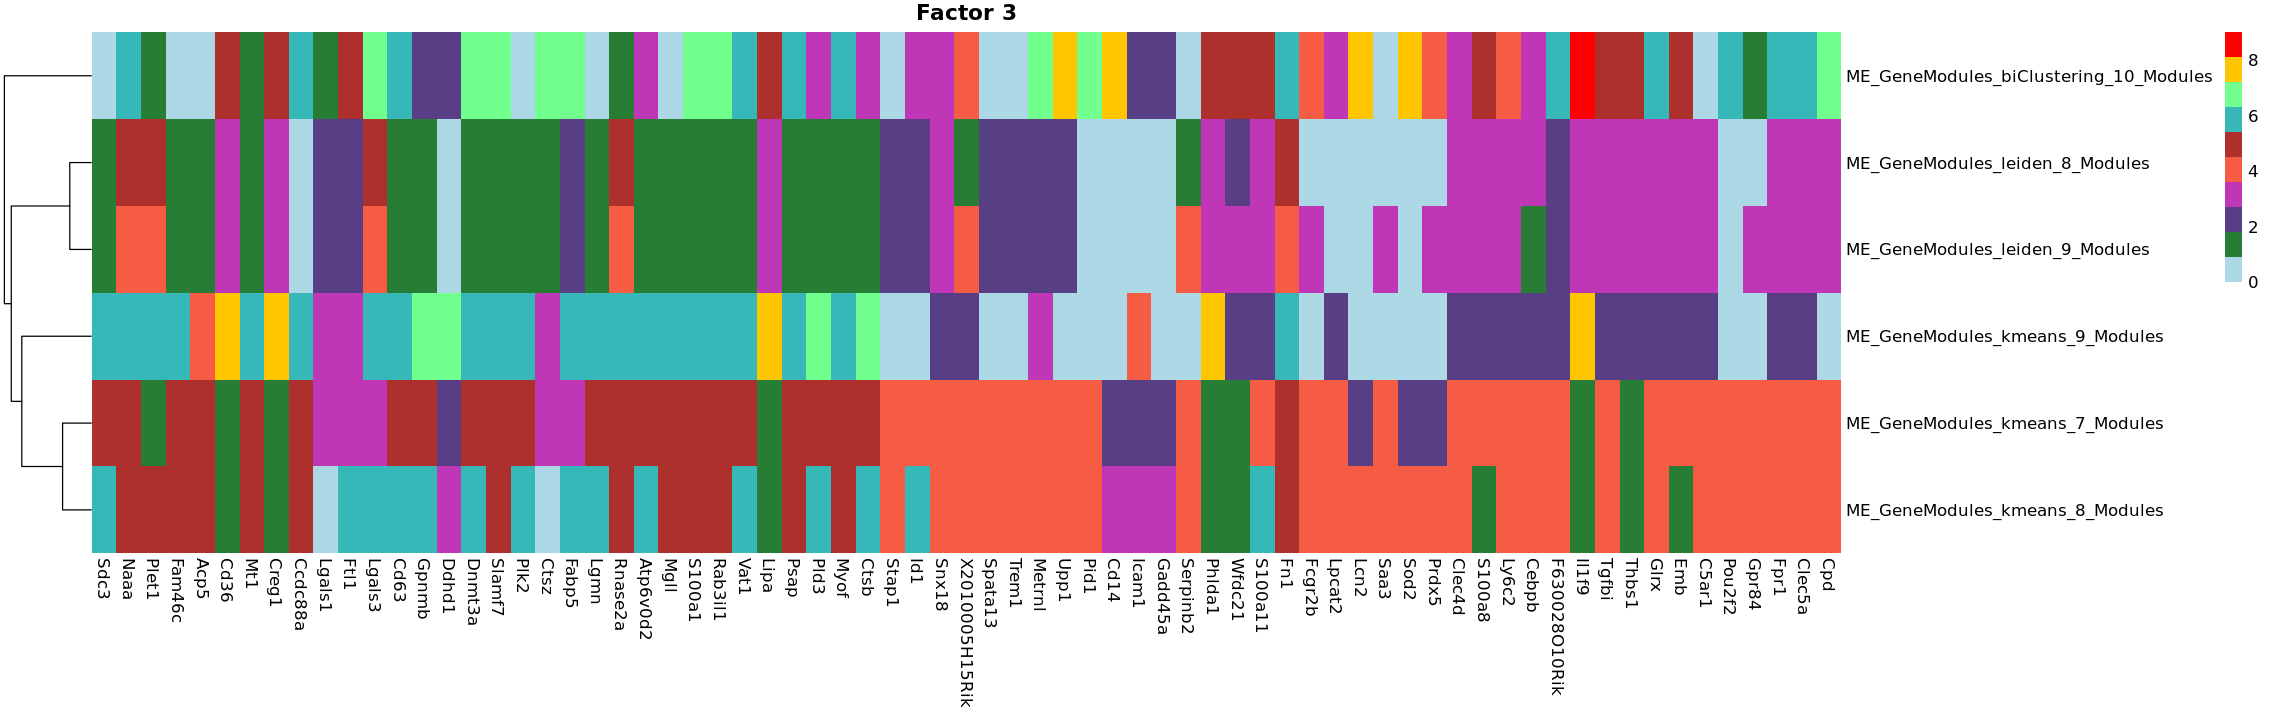

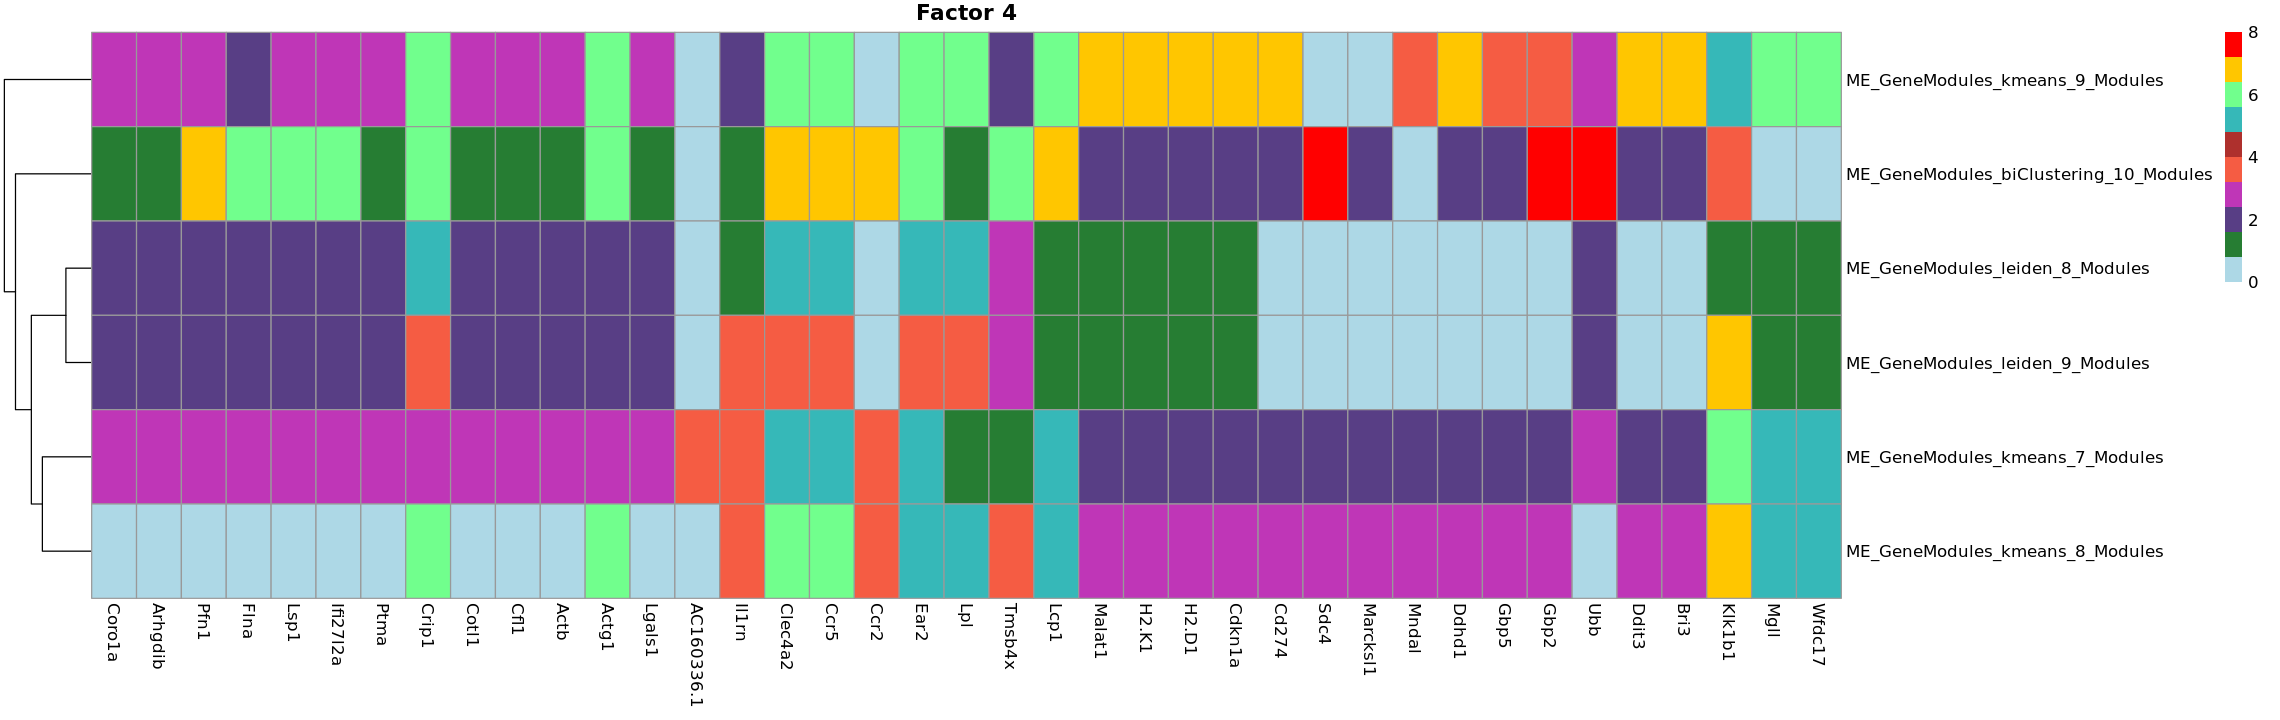

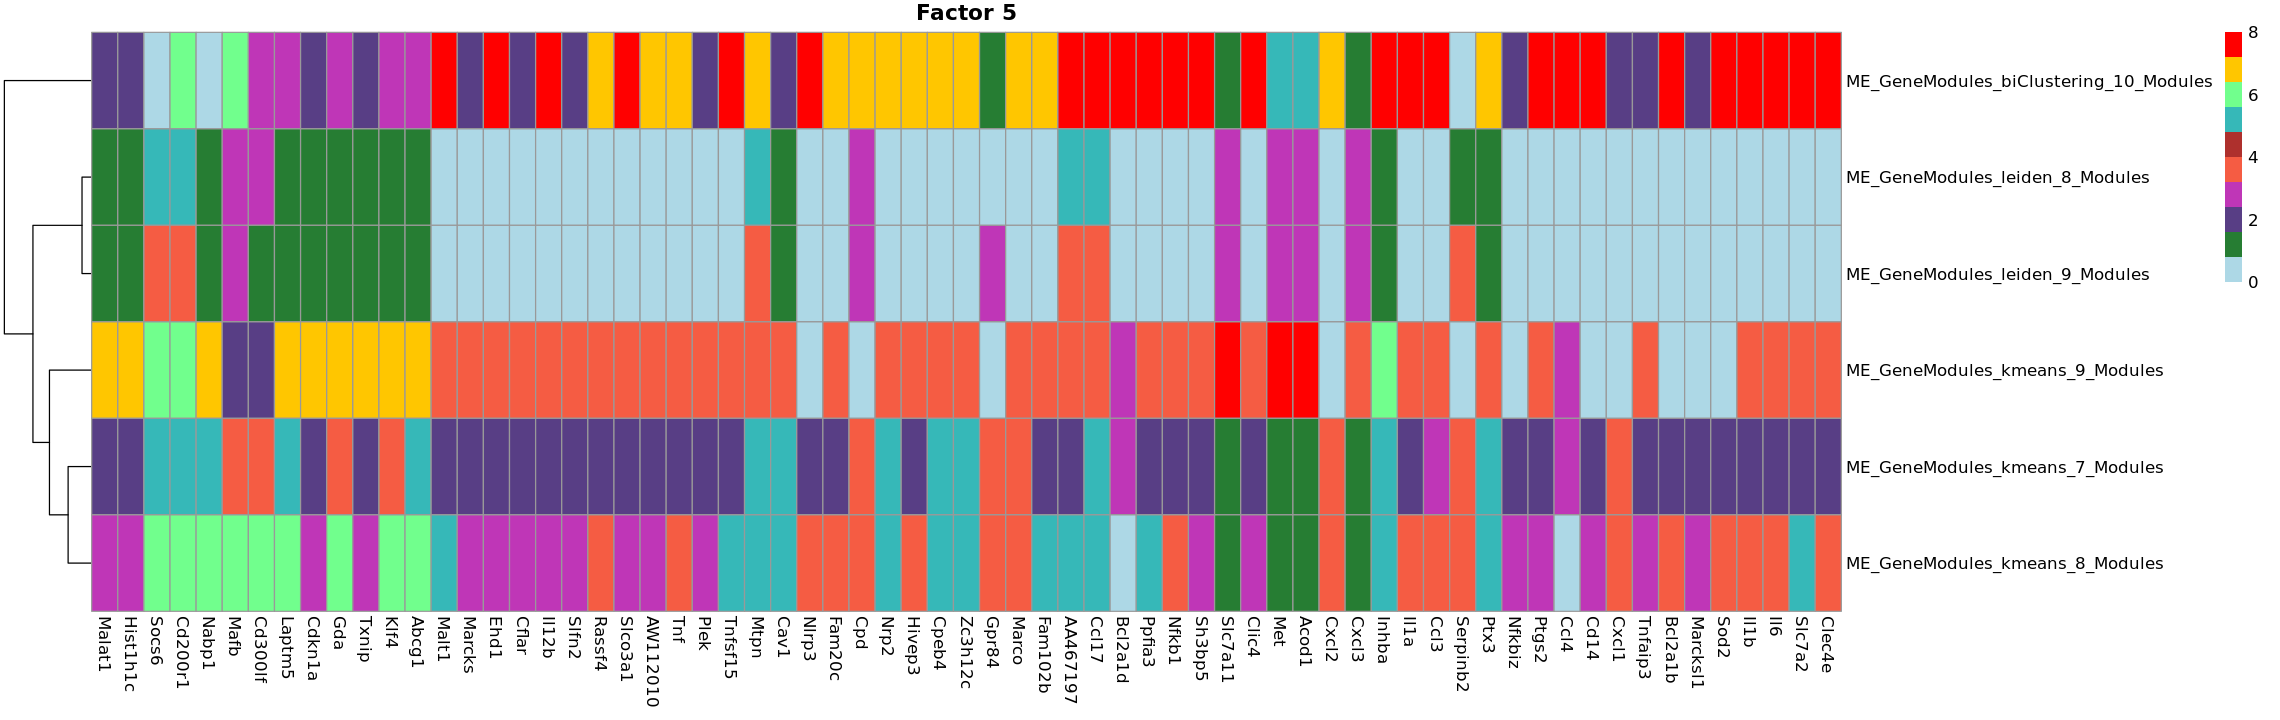

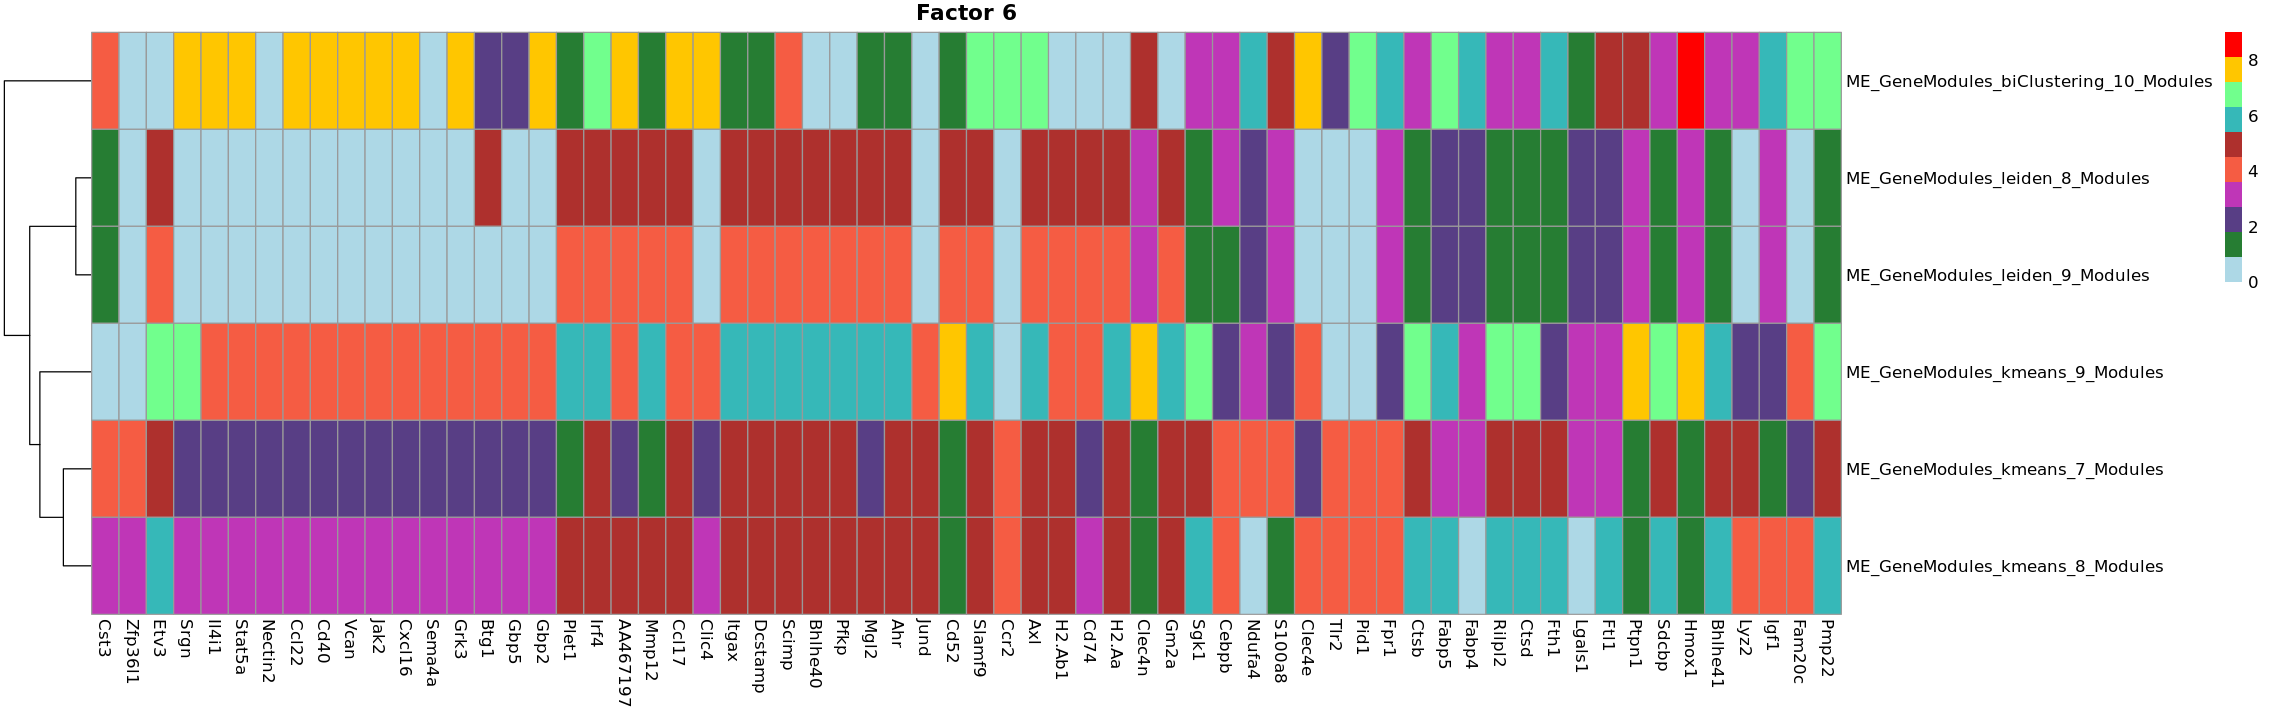

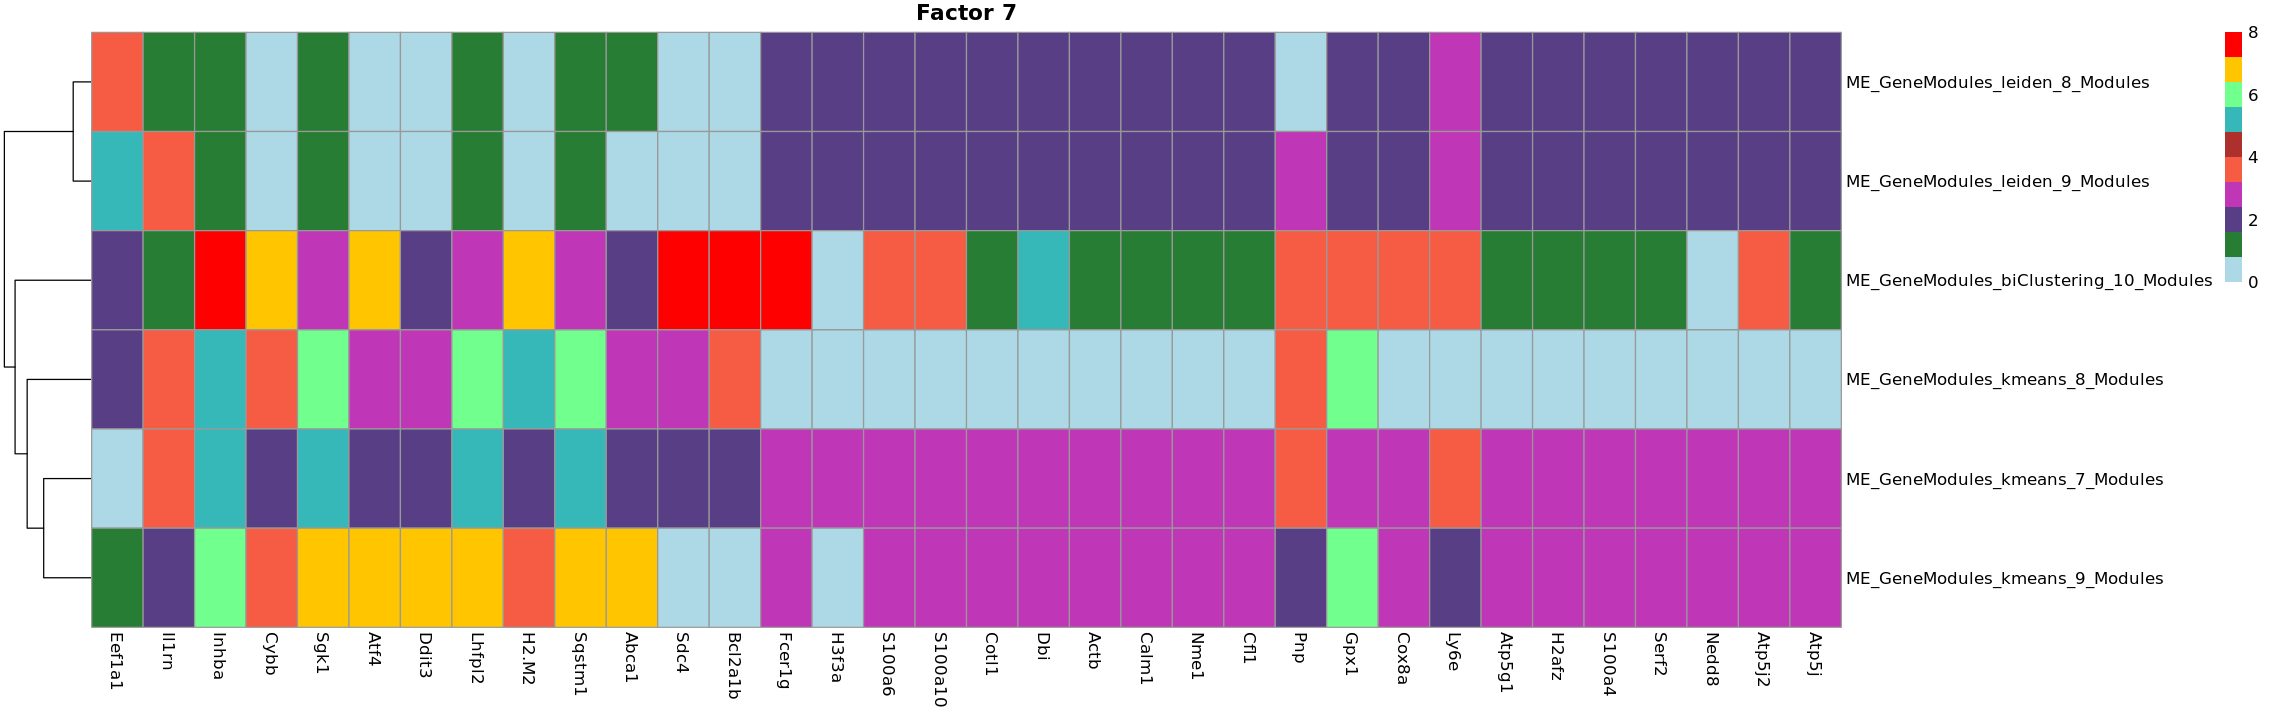

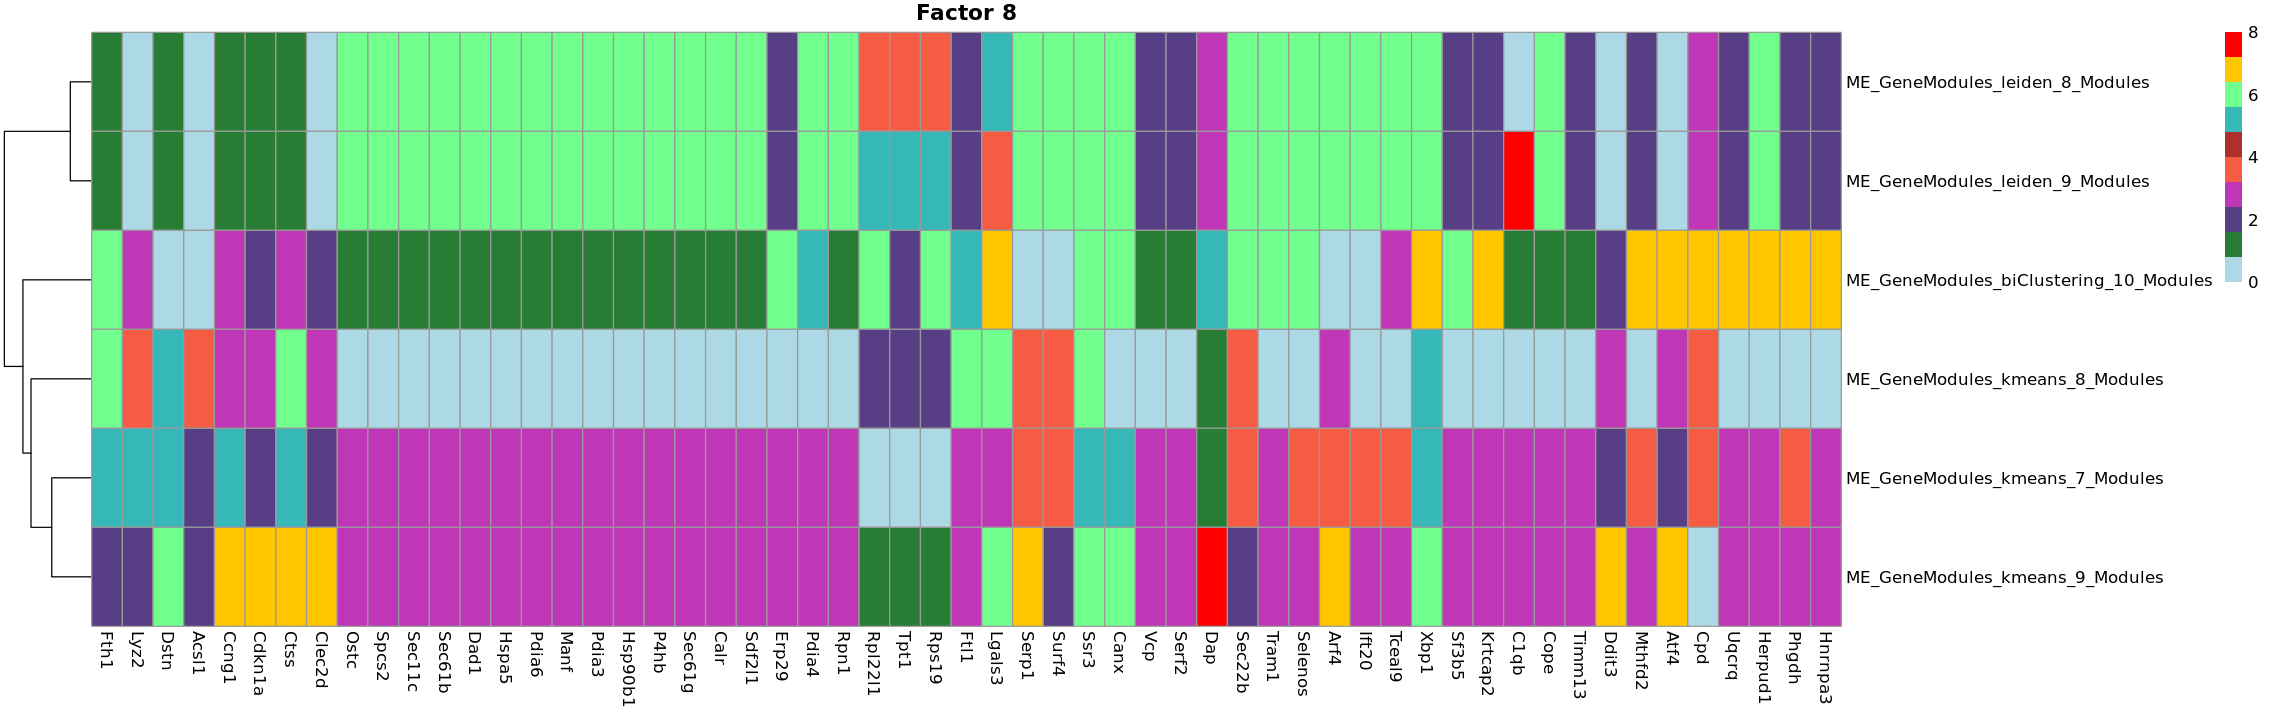

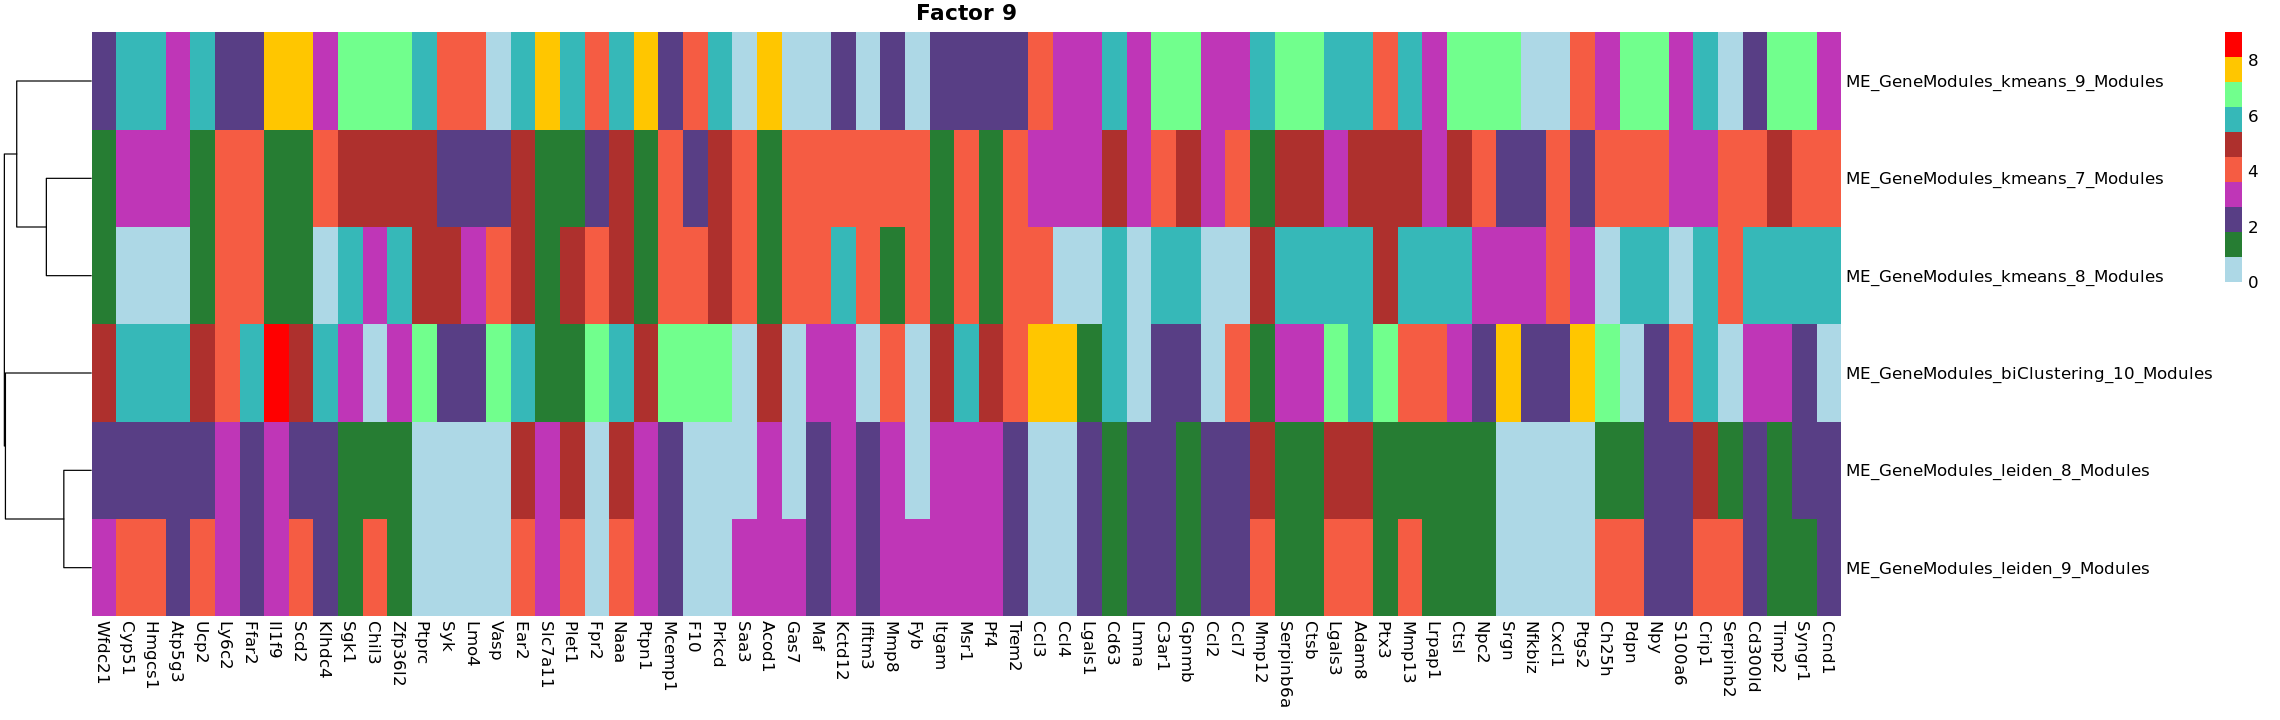

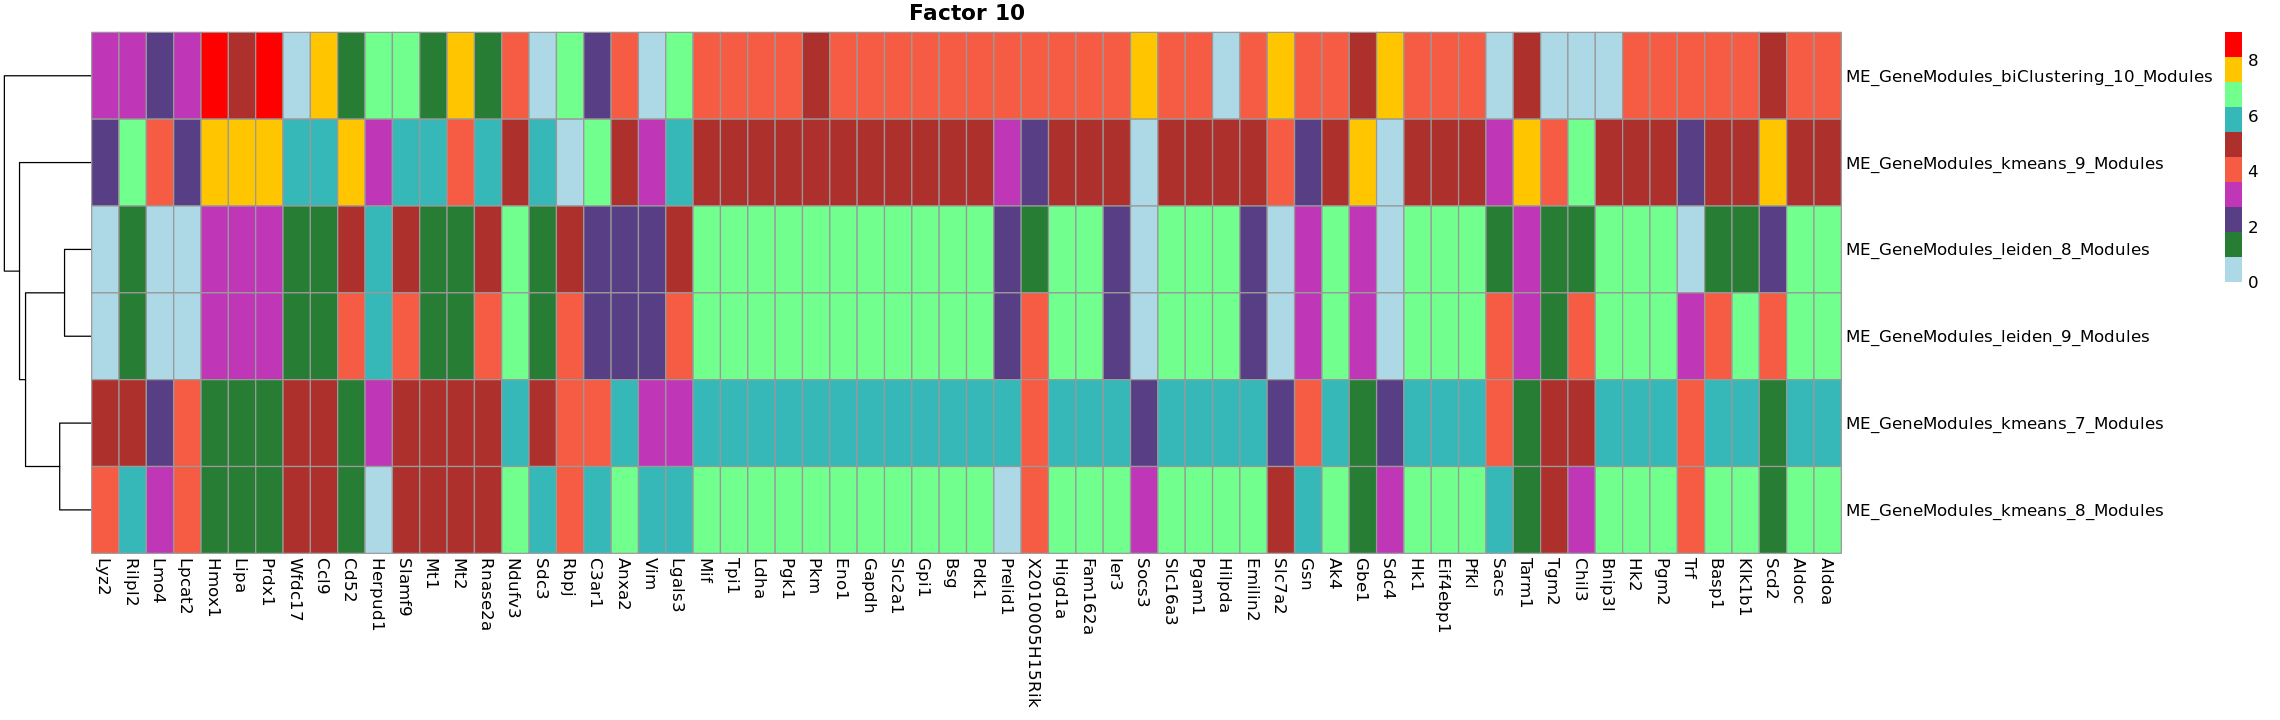

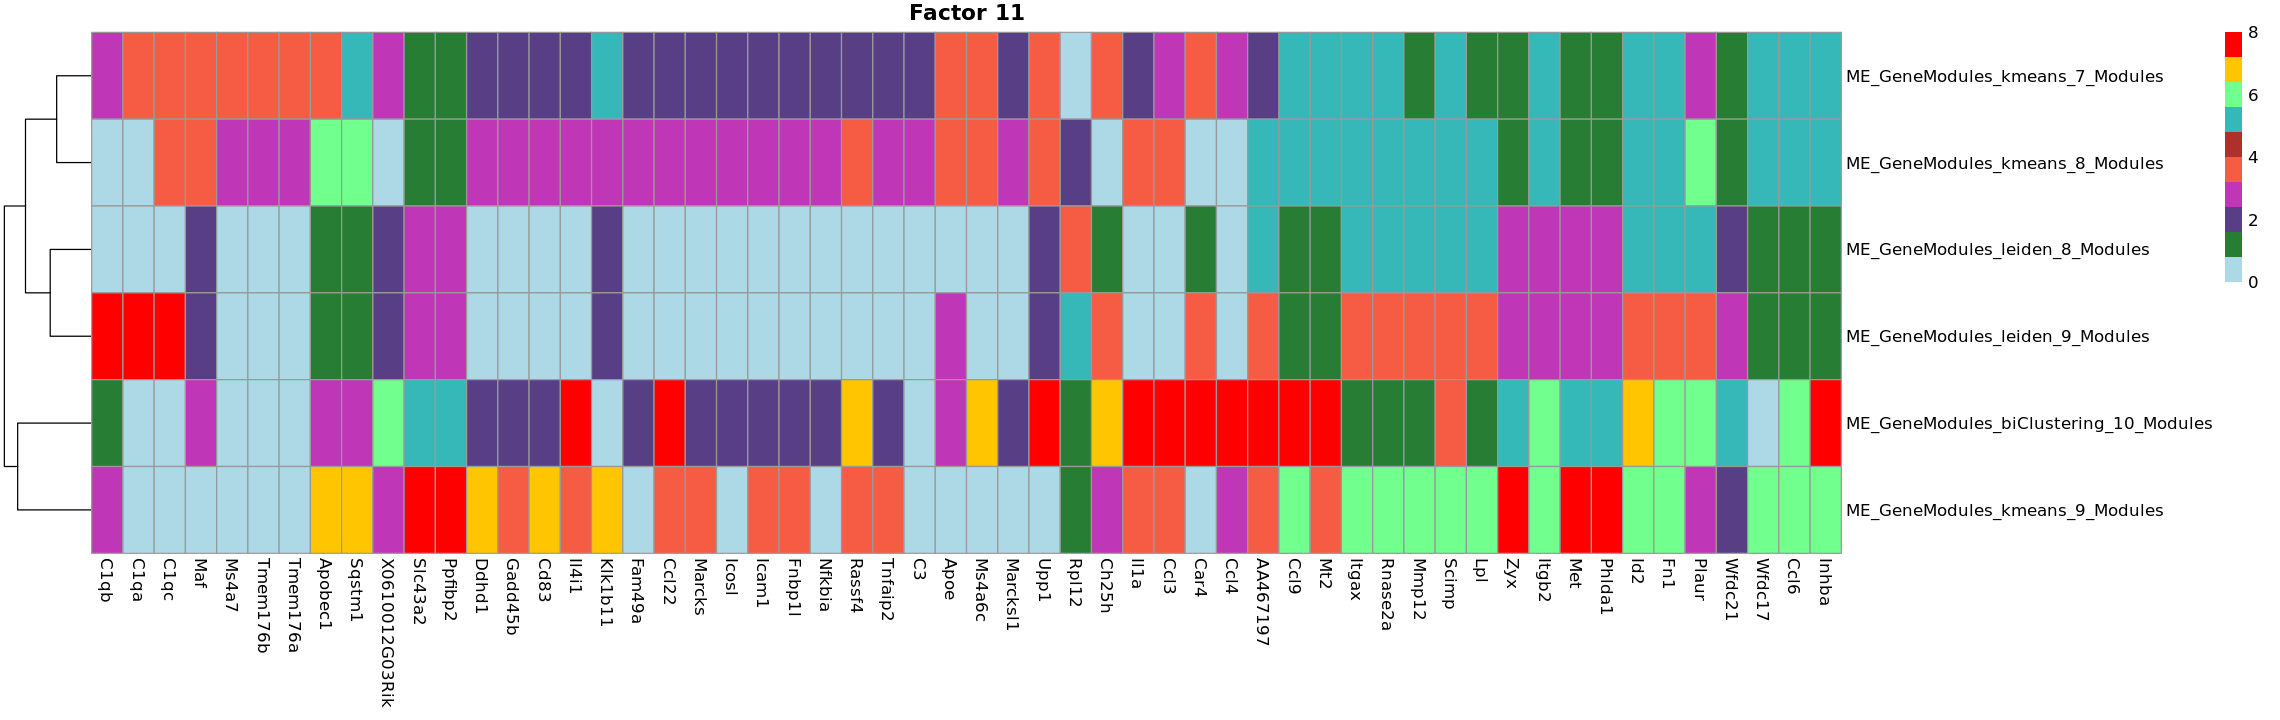

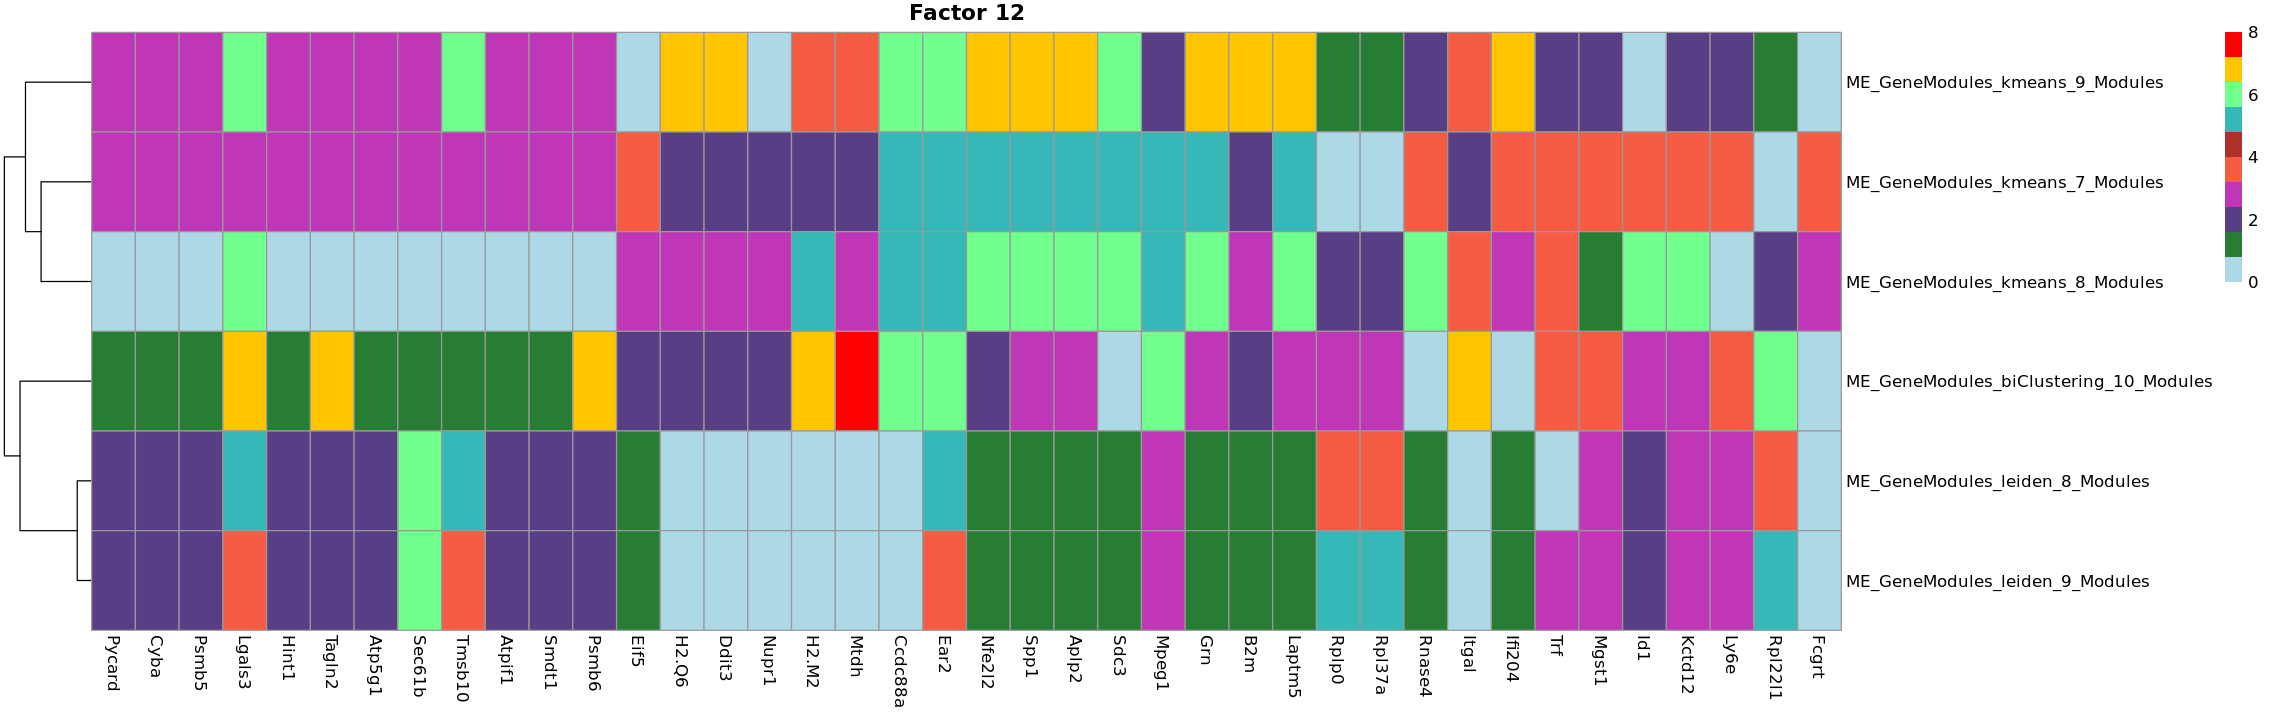

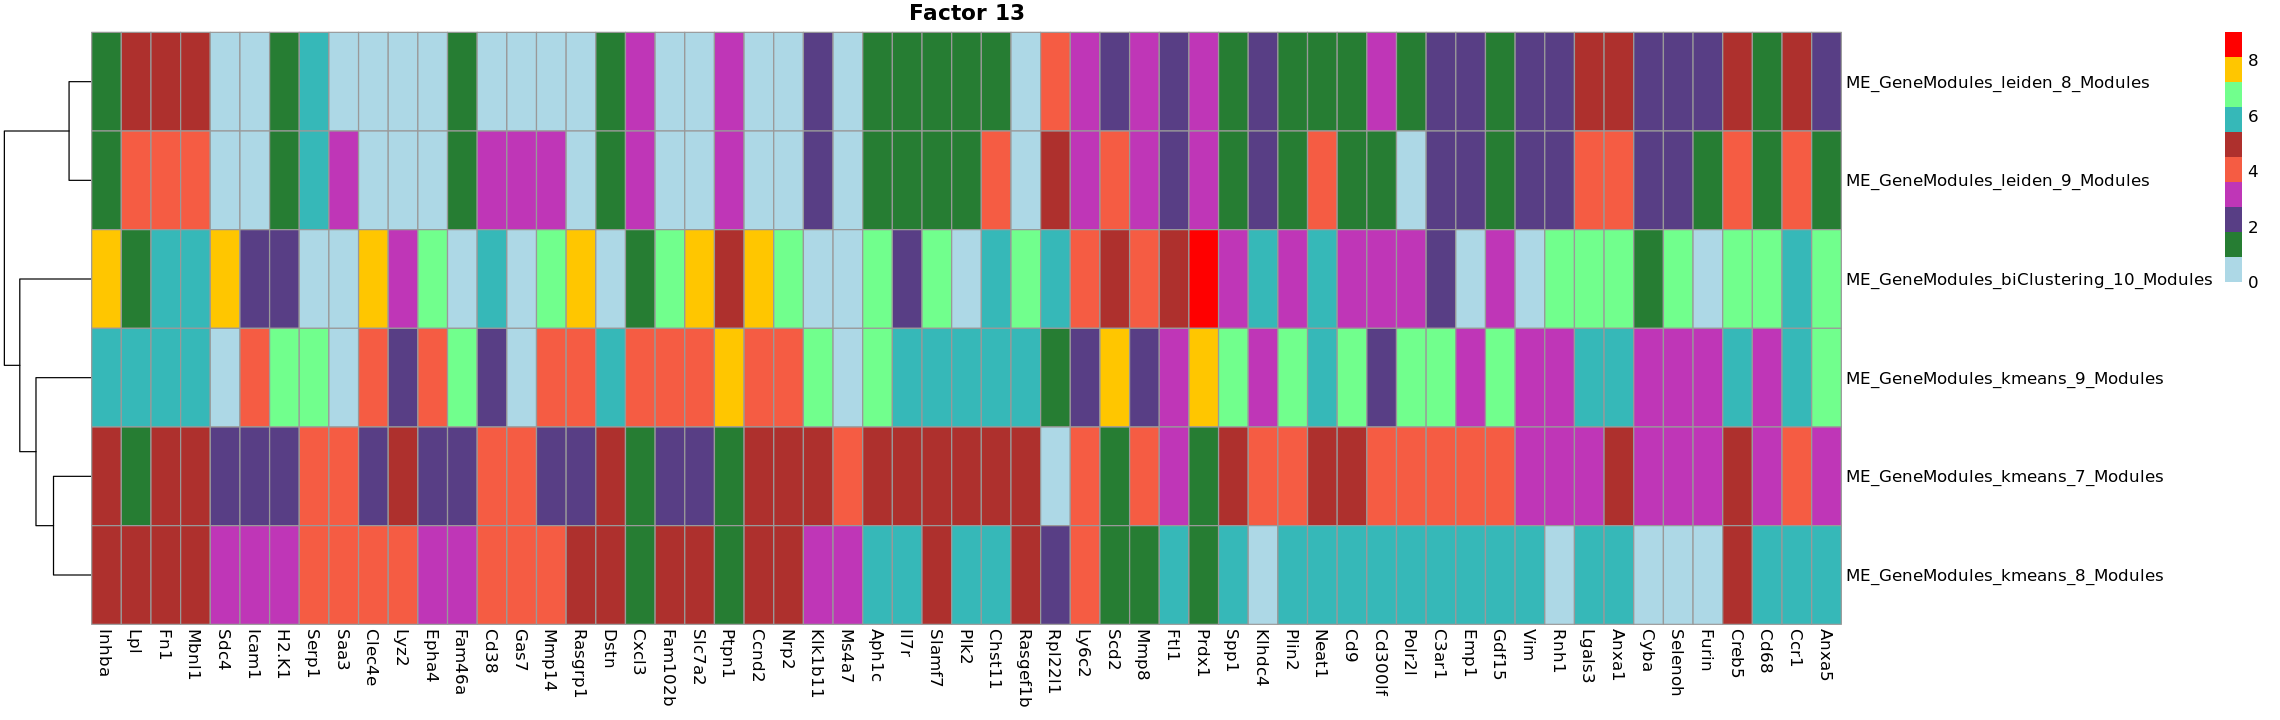

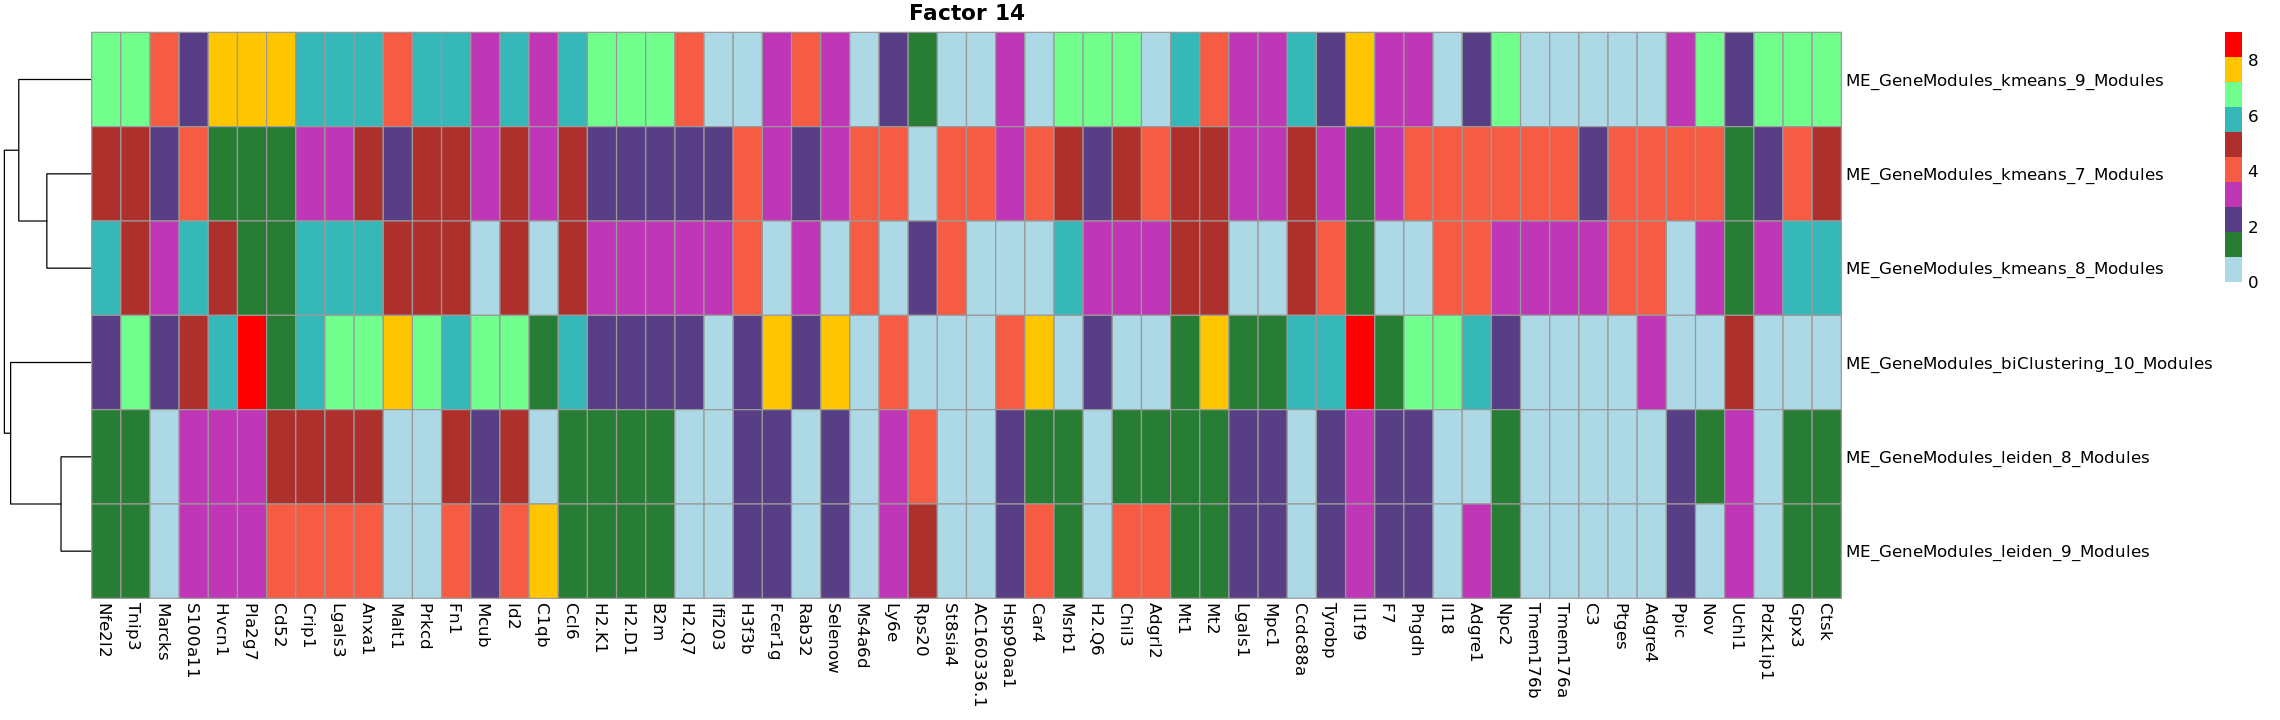

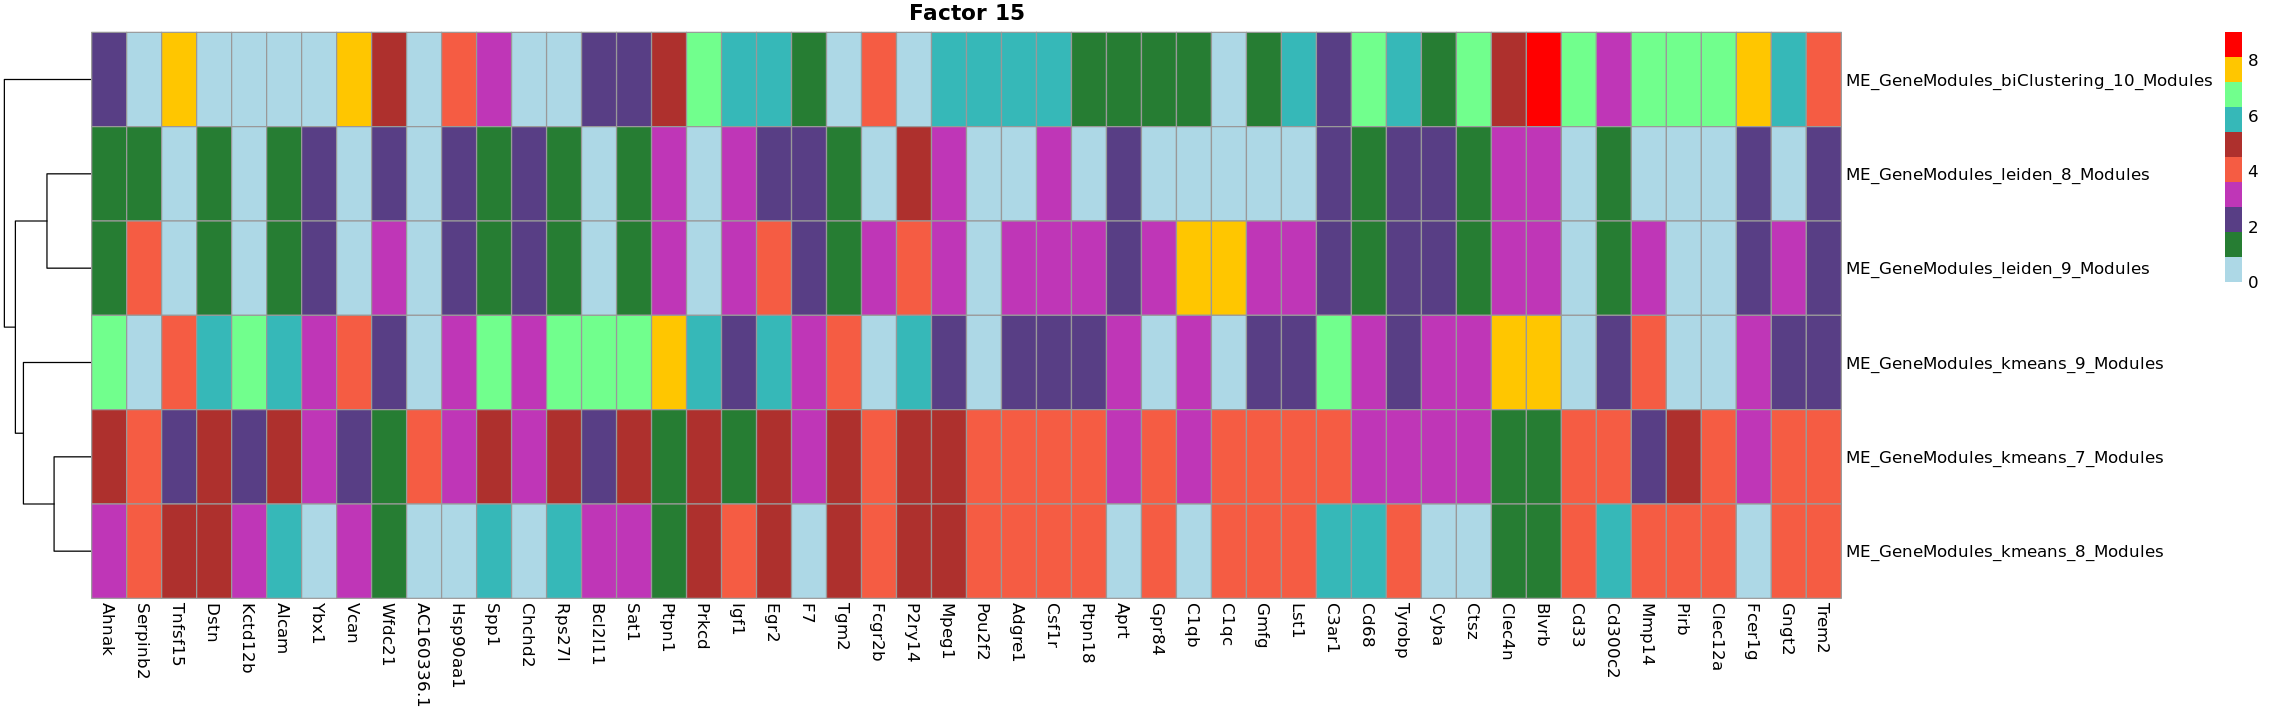

In [49]:
for(i in 1:15){
  geneClusterings = data.frame(matrix(0, nrow = length(factorGeneGroups[[i]][[1]]),
                                       ncol=length(geneModuleClusterings)), stringsAsFactors=FALSE)

   rownames(geneClusterings) = factorGeneGroups[[i]][[1]]
   colnames(geneClusterings) = geneModuleClusterings

   for(elem in geneModuleClusterings){
       geneModulesN <- data.frame(read.csv(paste0("/home/beraslan/jovian-work/analysisSingle/Clustering_Trials/",elem,".csv")), row.names = 1)
       rownames(geneModulesN) <- geneModulesN$GeneName
       geneClusterings[factorGeneGroups[[i]][[1]],elem] <- geneModulesN[factorGeneGroups[[i]][[1]], "GeneGroup"]
   }

   options(repr.plot.width=19, repr.plot.height=6)

   pheatmap(t(geneClusterings), show_colnames = TRUE, show_rownames = TRUE, cluster_cols=FALSE,
            main = paste0("Factor ", i),
           color = colorRampPalette(c("lightblue", "darkgreen","purple","tomato1","brown","cyan","yellow", "red"))(10))
}
 

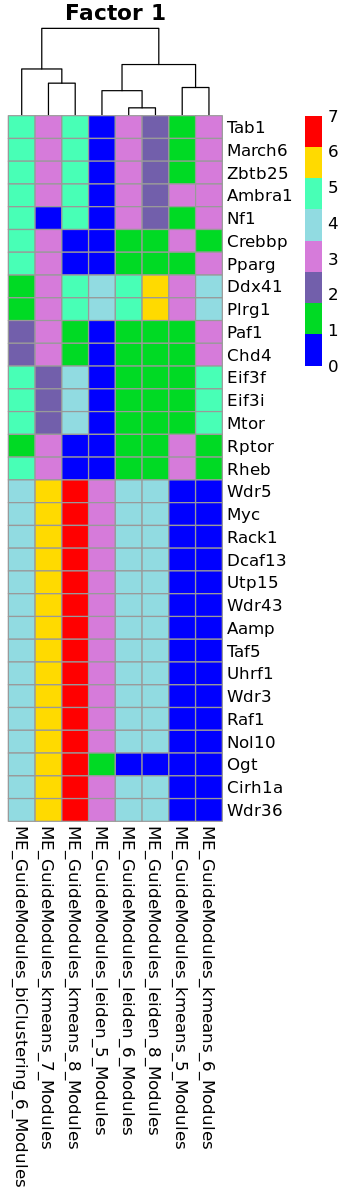

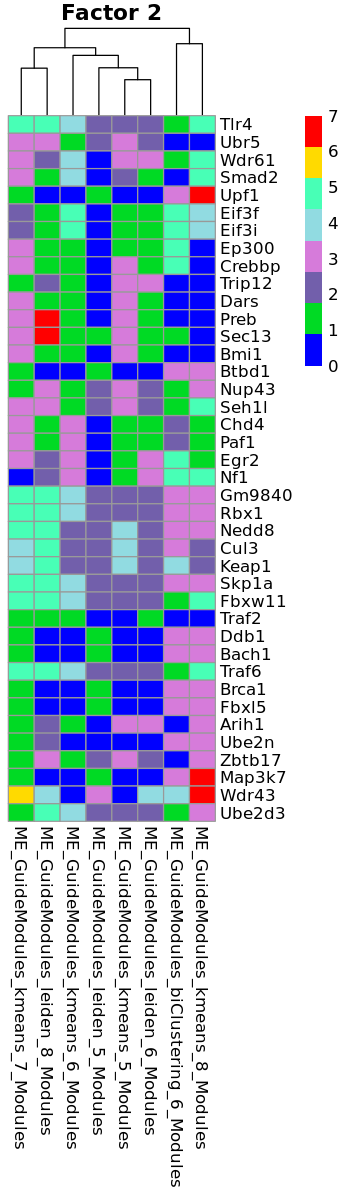

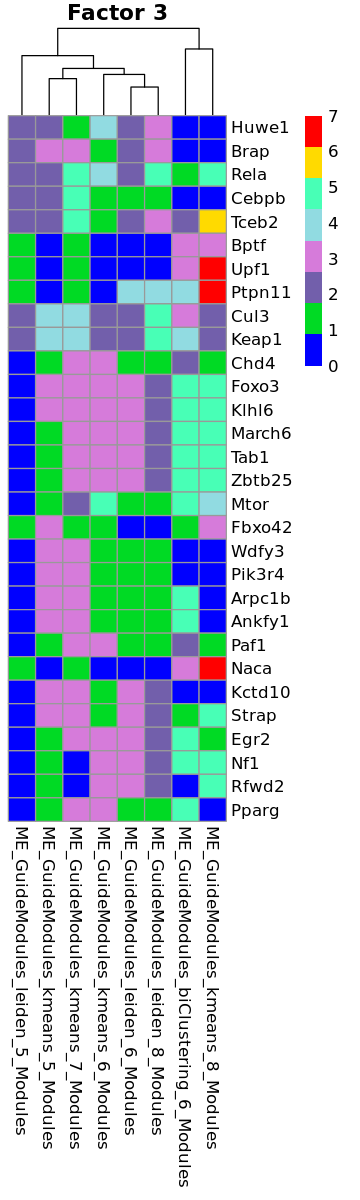

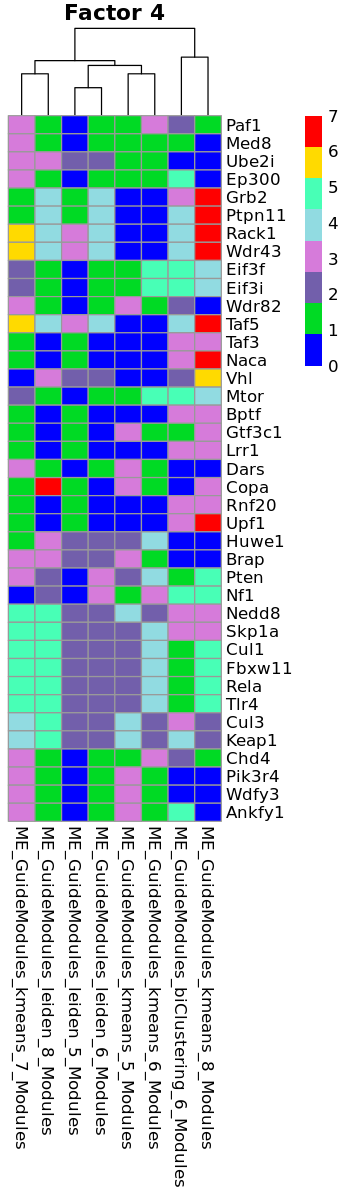

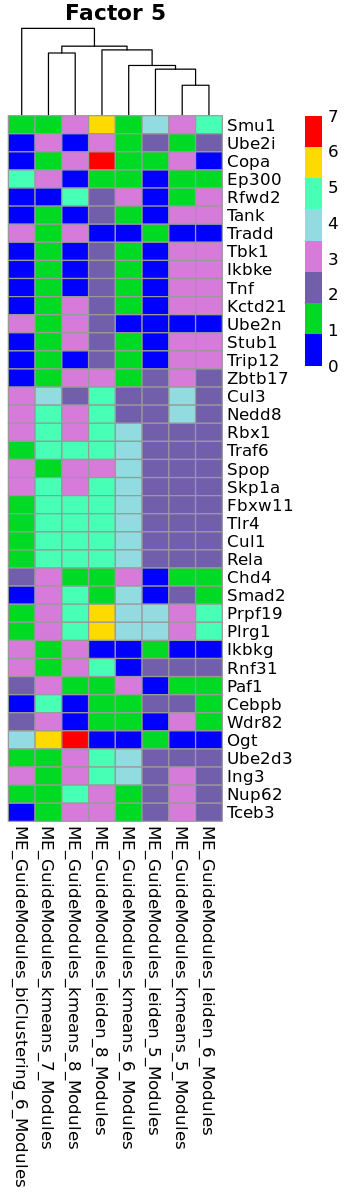

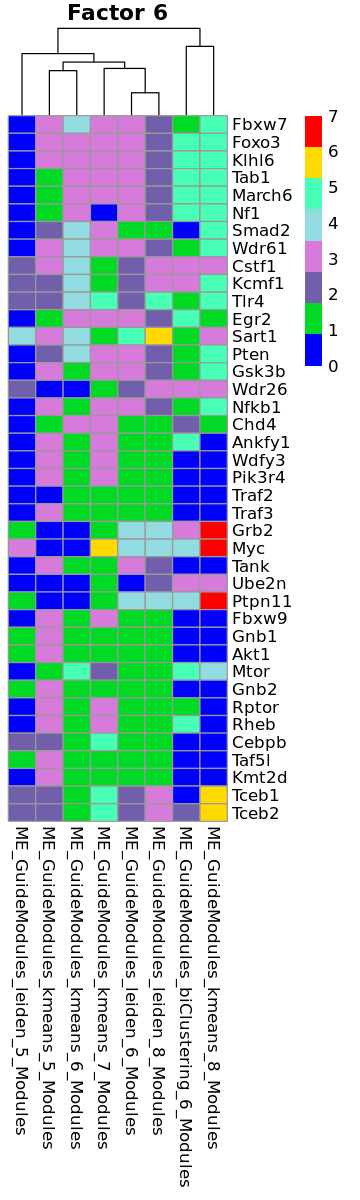

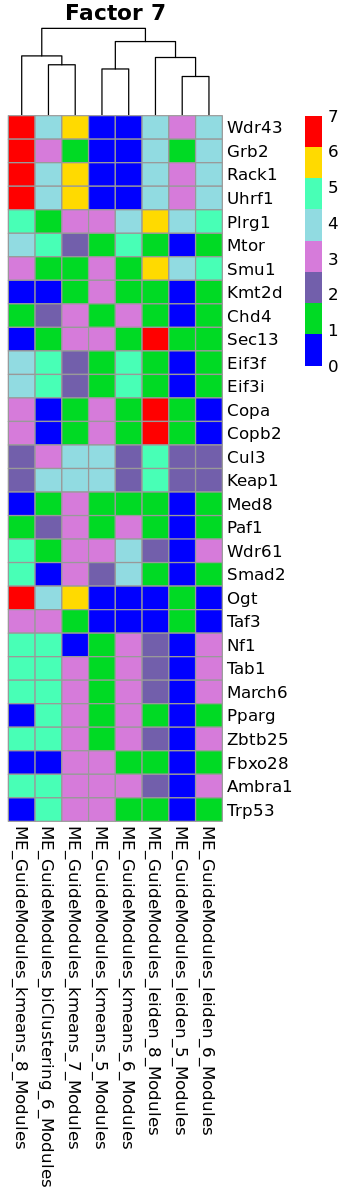

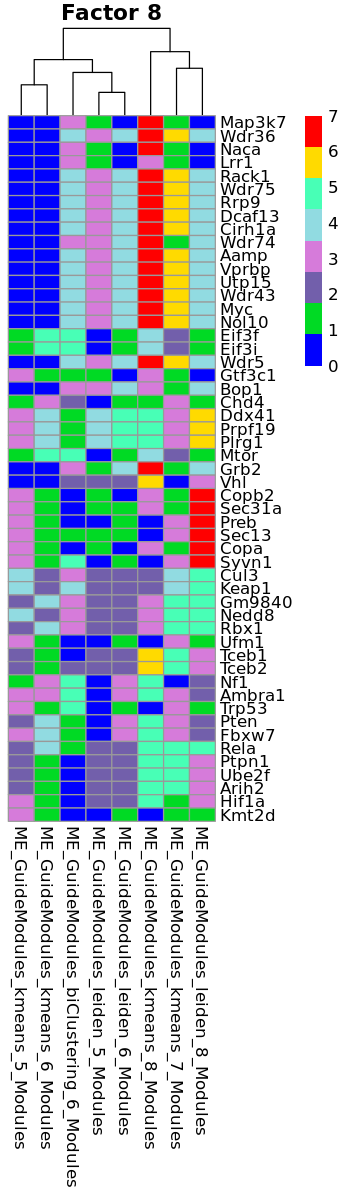

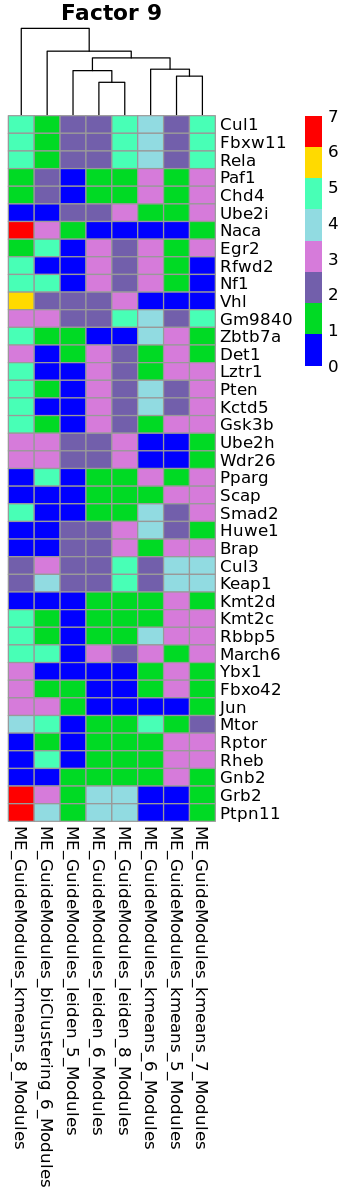

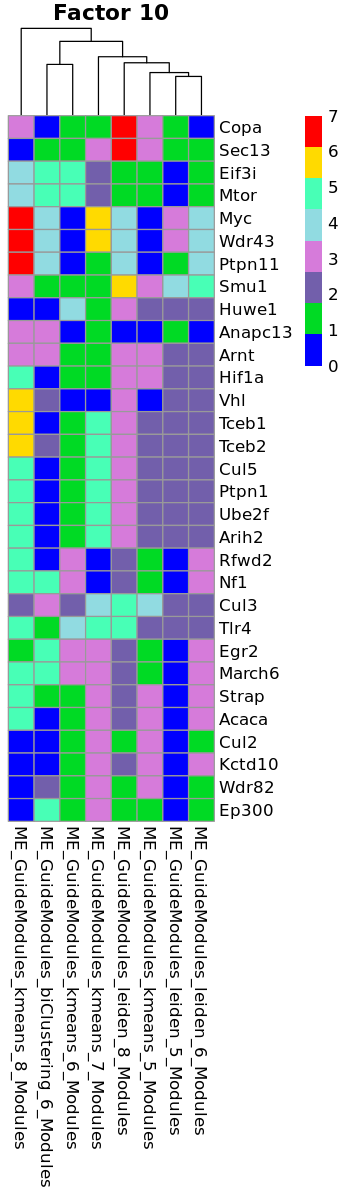

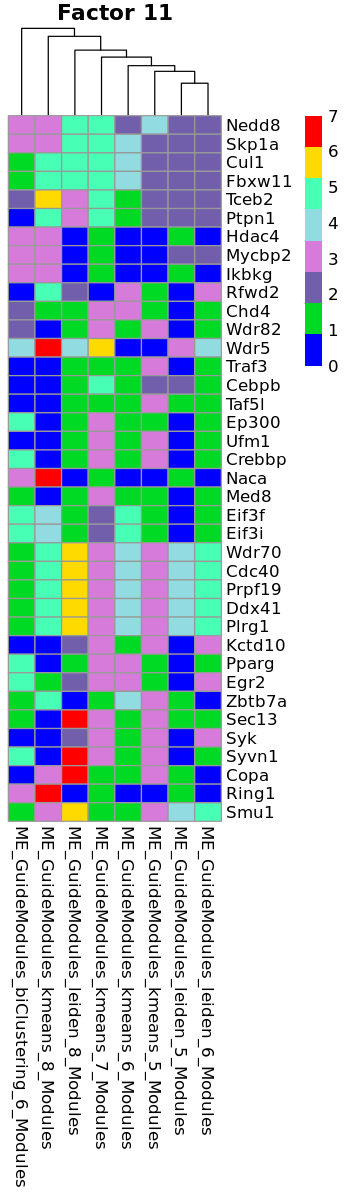

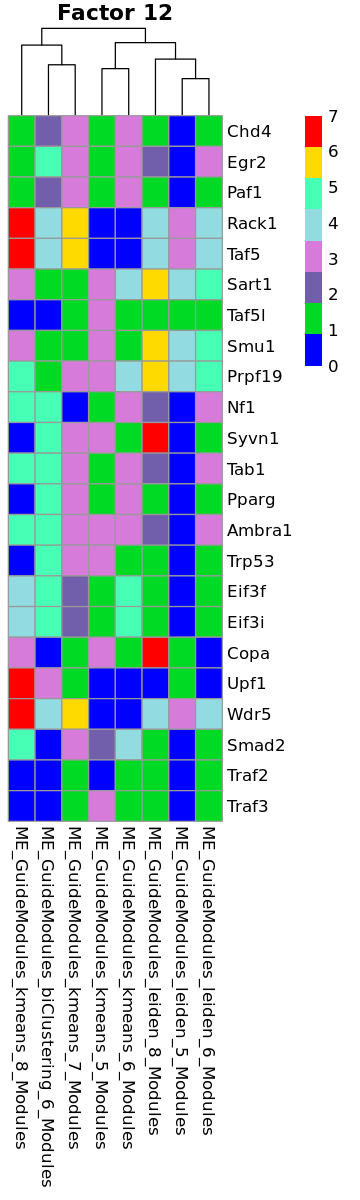

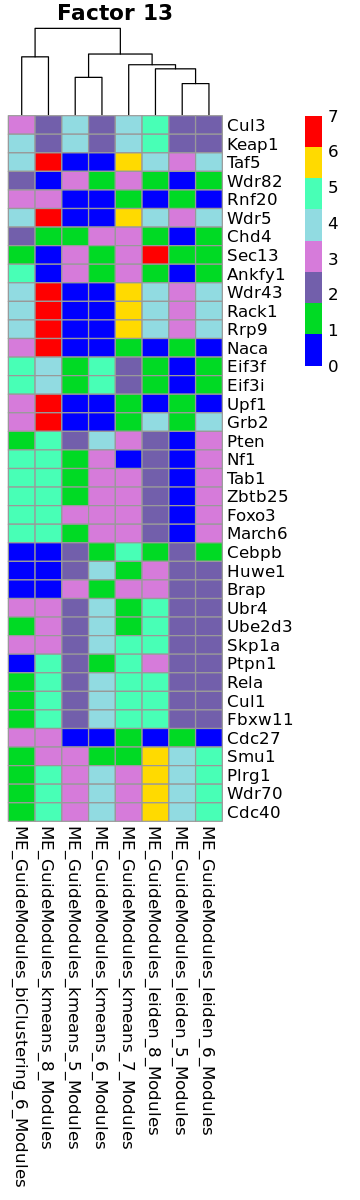

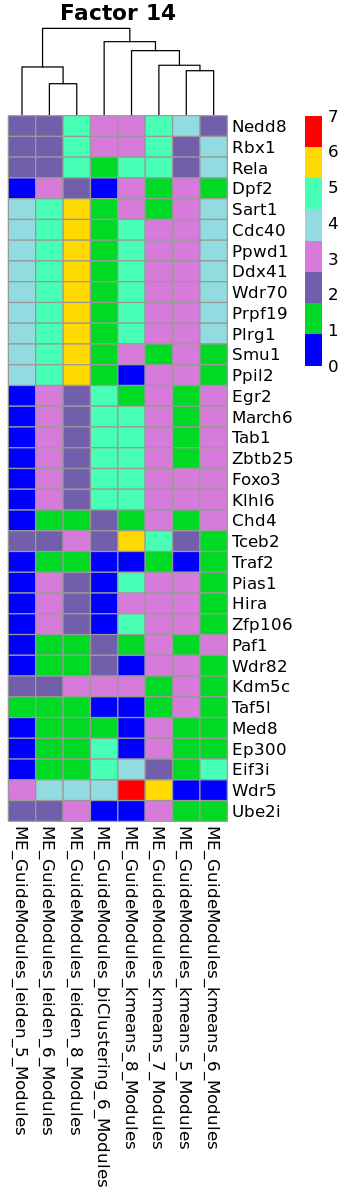

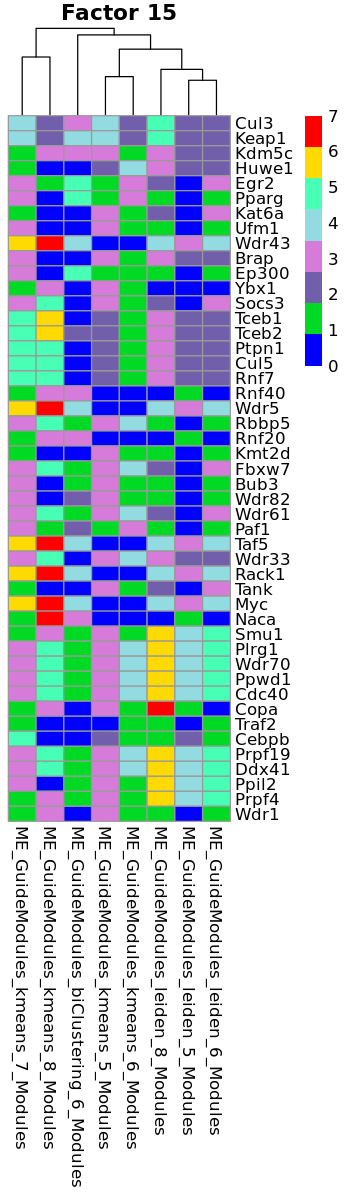

In [38]:
for(i in 1:15){
  guideClusterings = data.frame(matrix(0, nrow = length(factorGeneGroups[[i]][[2]]),
                                       ncol=length(guideModuleClusterings)), stringsAsFactors=FALSE)

   rownames(guideClusterings) = factorGeneGroups[[i]][[2]]
   colnames(guideClusterings) = guideModuleClusterings

   for(elem in guideModuleClusterings){
       guideModulesN <- data.frame(read.csv(paste0("/home/beraslan/jovian-work/analysisSingle/Clustering_Trials/",elem,".csv")), row.names = 1)
       rownames(guideModulesN) <- guideModulesN$GuideName
       guideClusterings[factorGeneGroups[[i]][[2]],elem] <- guideModulesN[factorGeneGroups[[i]][[2]], "GuideGroup"]
   }

   options(repr.plot.width=3, repr.plot.height=10)

   pheatmap((guideClusterings), show_colnames = TRUE, show_rownames = TRUE, cluster_rows=FALSE, main = paste0("Factor ", i), 
            color = colorRampPalette(c("blue", "green","purple","pink","cyan","yellow", "red"))(8))
}

[1] "ME_GeneModules_biClustering_10_Modules"


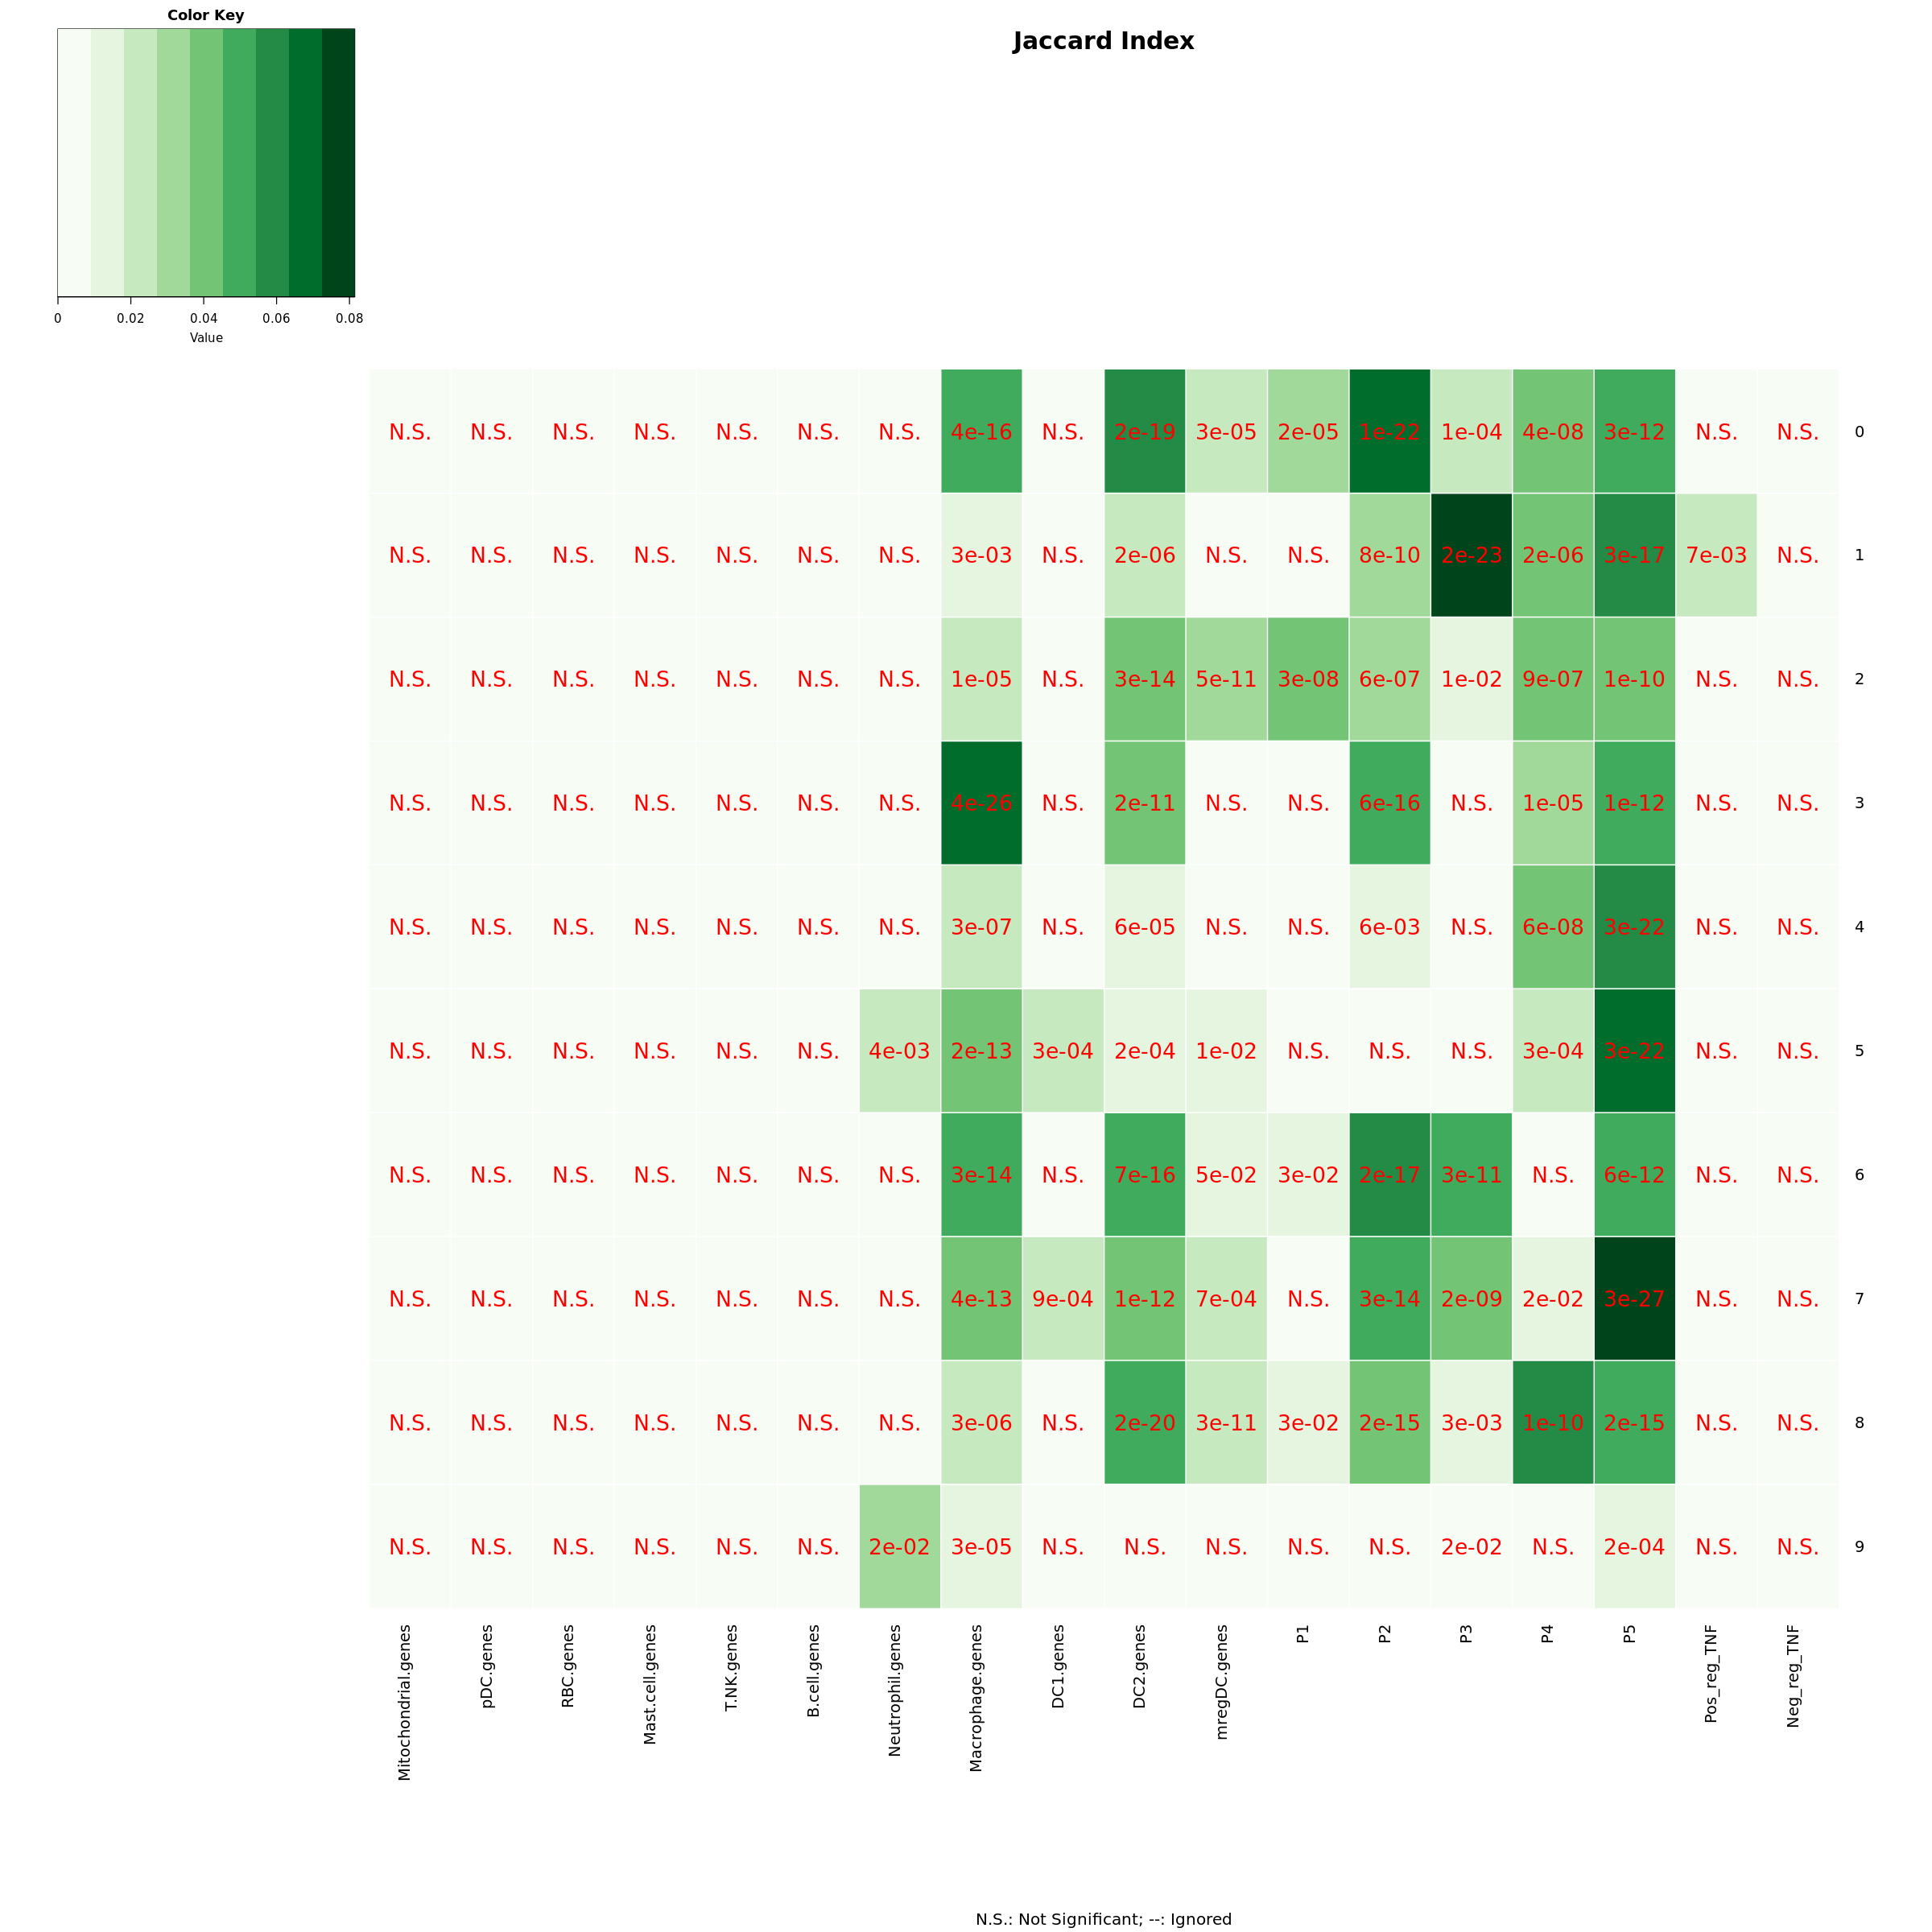

[1] "ME_GeneModules_kmeans_7_Modules"


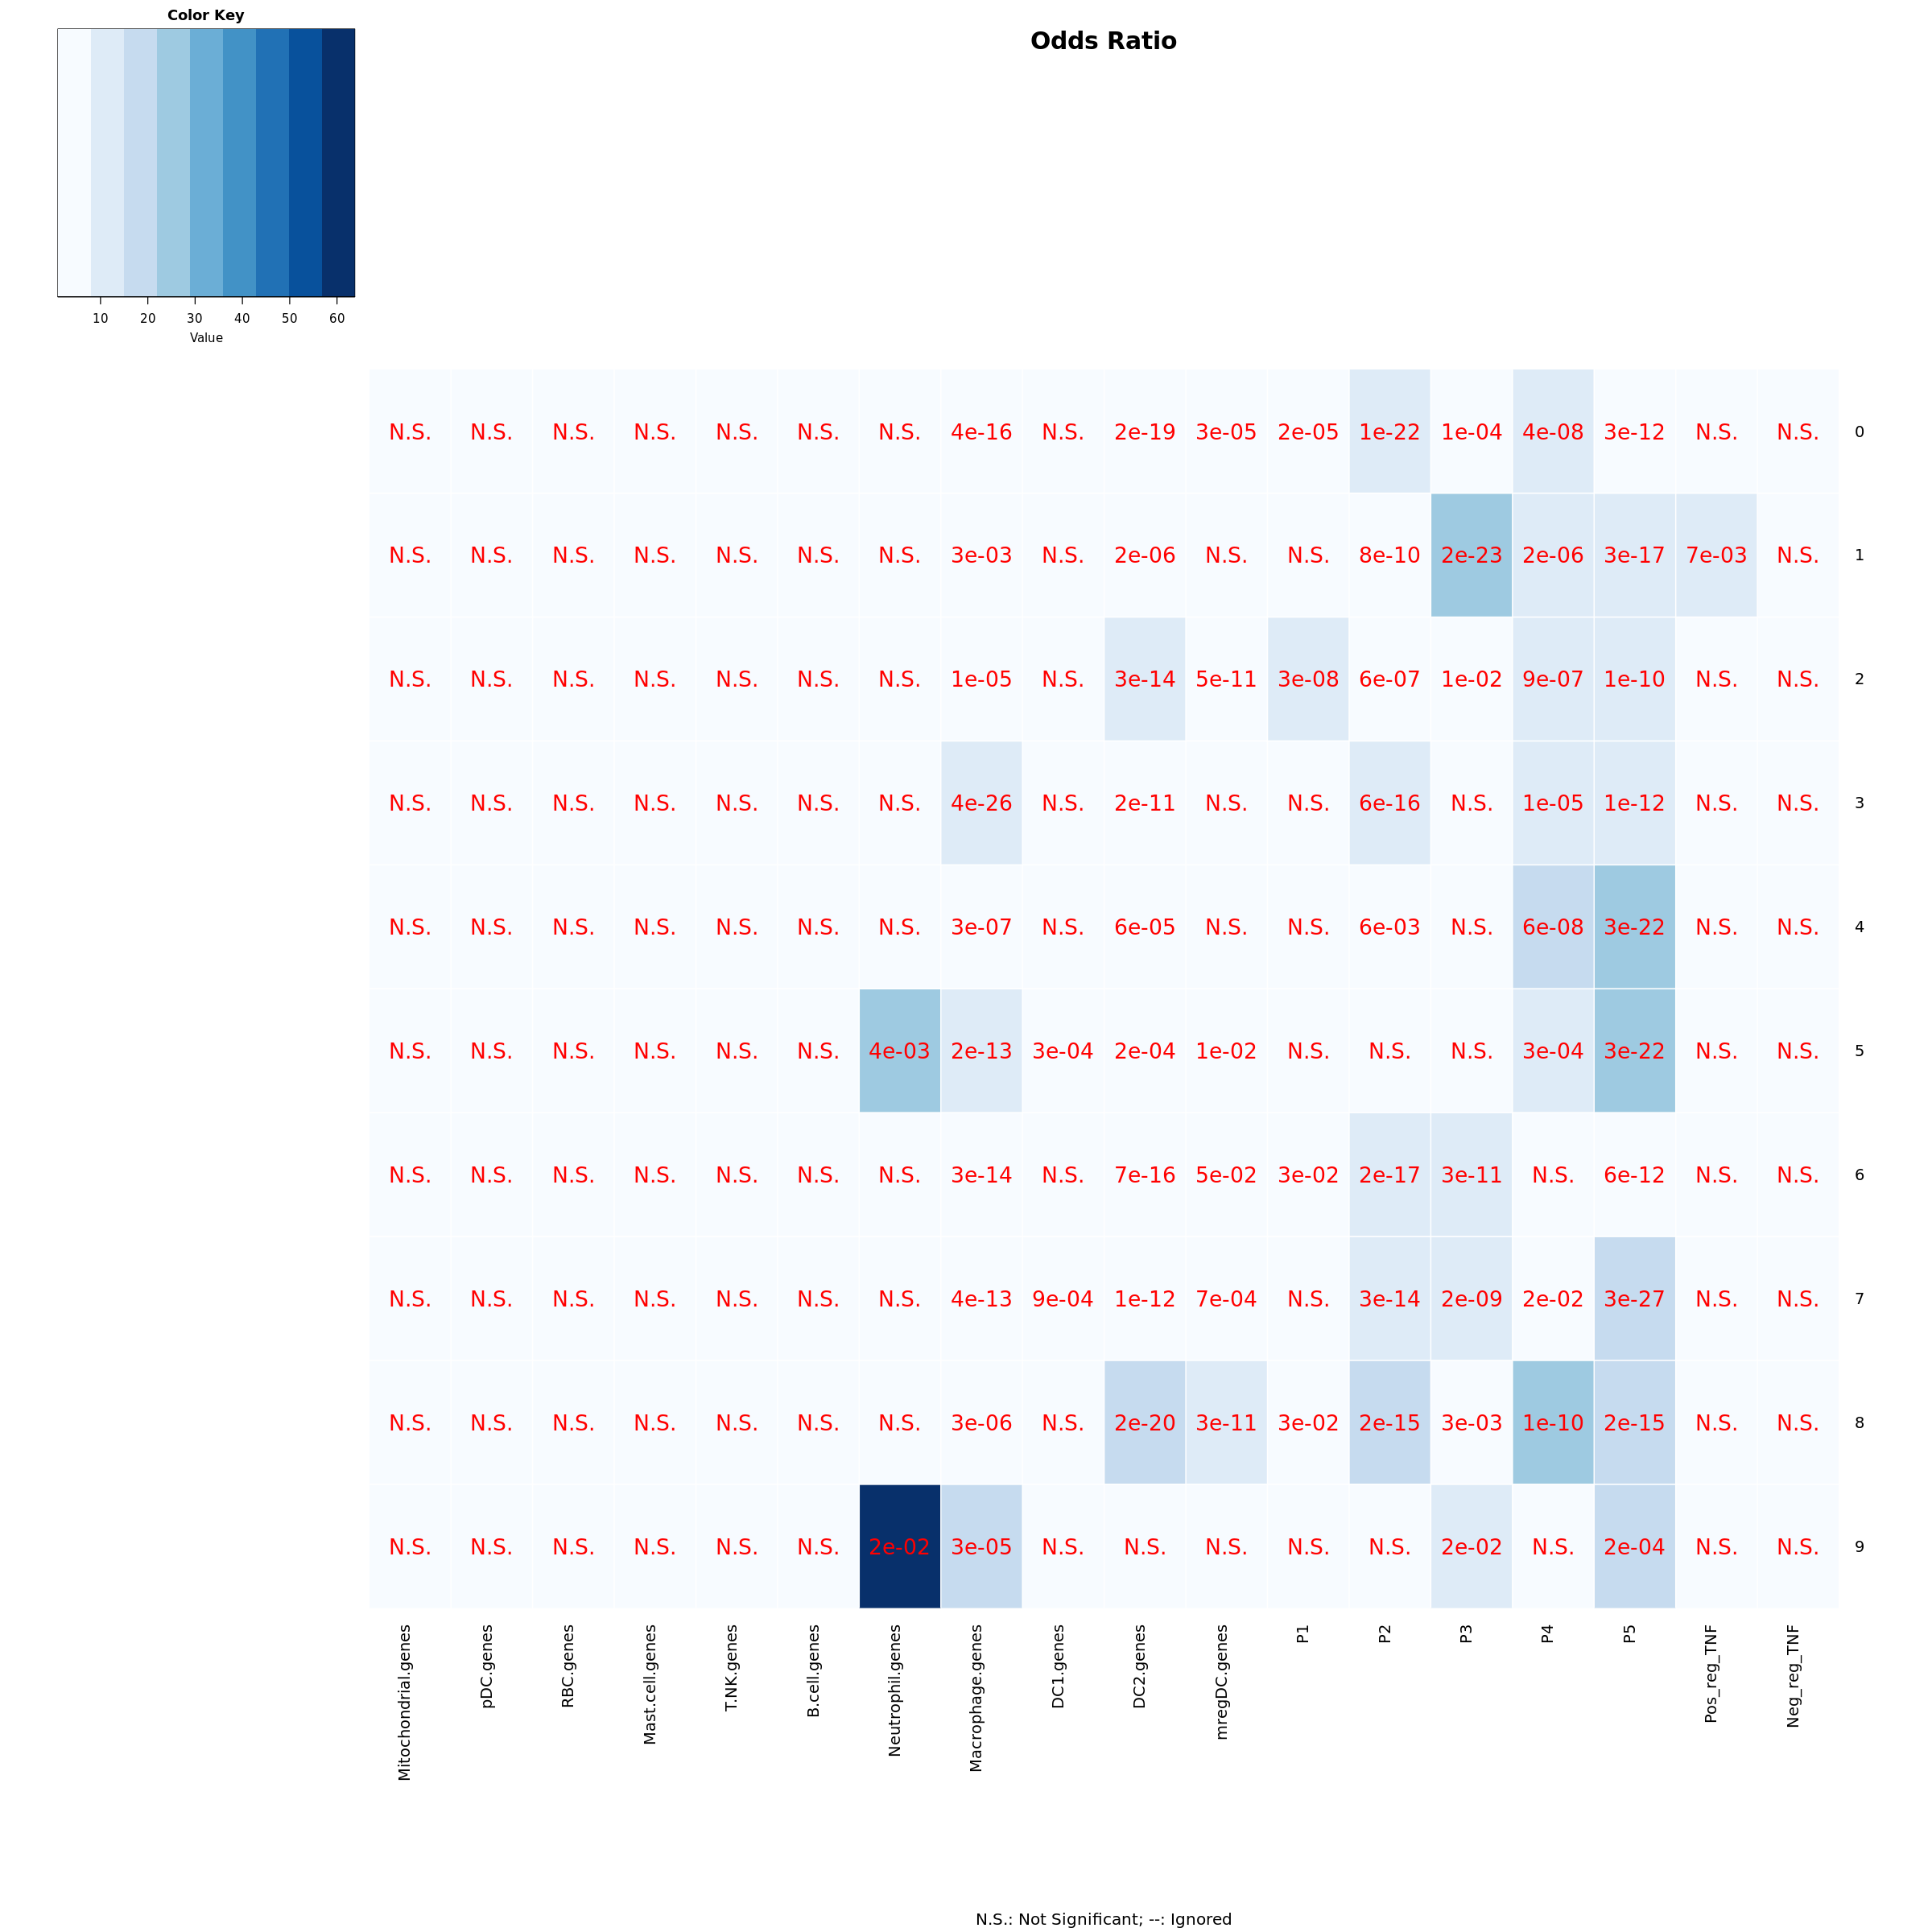

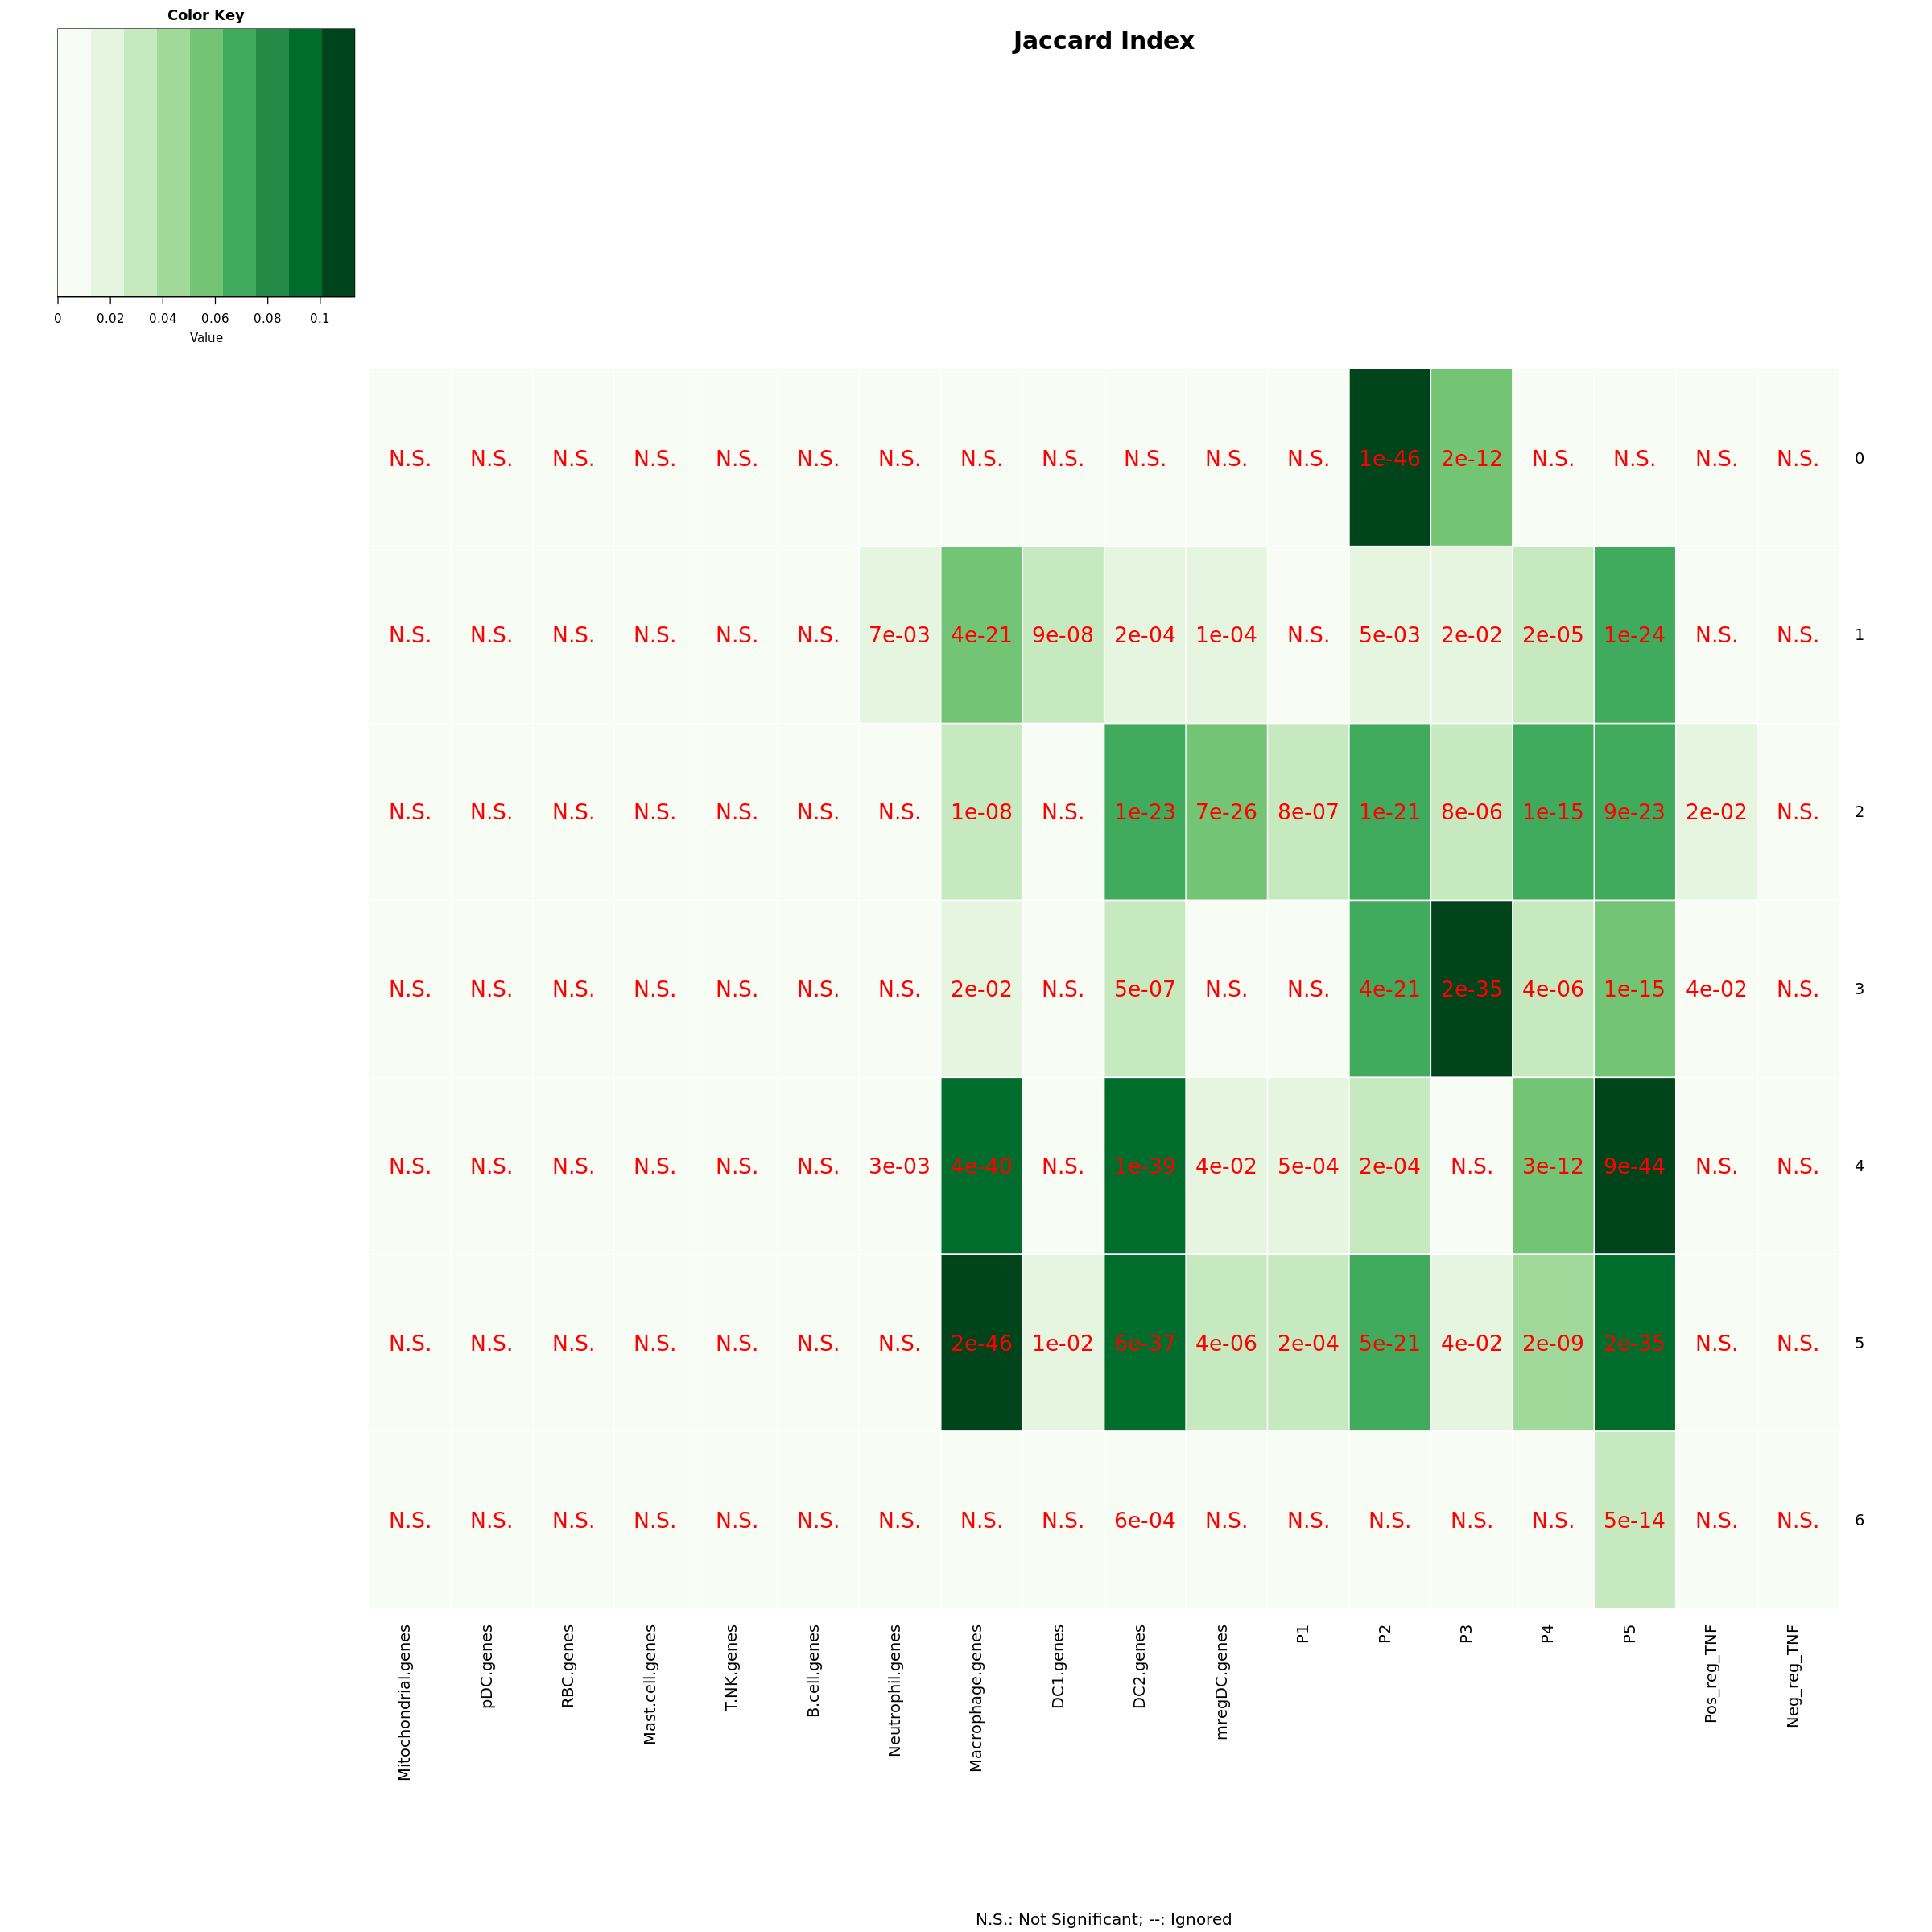

[1] "ME_GeneModules_kmeans_8_Modules"


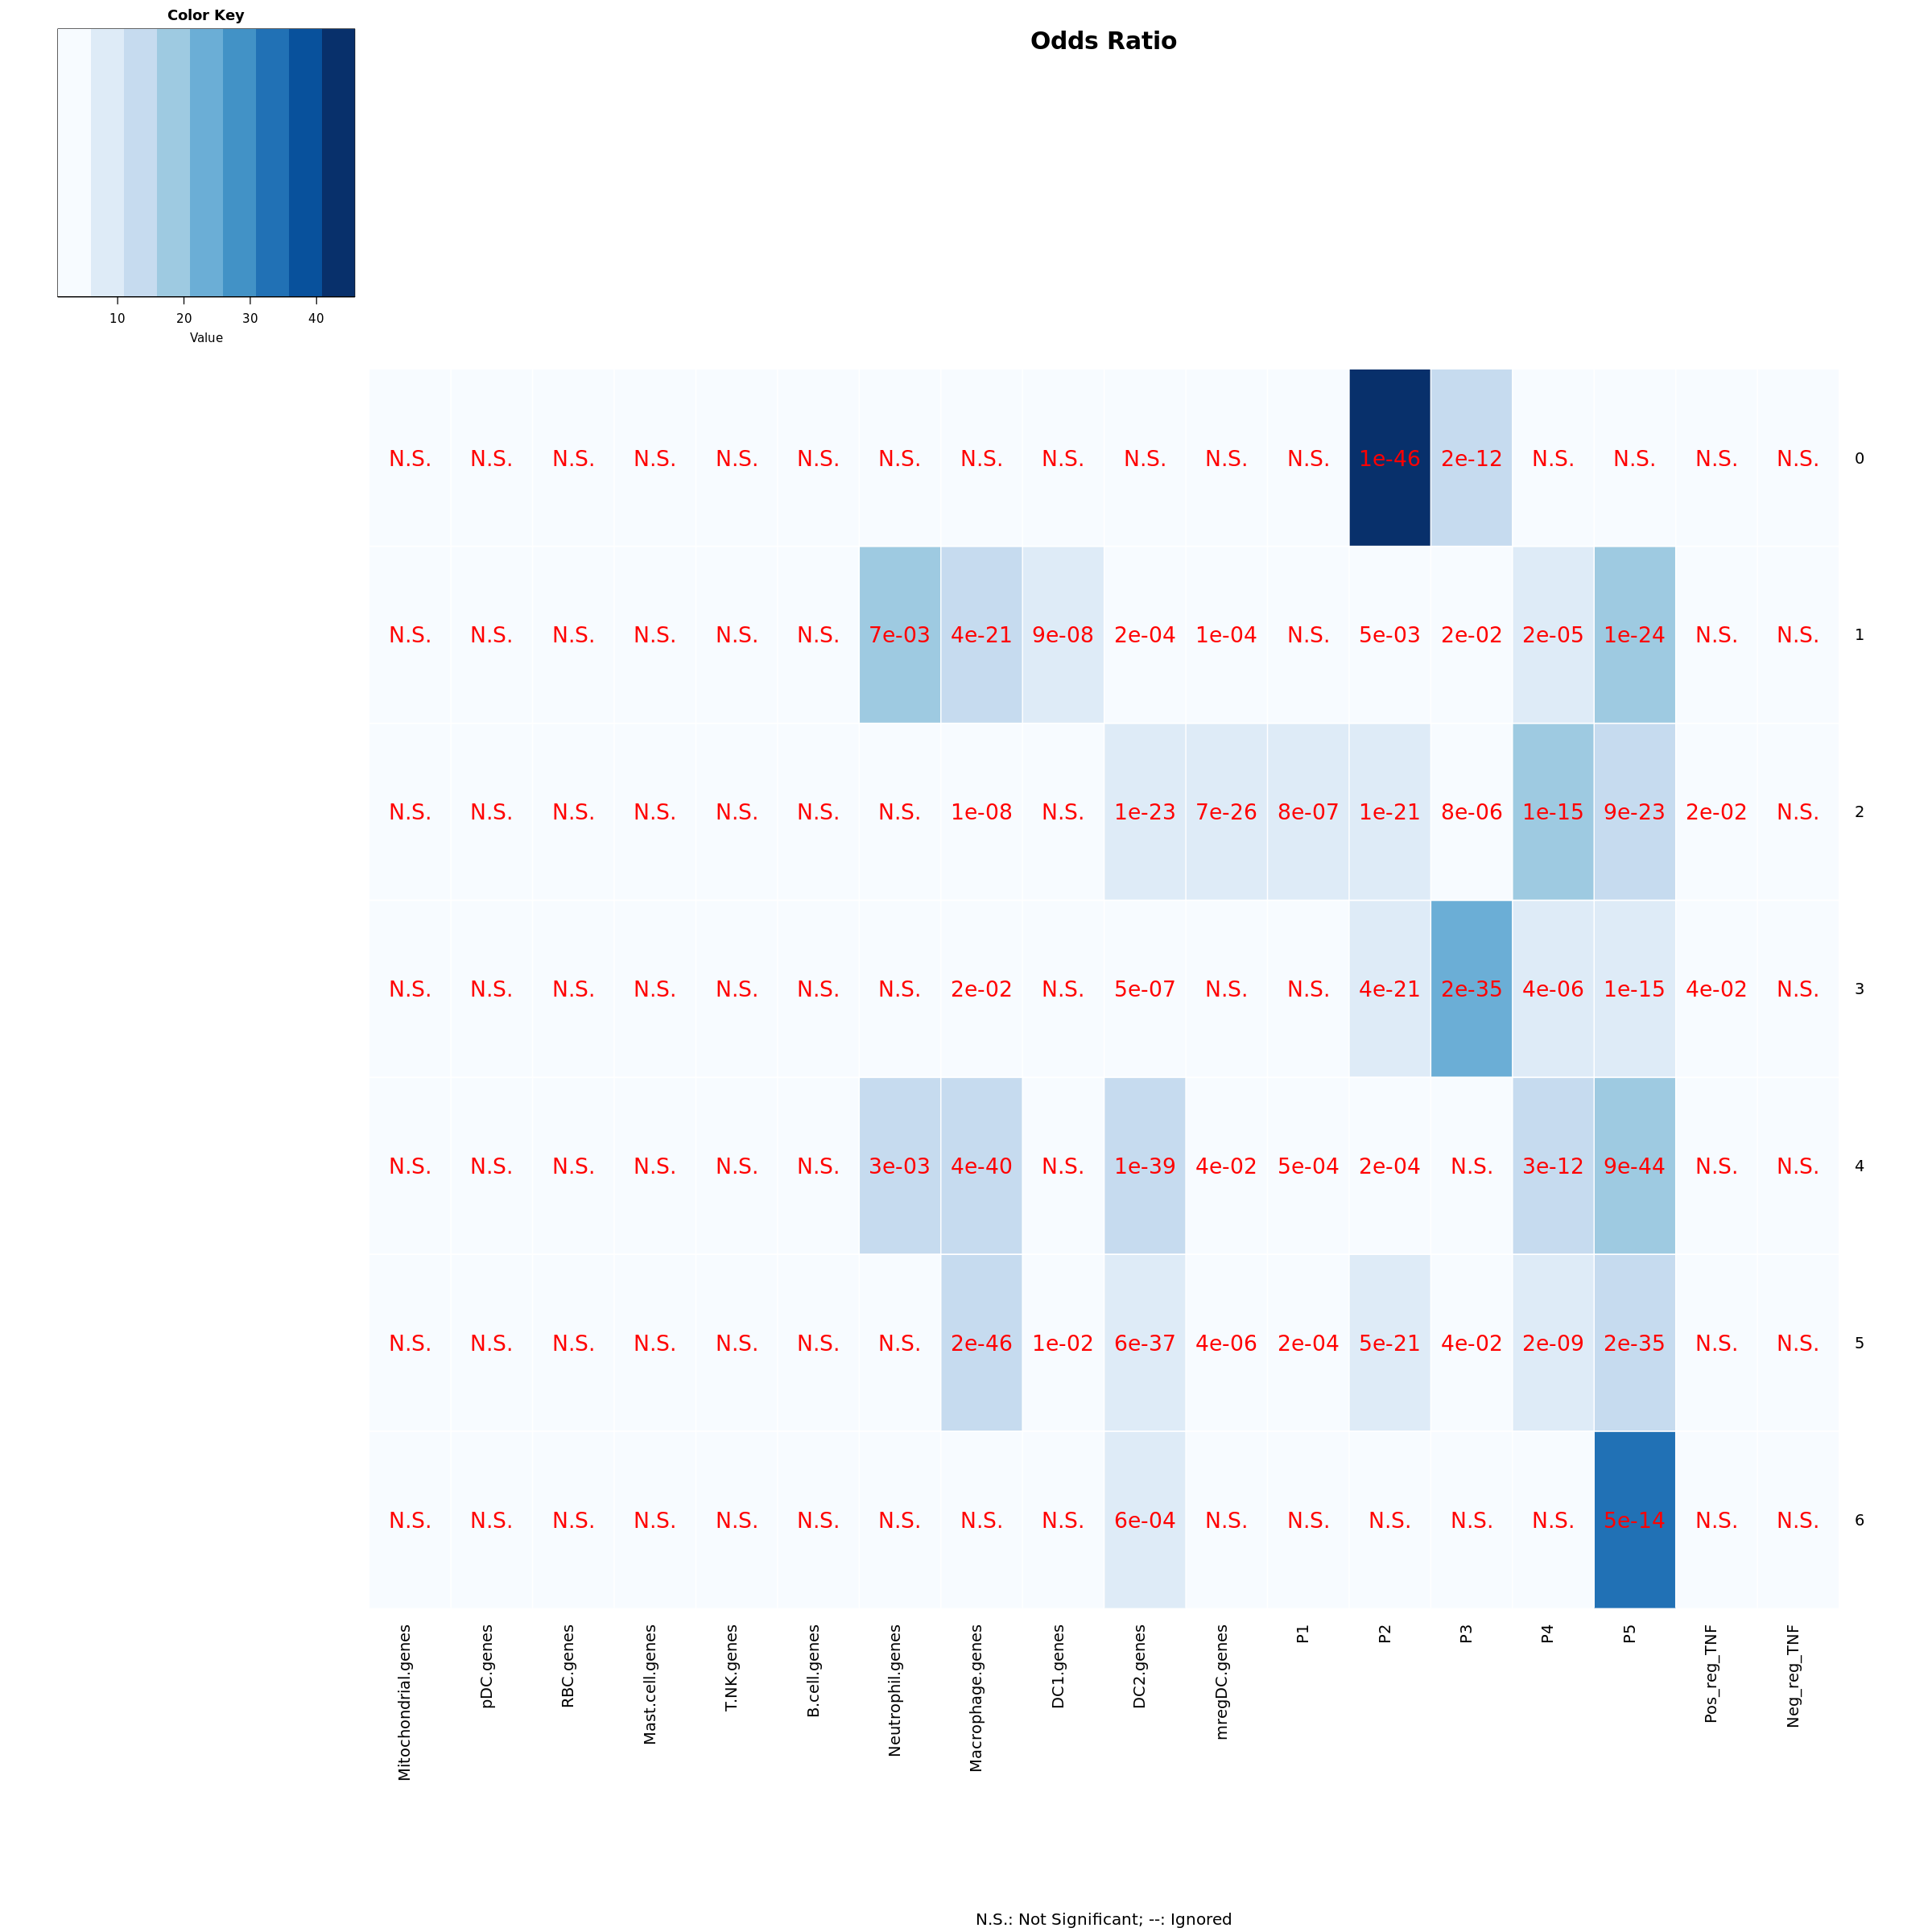

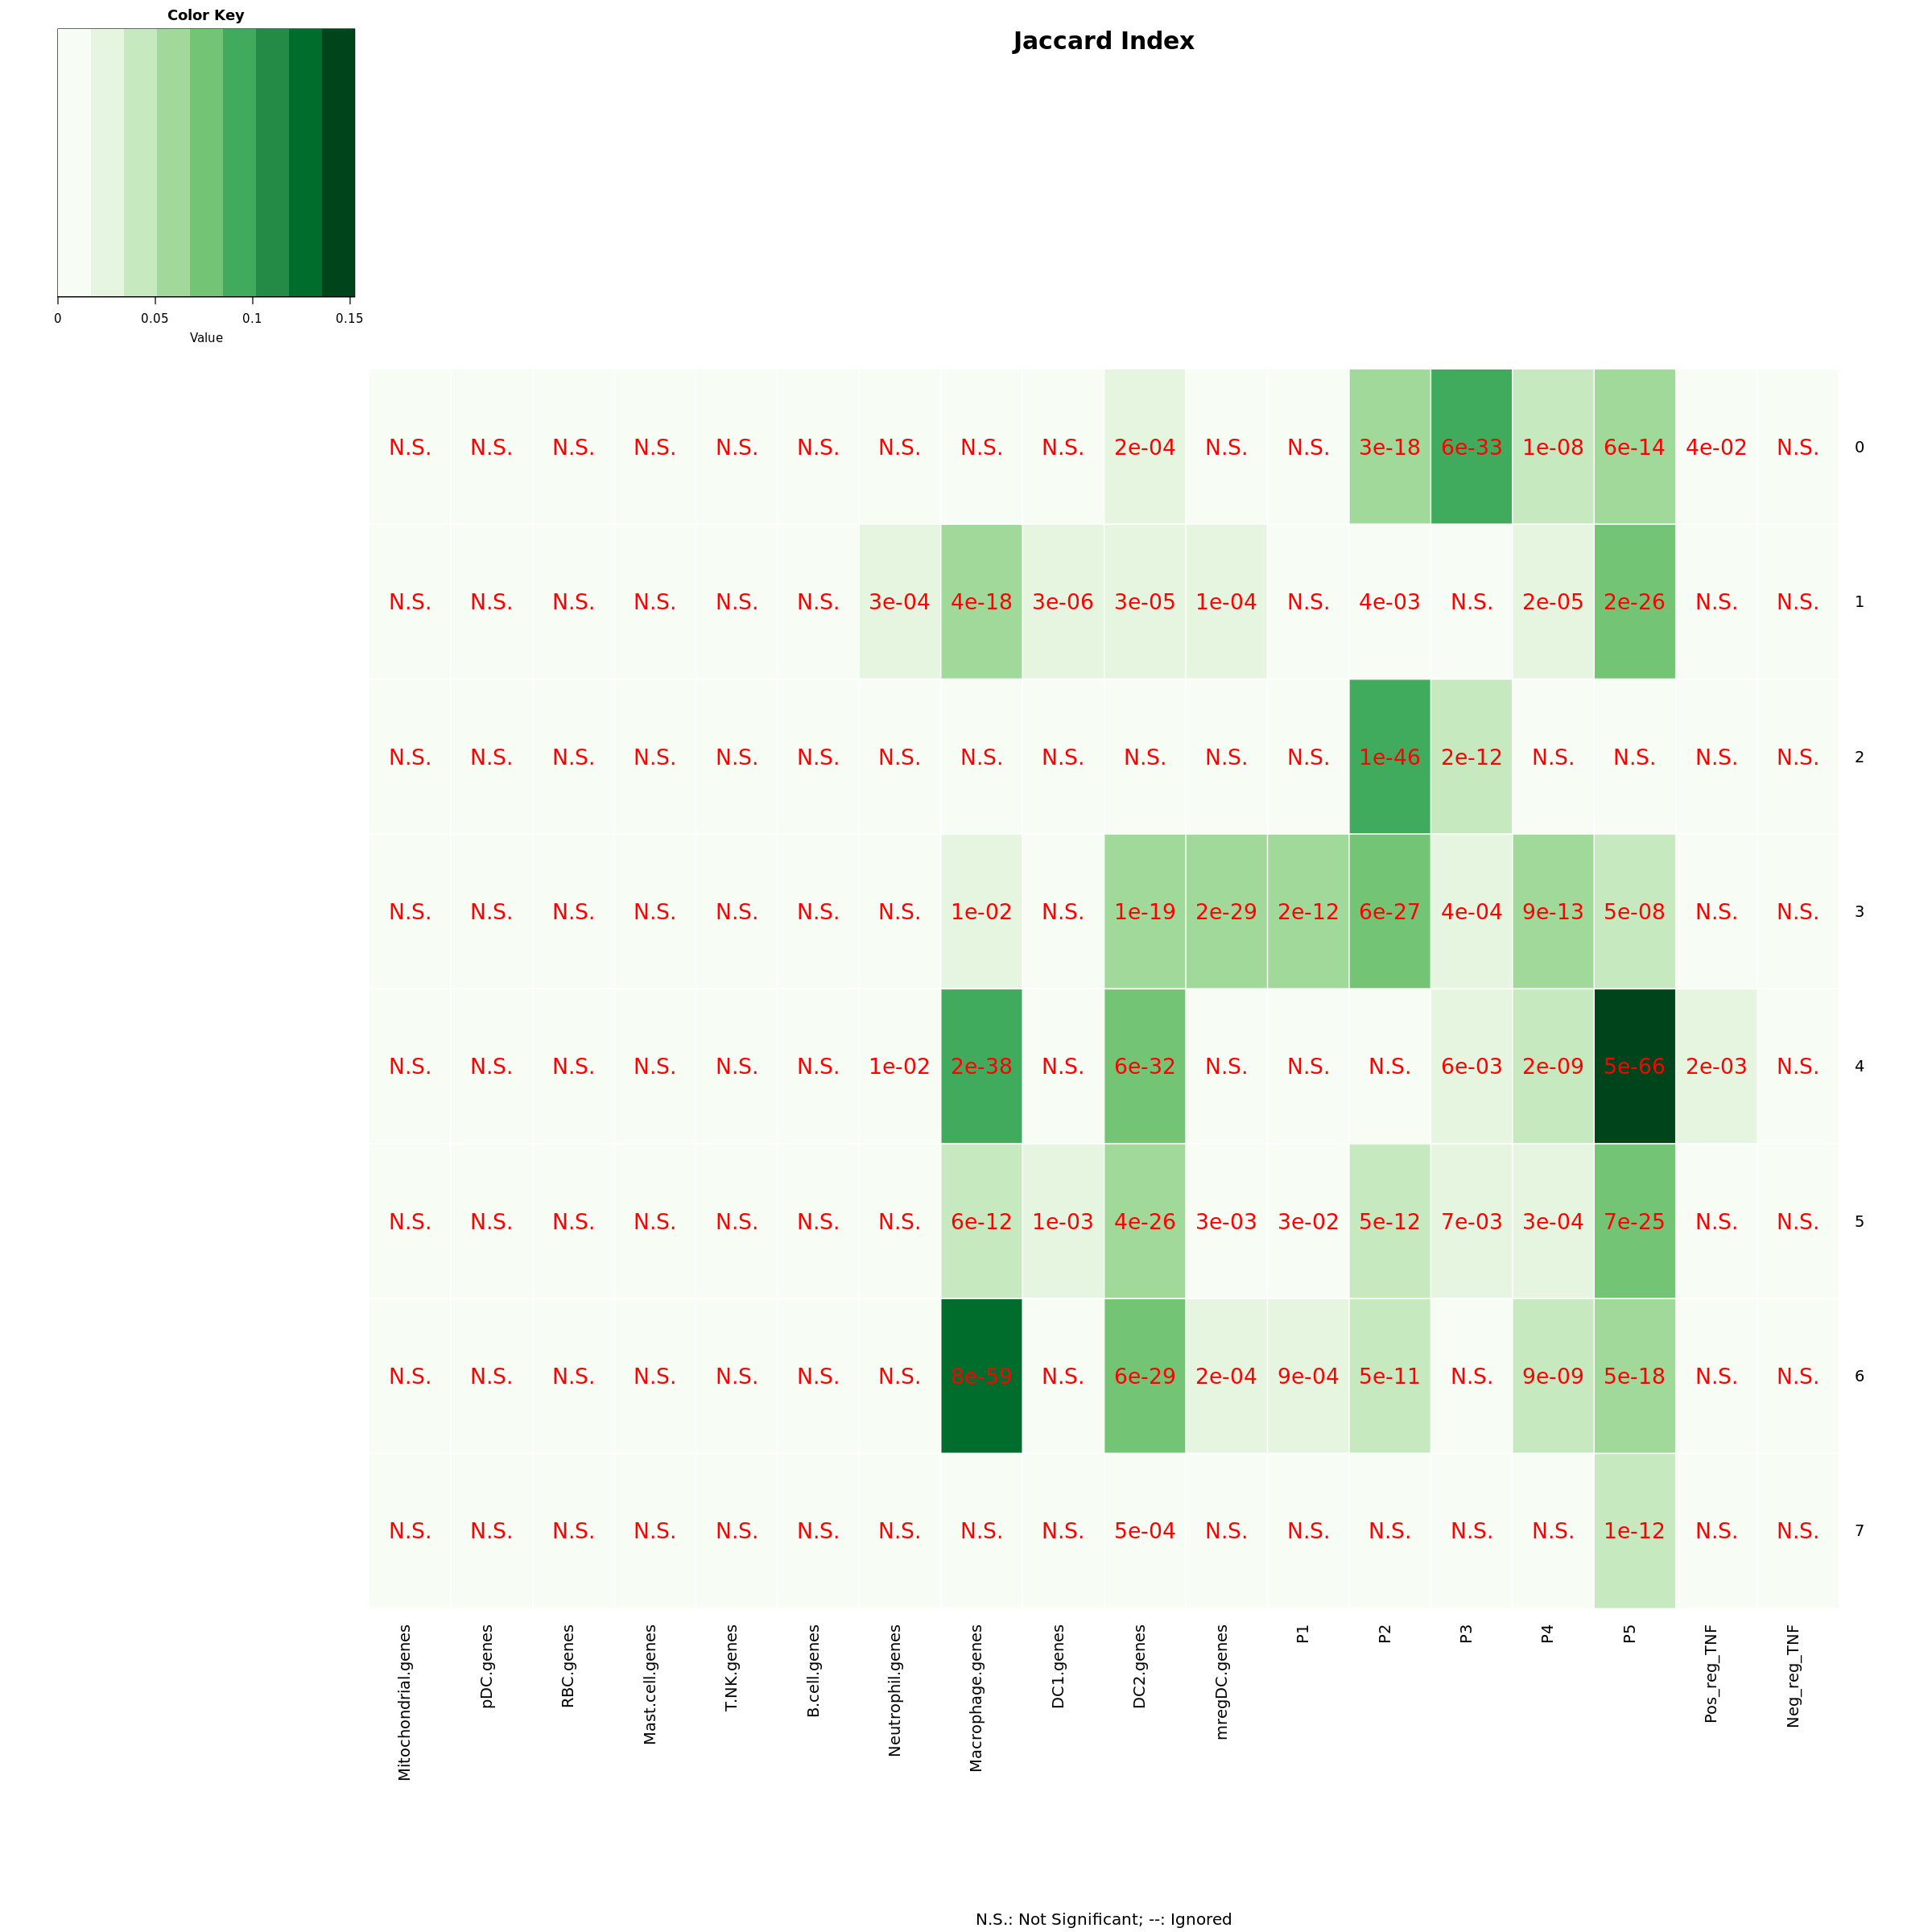

[1] "ME_GeneModules_kmeans_9_Modules"


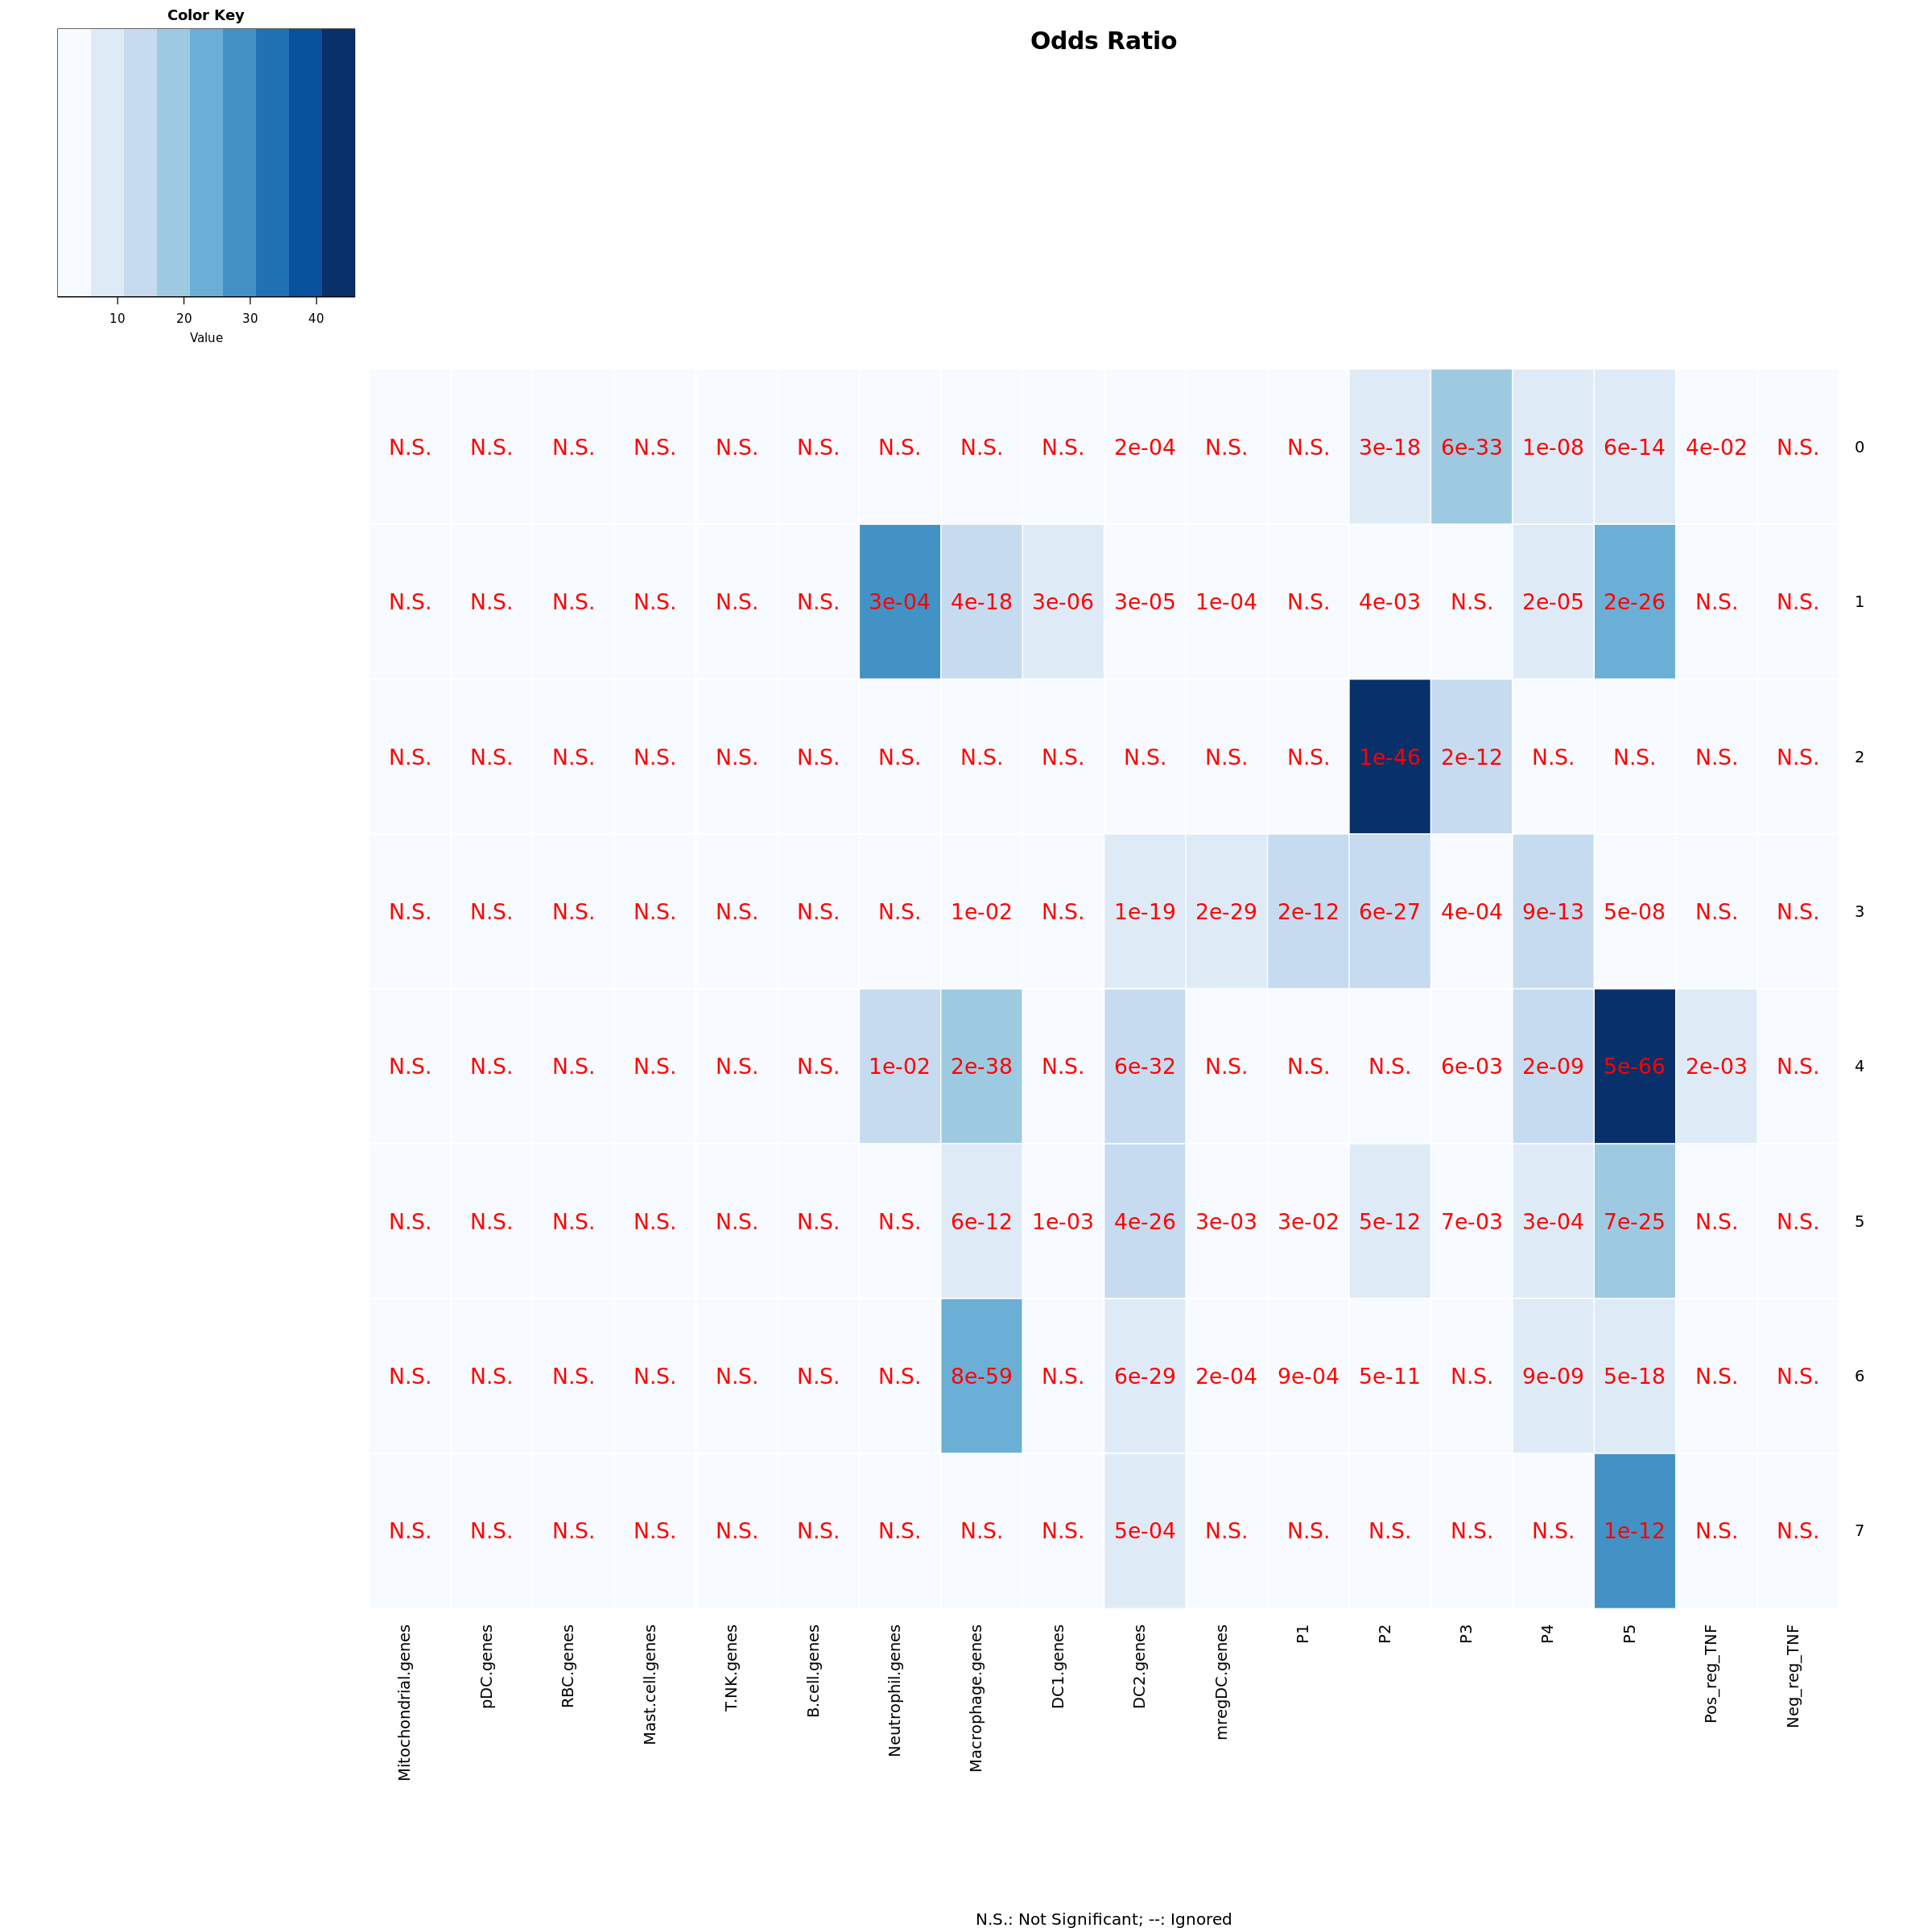

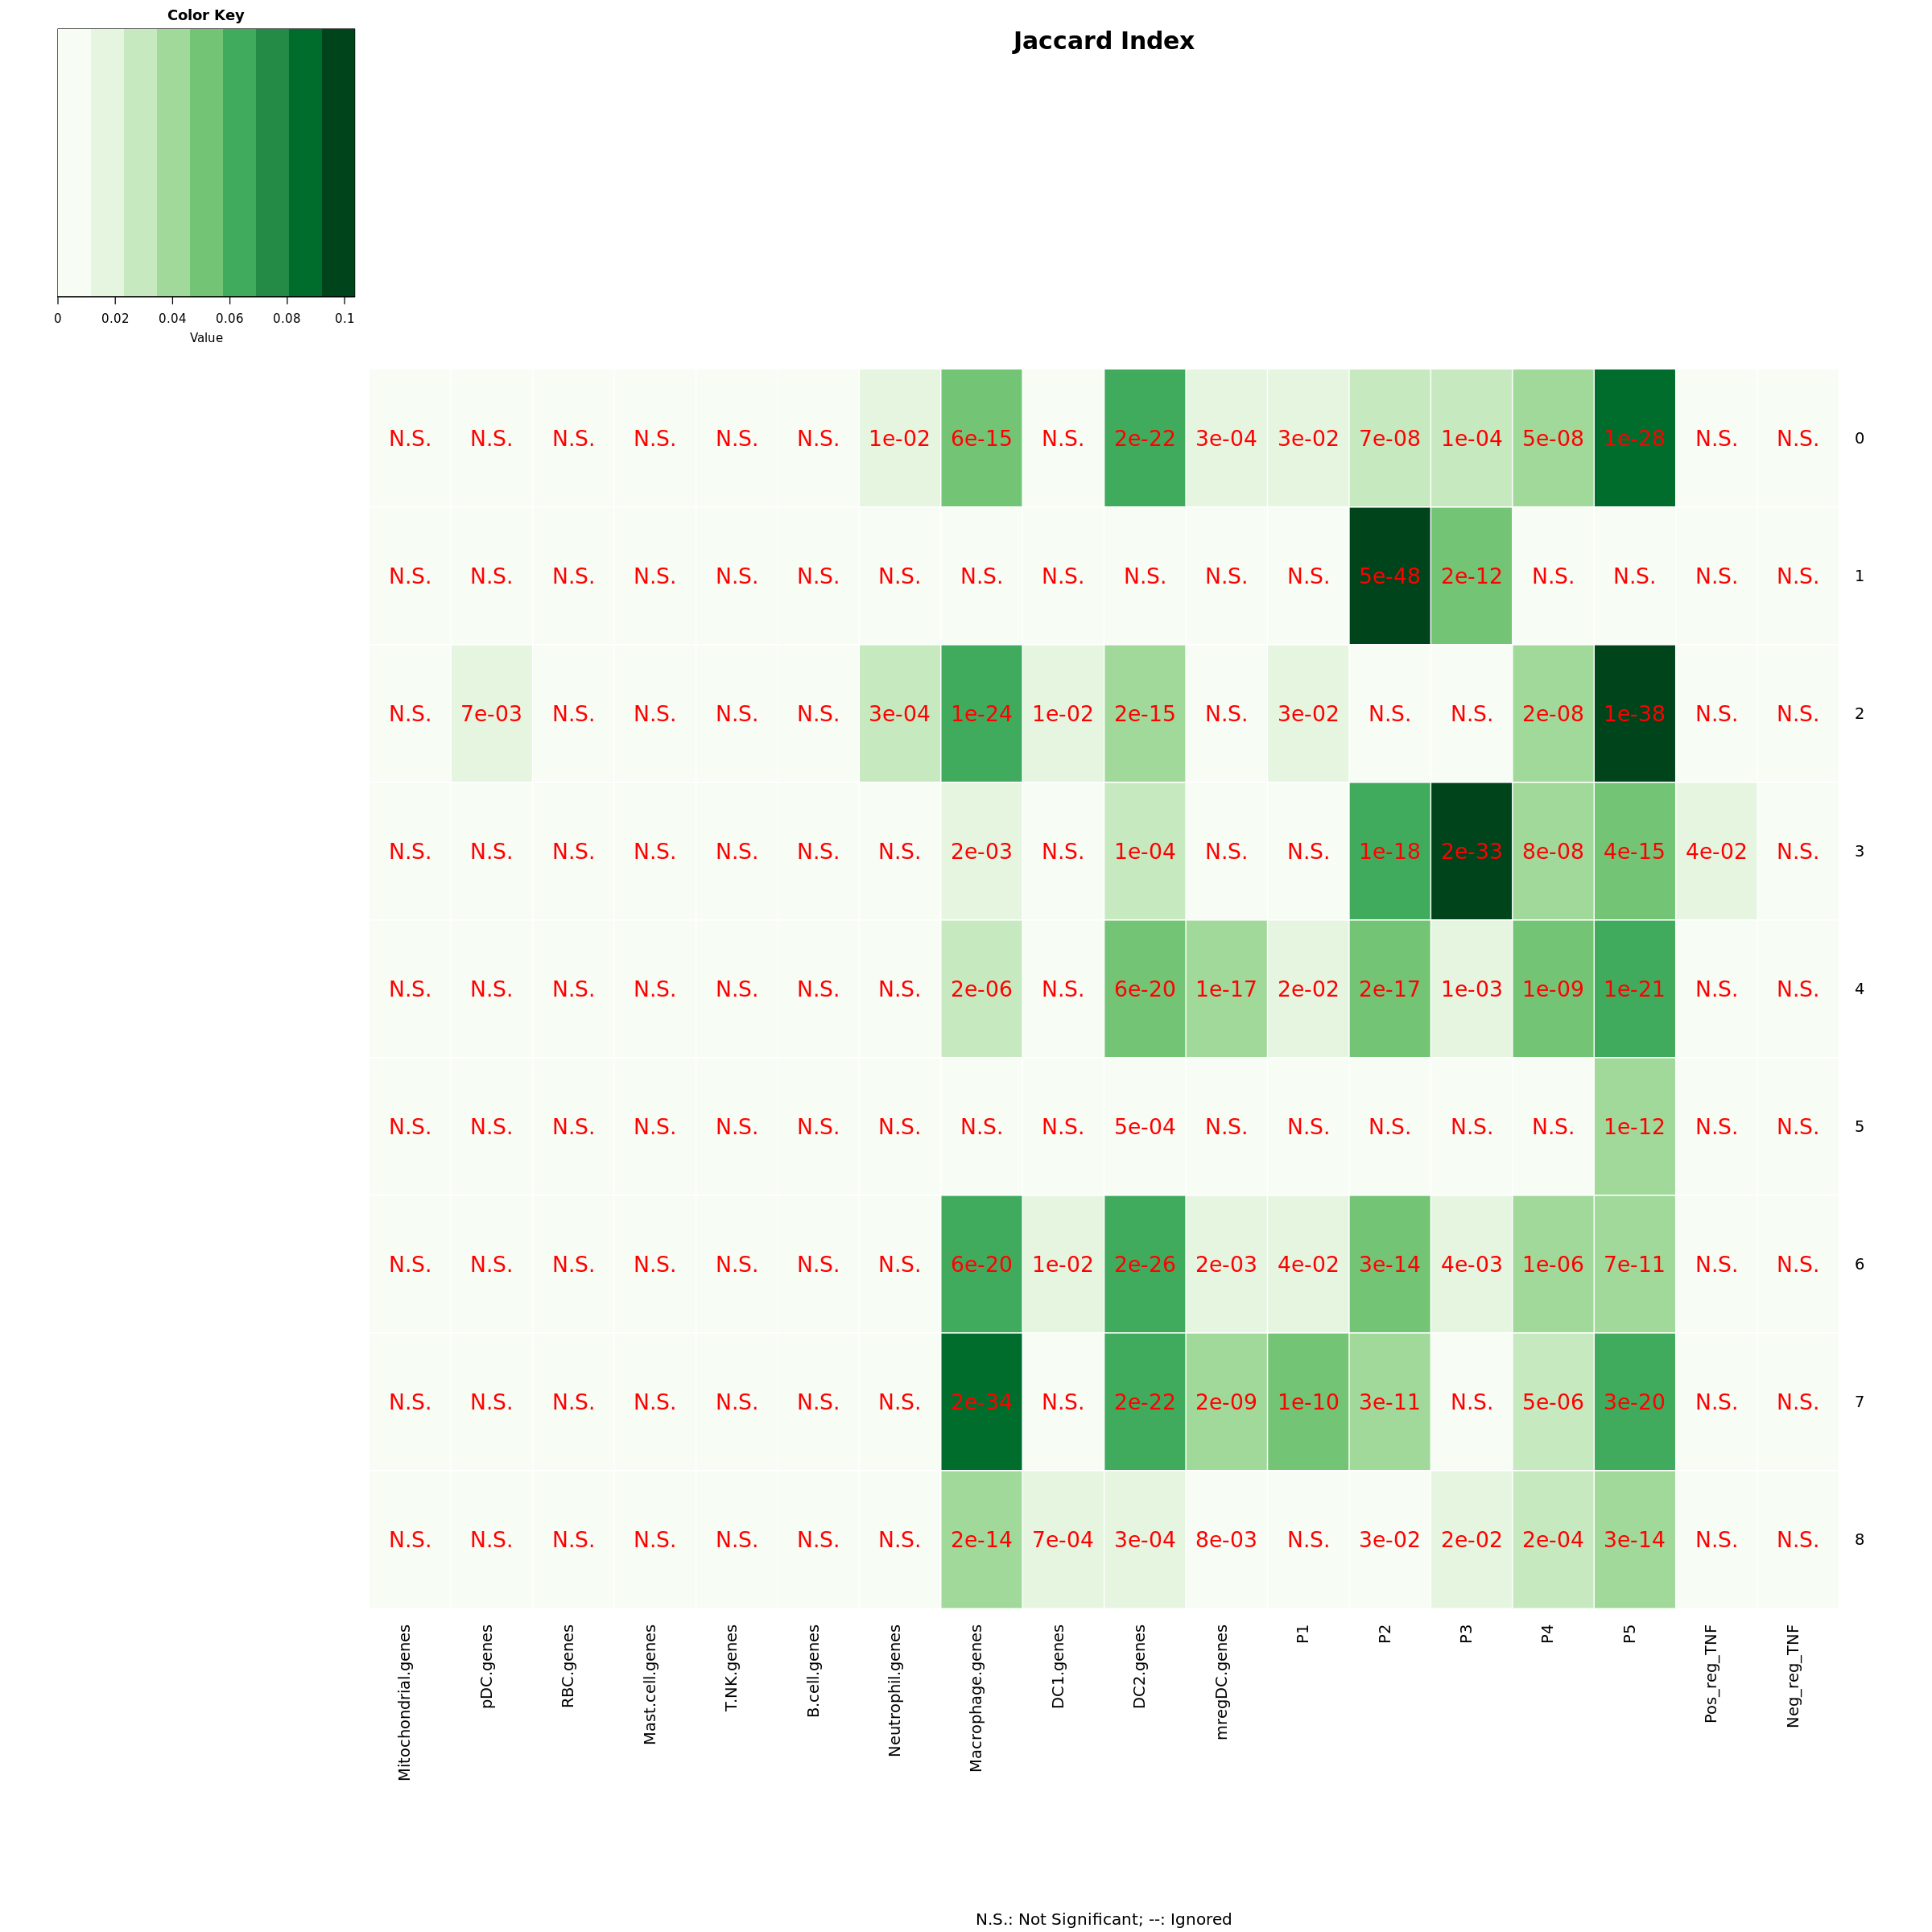

[1] "ME_GeneModules_leiden_8_Modules"


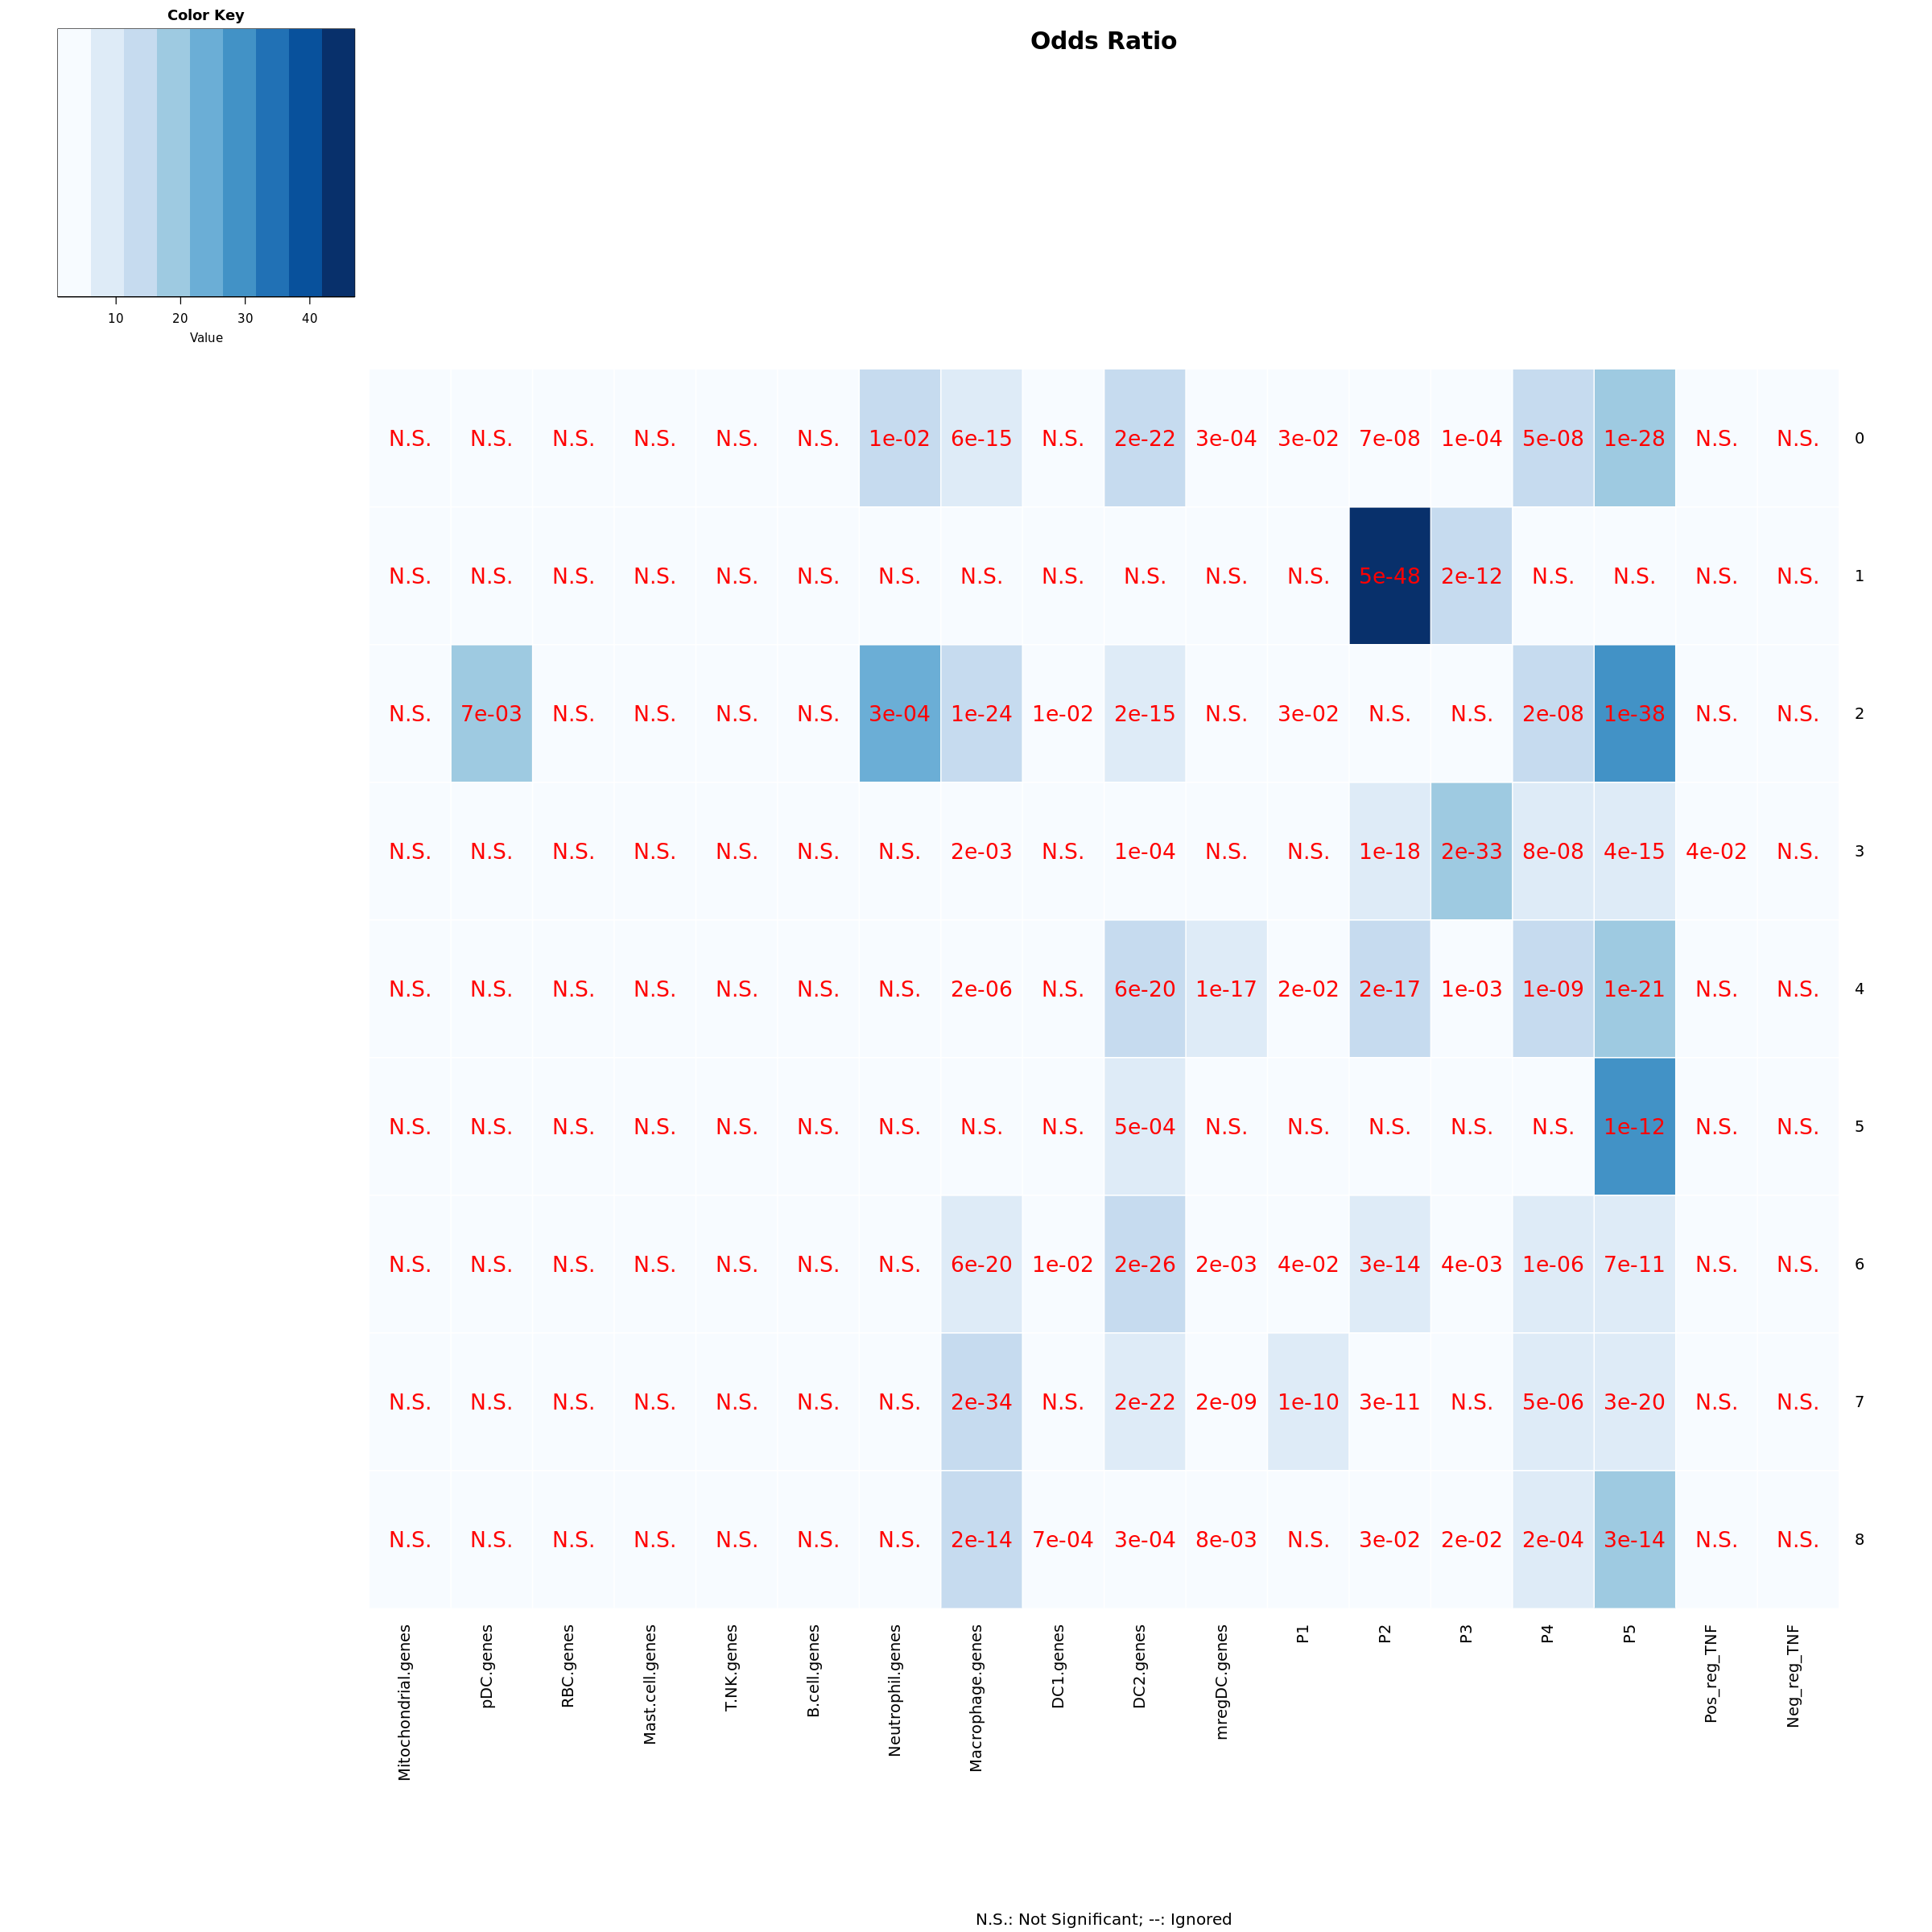

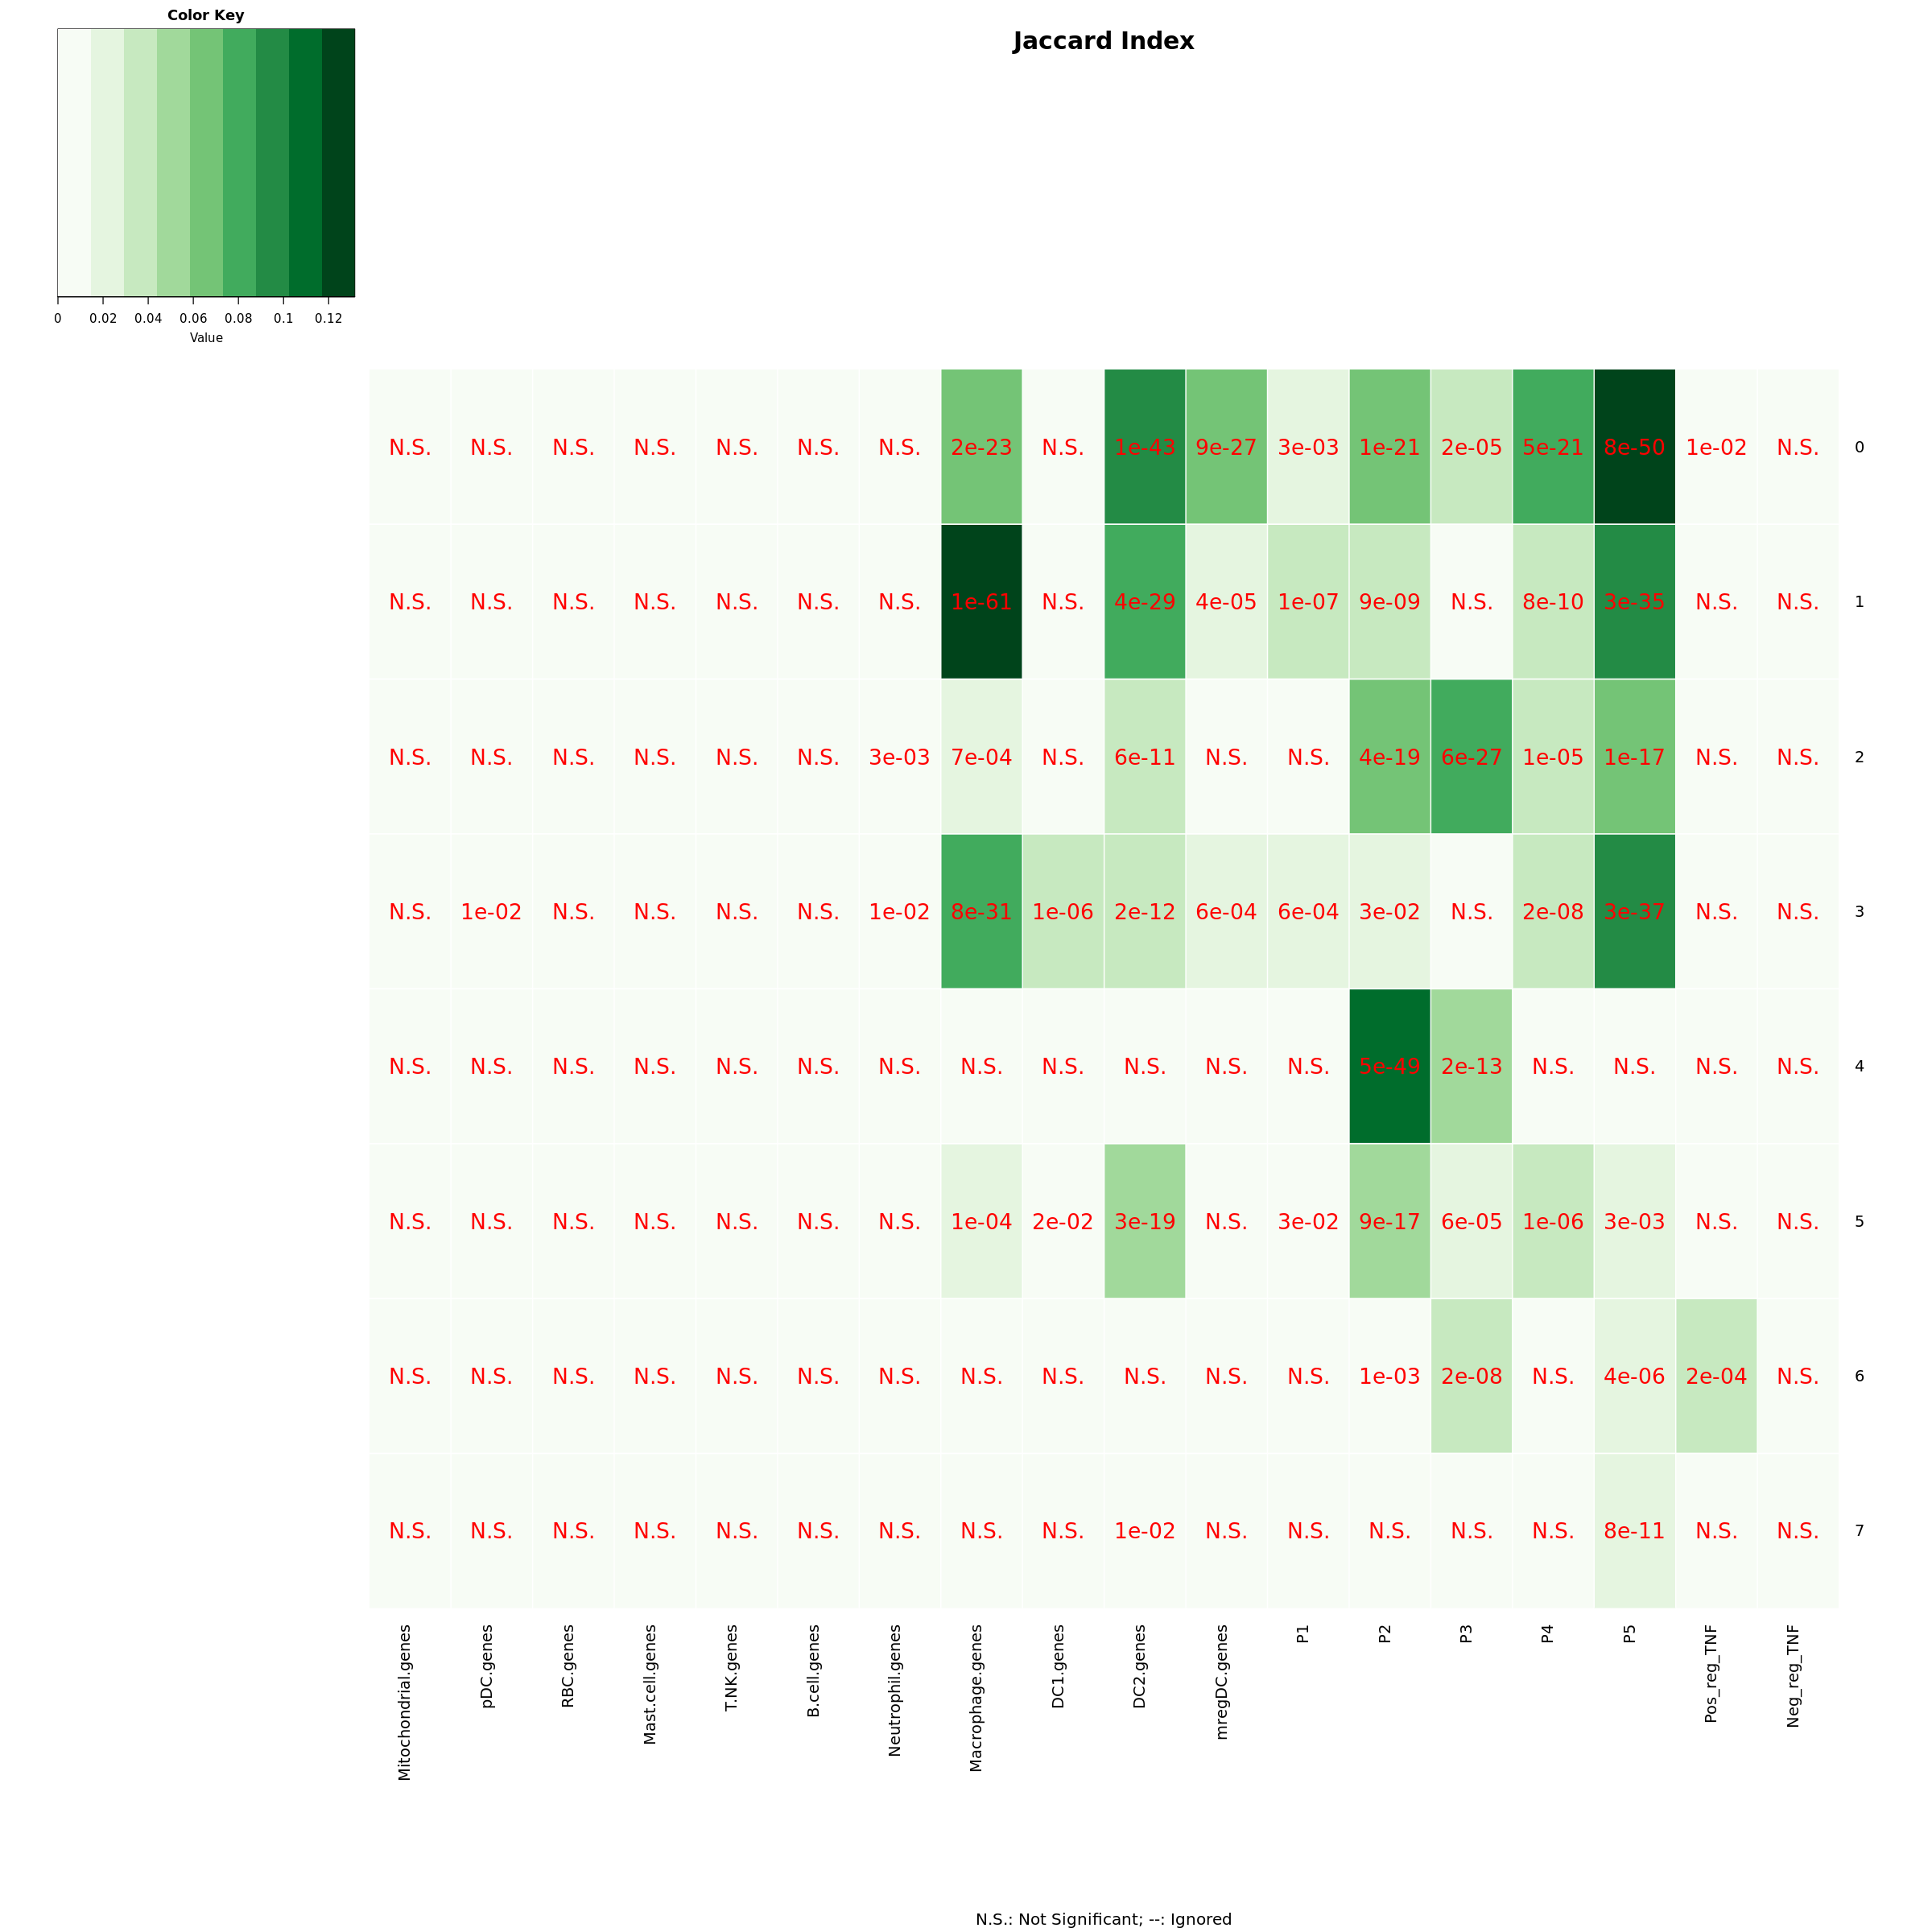

[1] "ME_GeneModules_leiden_9_Modules"


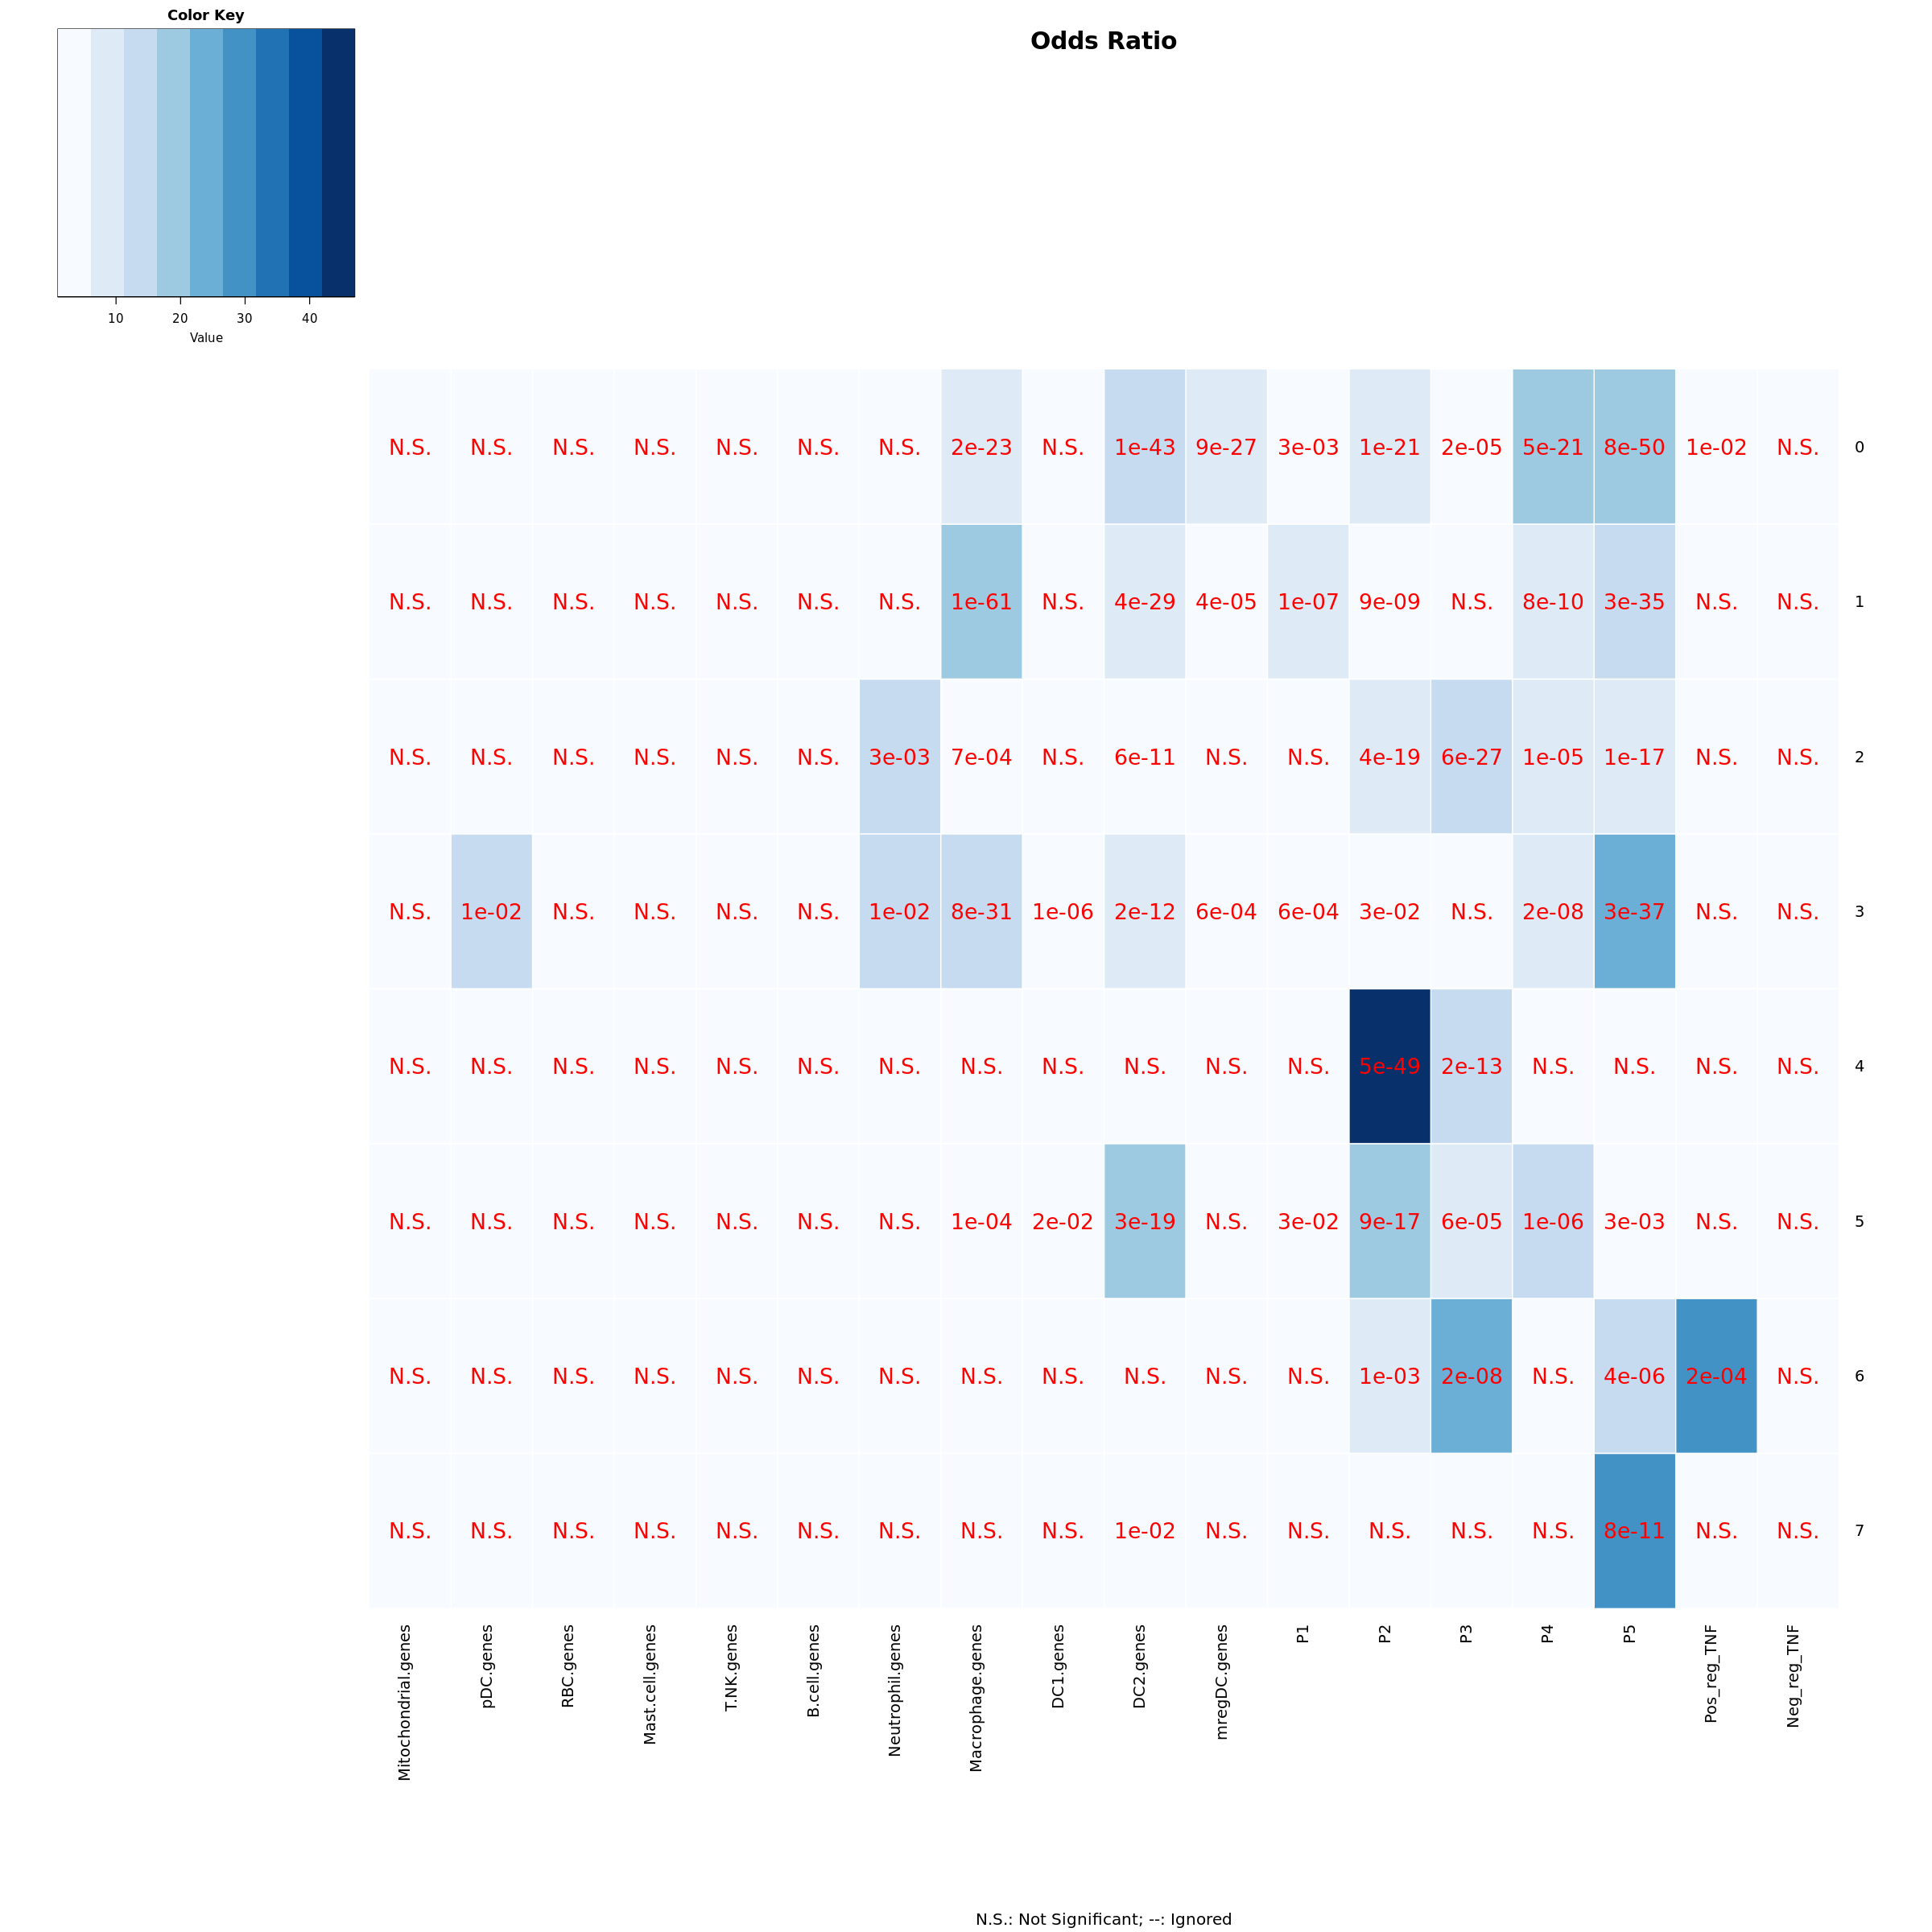

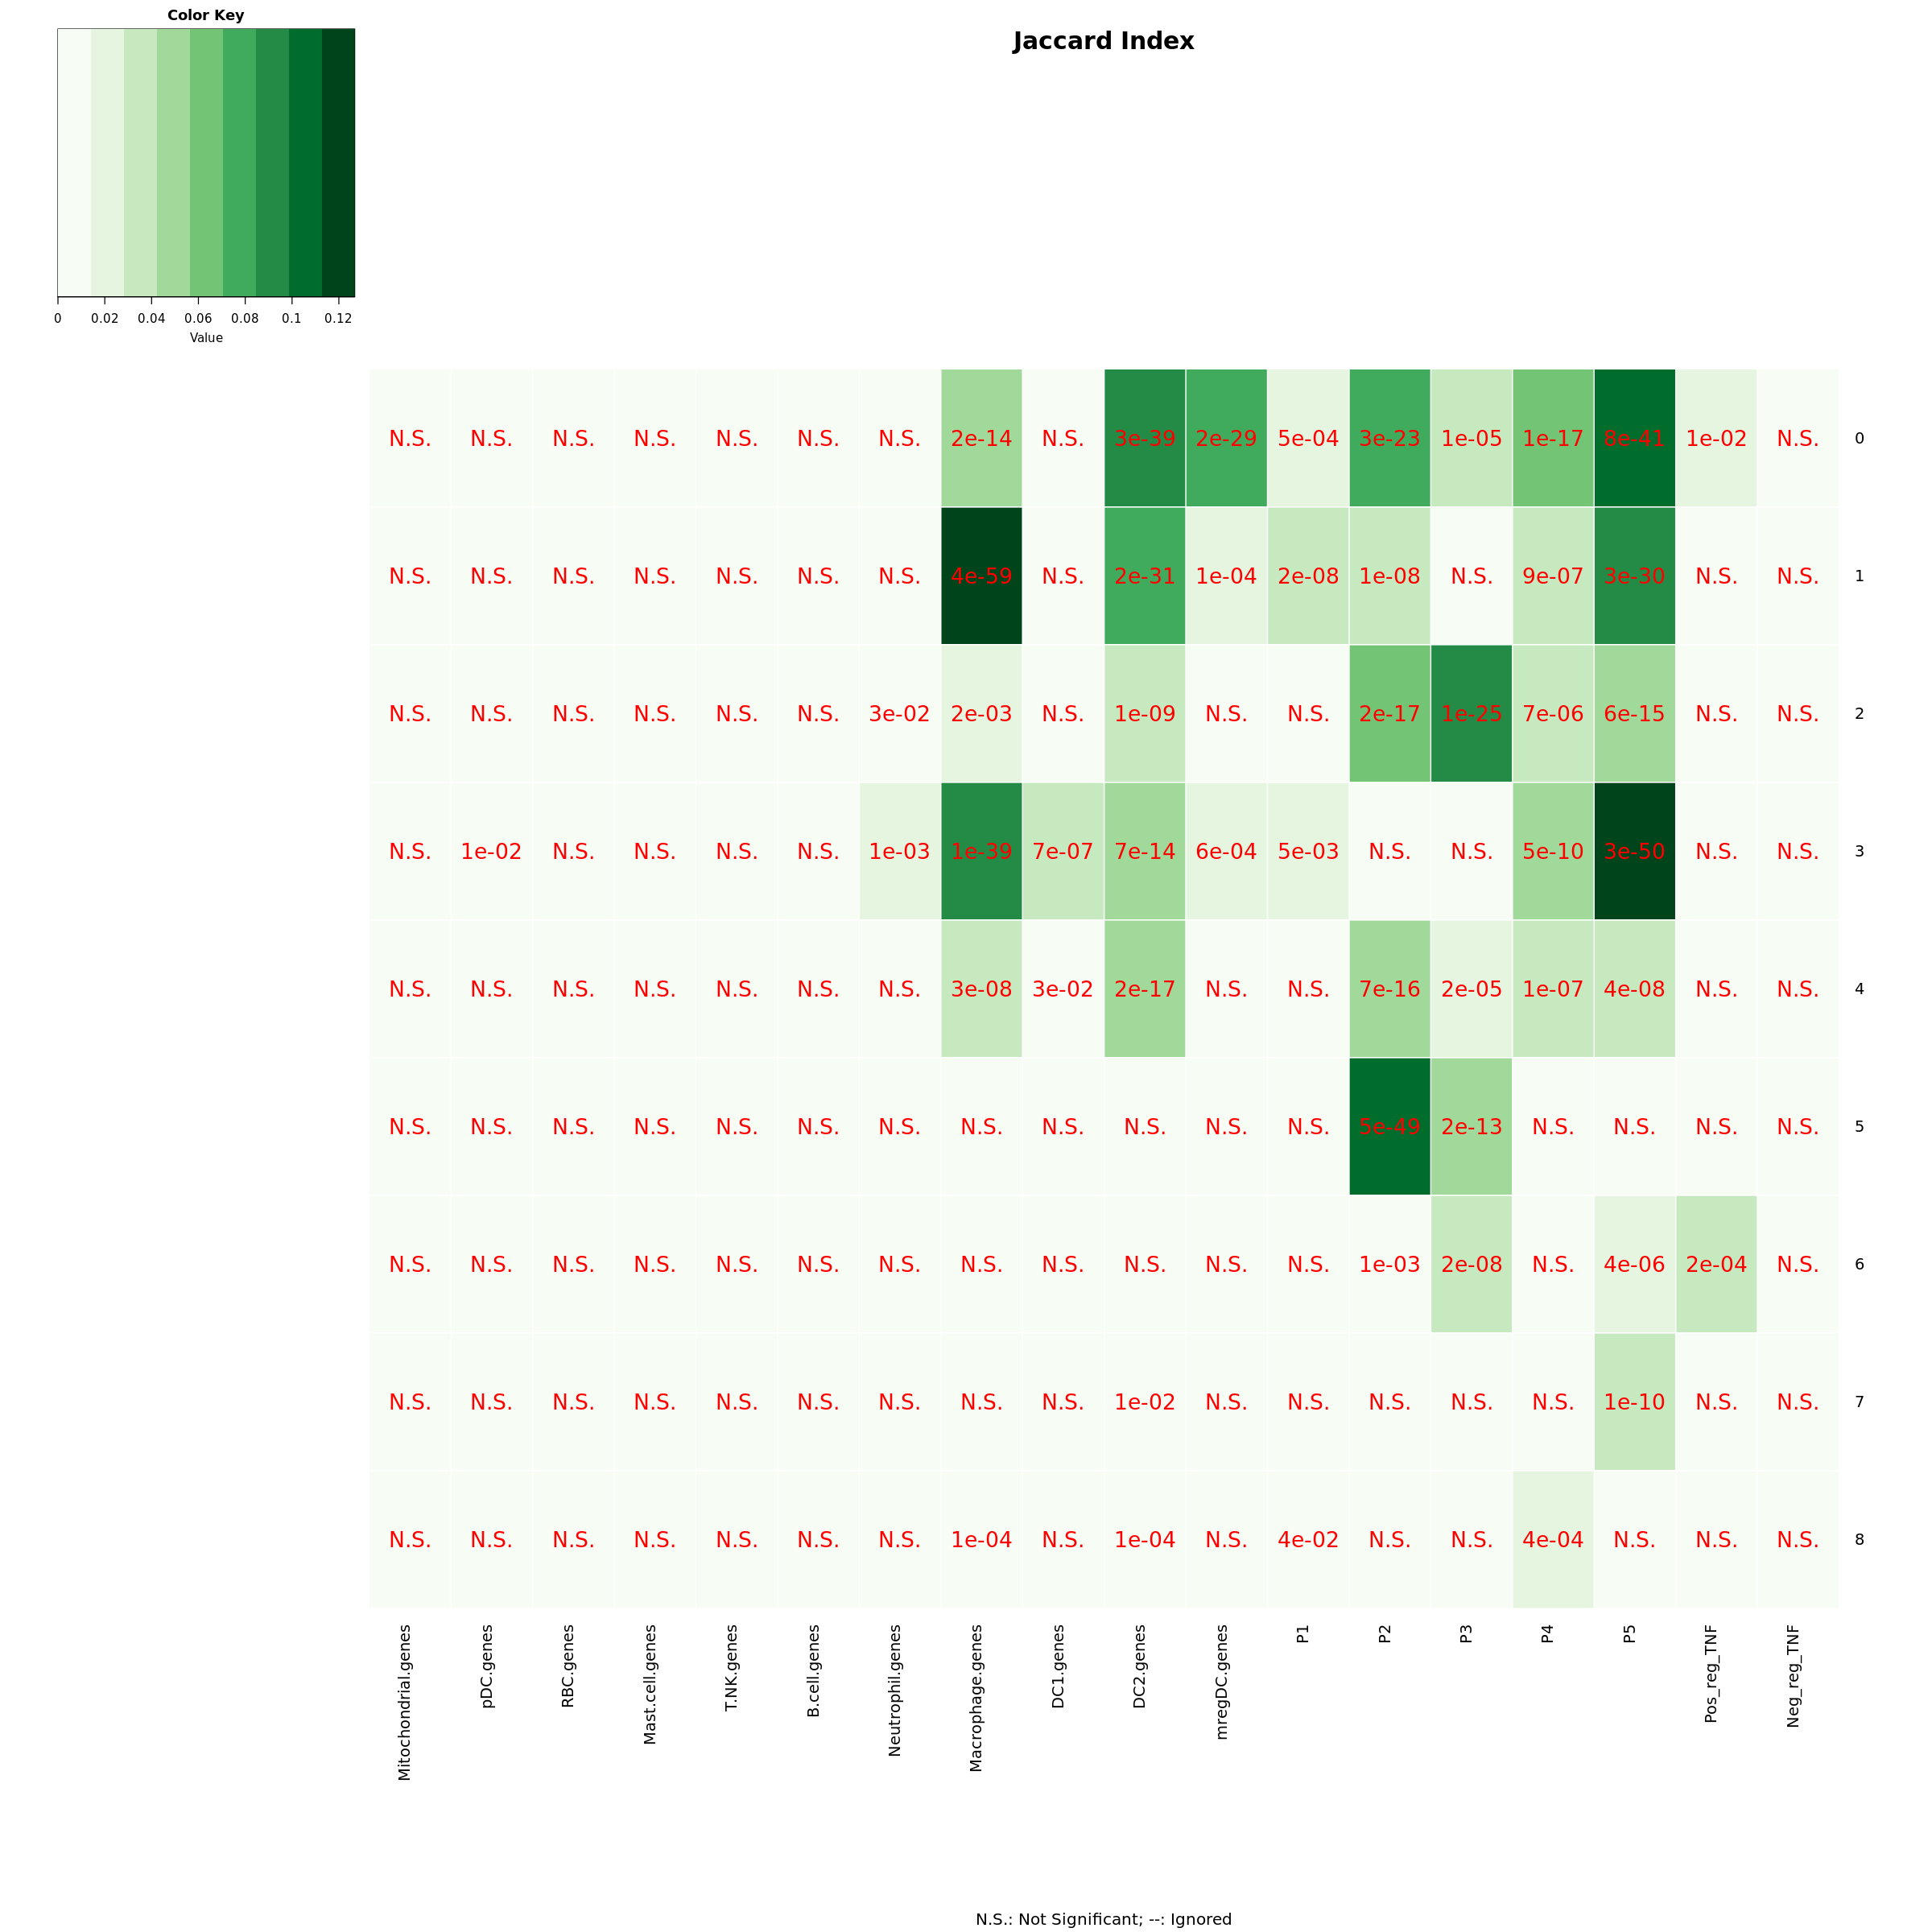

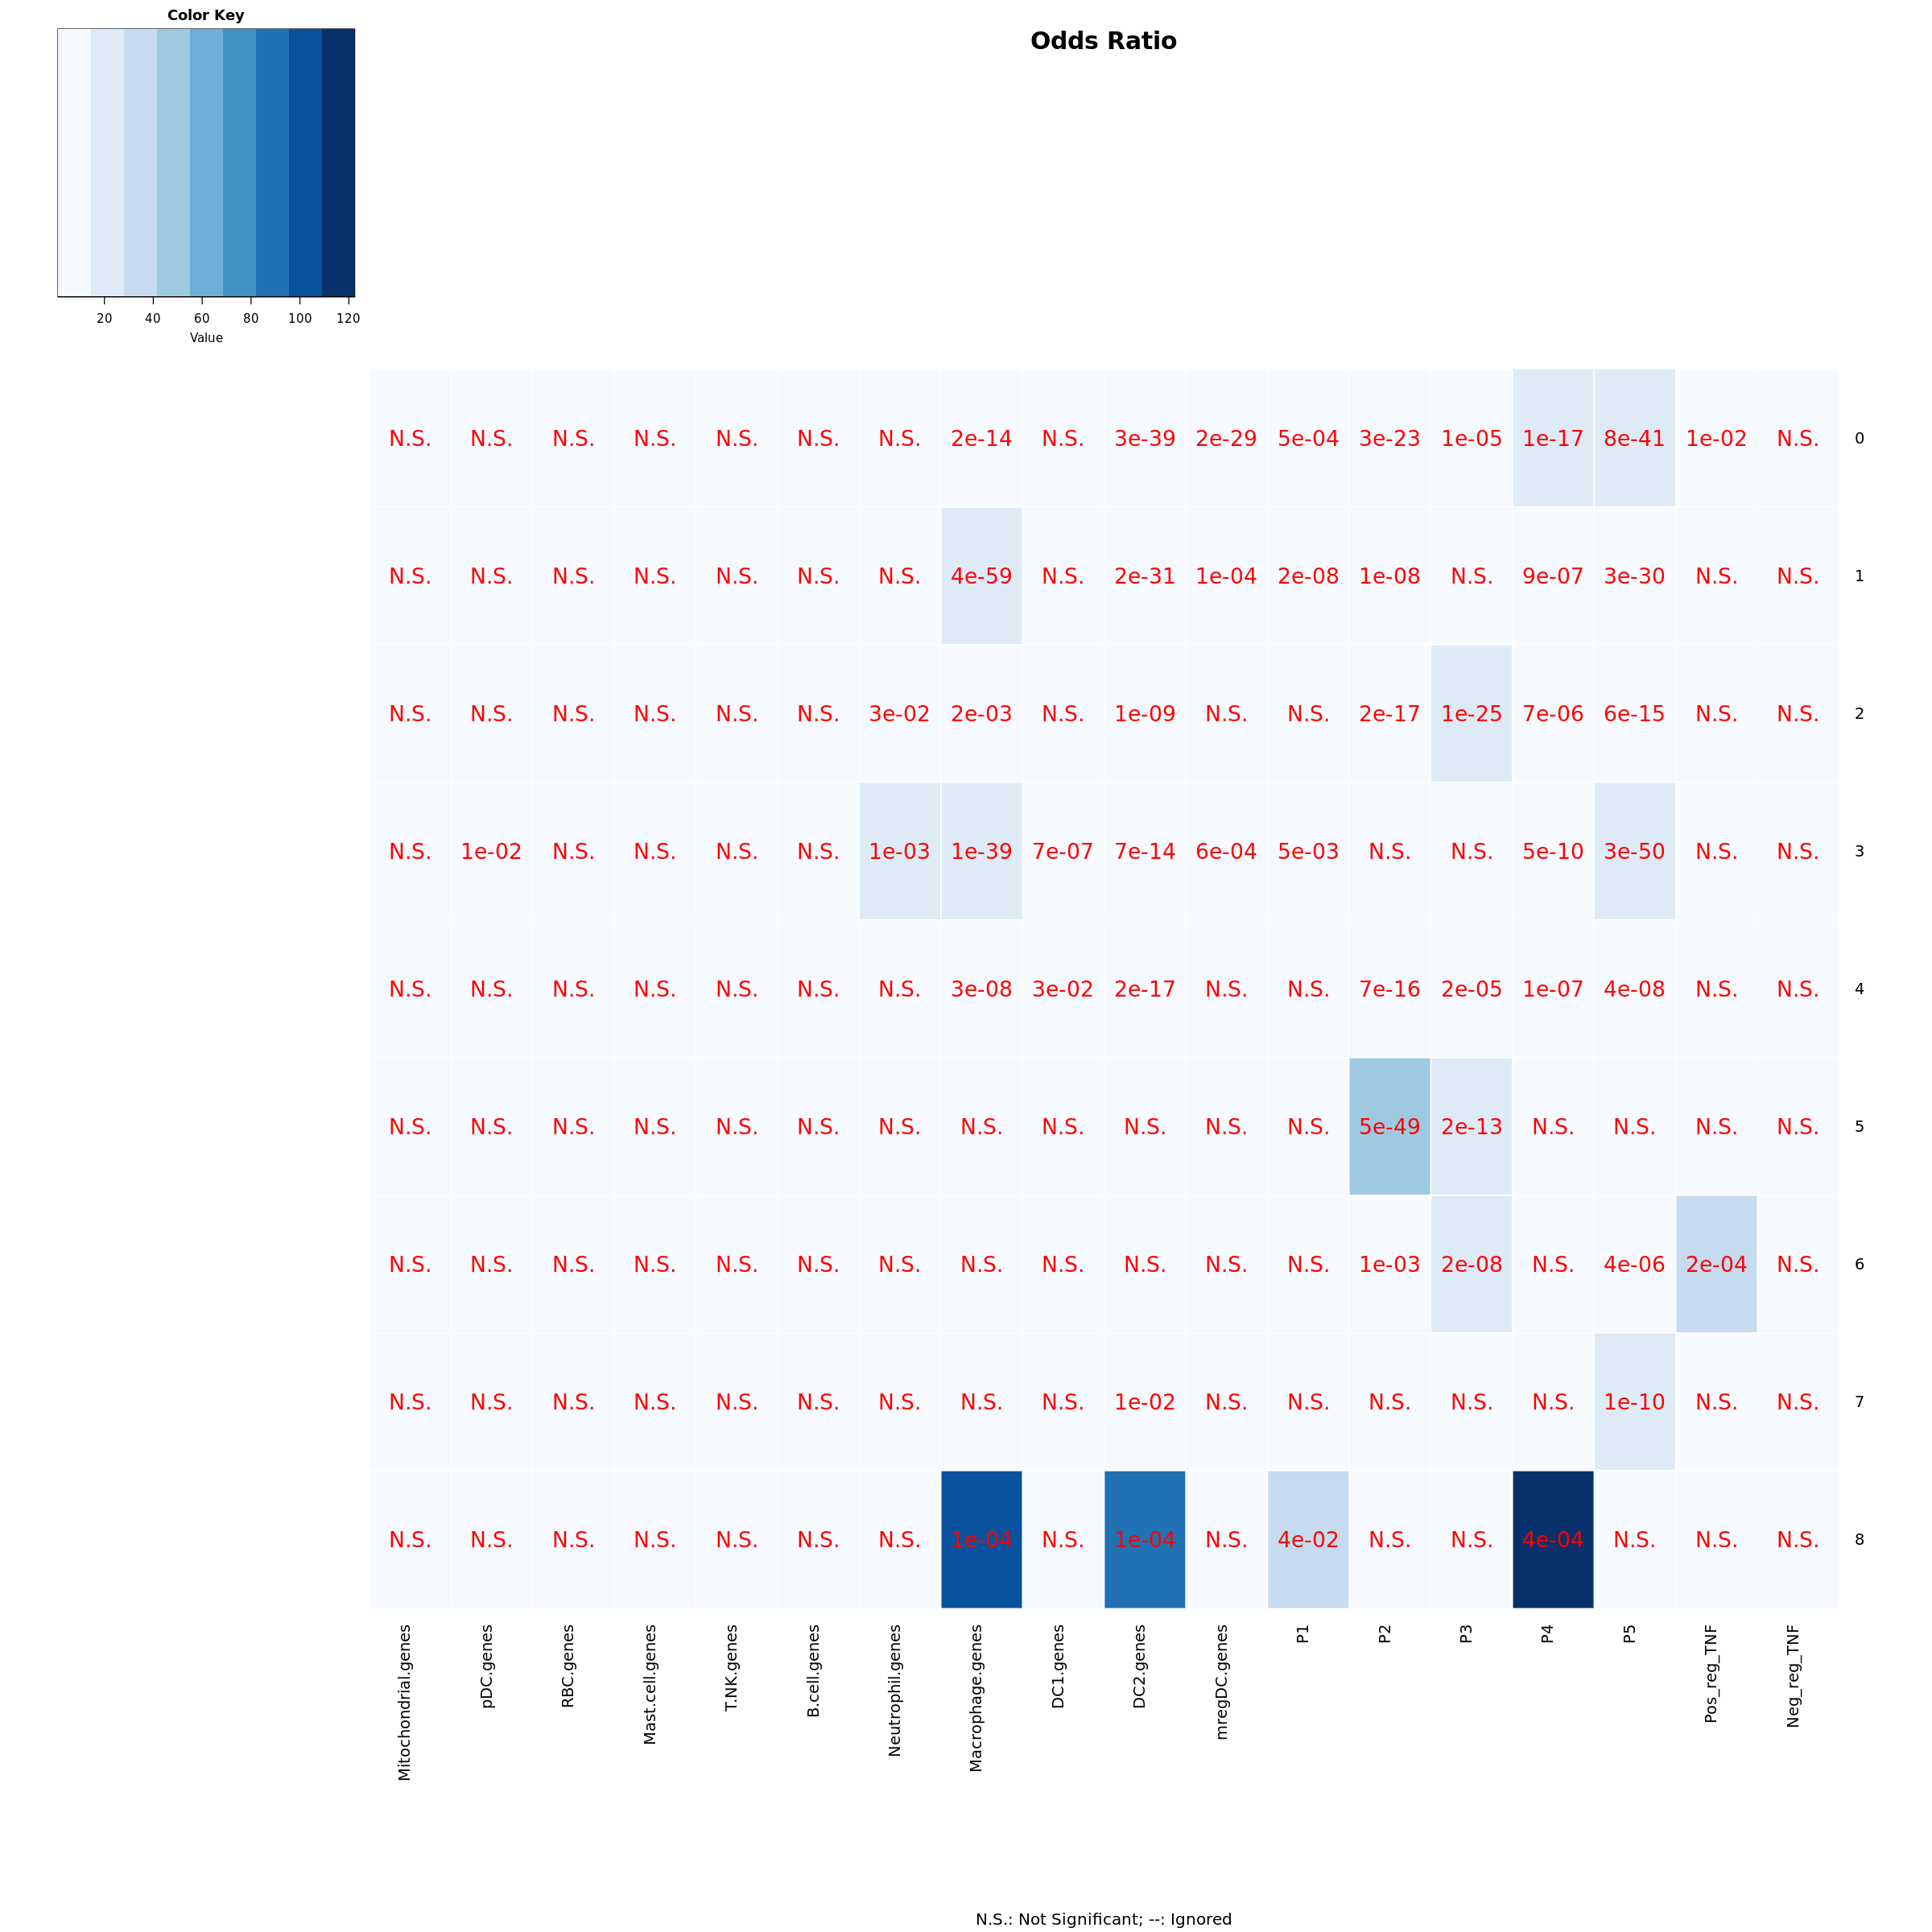

In [79]:
for(elem in geneModuleClusterings){
   print(elem)
   geneModulesN <- data.frame(read.csv(paste0("/home/beraslan/jovian-work/analysisSingle/Clustering_Trials/",elem,".csv")), row.names = 1)
   rownames(geneModulesN) <- geneModulesN$GeneName
   geneModulesNSplit = split(geneModulesN, f = geneModulesN$GeneGroup)
   geneModulesNSplit = sapply(geneModulesNSplit, function(x){return(as.character(x$GeneName))})
   gom.obj <- newGOM(gsetA = geneModulesNSplit, gsetB = allGeneSets, genome.size = 15000, spec = "mm9.gene")
   options(repr.plot.width=20, repr.plot.height=20)
   drawHeatmap(object = gom.obj, what = "Jaccard")
   drawHeatmap(object = gom.obj, what = "odds.ratio", grid.col="Blues")
}

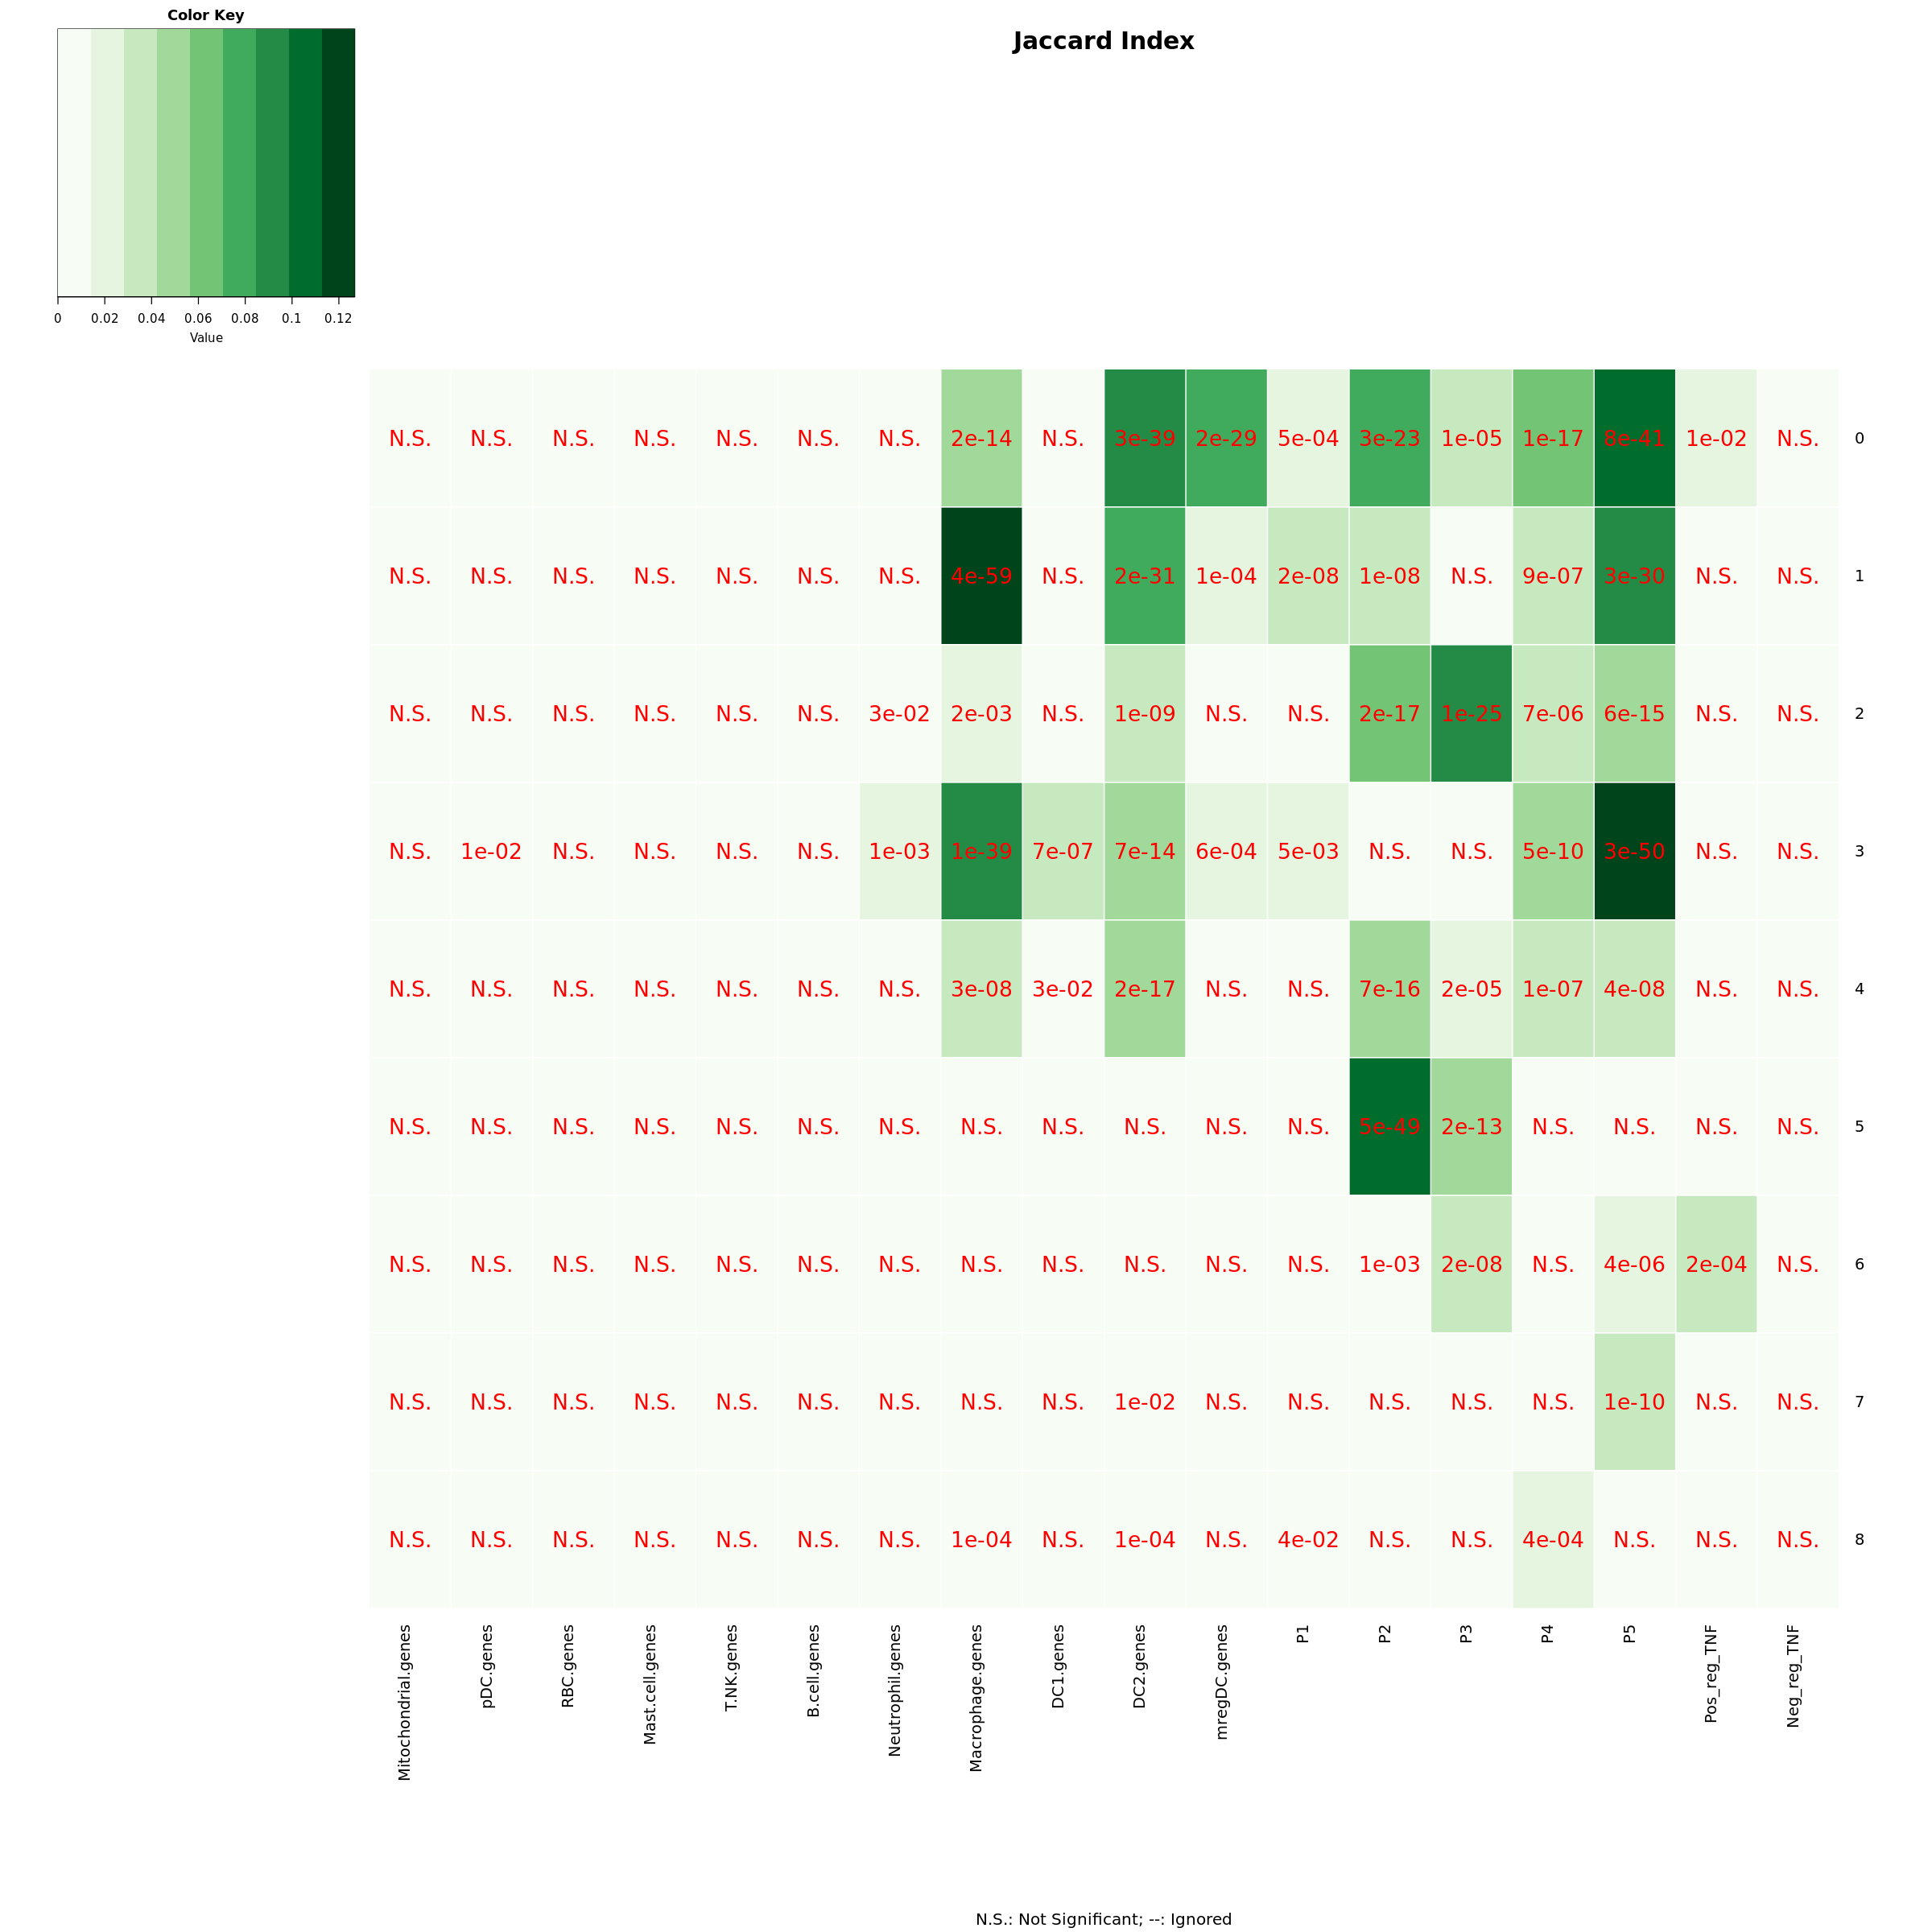

In [72]:
k <- drawHeatmap(object = gom.obj, what = "Jaccard")

In [78]:
str(k)

List of 10
 $ rowInd       : int [1:9] 9 8 7 6 5 4 3 2 1
 $ colInd       : int [1:18] 1 2 3 4 5 6 7 8 9 10 ...
 $ call         : language heatmap.2(x = plot.mat, Rowv = NA, Colv = NA, dendrogram = "none", scale = "none",      col = brewer.pal(ncolused| __truncated__ ...
 $ carpet       : num [1:18, 1:9] 0 0 0 0 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:18] "Mitochondrial.genes" "pDC.genes" "RBC.genes" "Mast.cell.genes" ...
  .. ..$ : chr [1:9] "8" "7" "6" "5" ...
 $ rowDendrogram:  ..--[dendrogram w/ 2 branches and 9 members at h = 1.41, midpoint = 0.996]
  ..  |--leaf 9 
  ..  `--[dendrogram w/ 2 branches and 8 members at h = 1.41, midpoint = 0.992]
  ..     |--leaf 8 
  ..     `--[dendrogram w/ 2 branches and 7 members at h = 1.41, midpoint = 0.984]
  ..        |--leaf 7 
  ..        `--[dendrogram w/ 2 branches and 6 members at h = 1.41, midpoint = 0.969]
  ..           |--leaf 6 
  ..           `--[dendrogram w/ 2 branches and 5 members at h = 1.41, midpoint = 0.9

In [53]:
elem="ME_GeneModules_biClustering_10_Modules"

In [54]:
geneModulesN <- data.frame(read.csv(paste0("/home/beraslan/jovian-work/analysisSingle/Clustering_Trials/",elem,".csv")), row.names = 1)


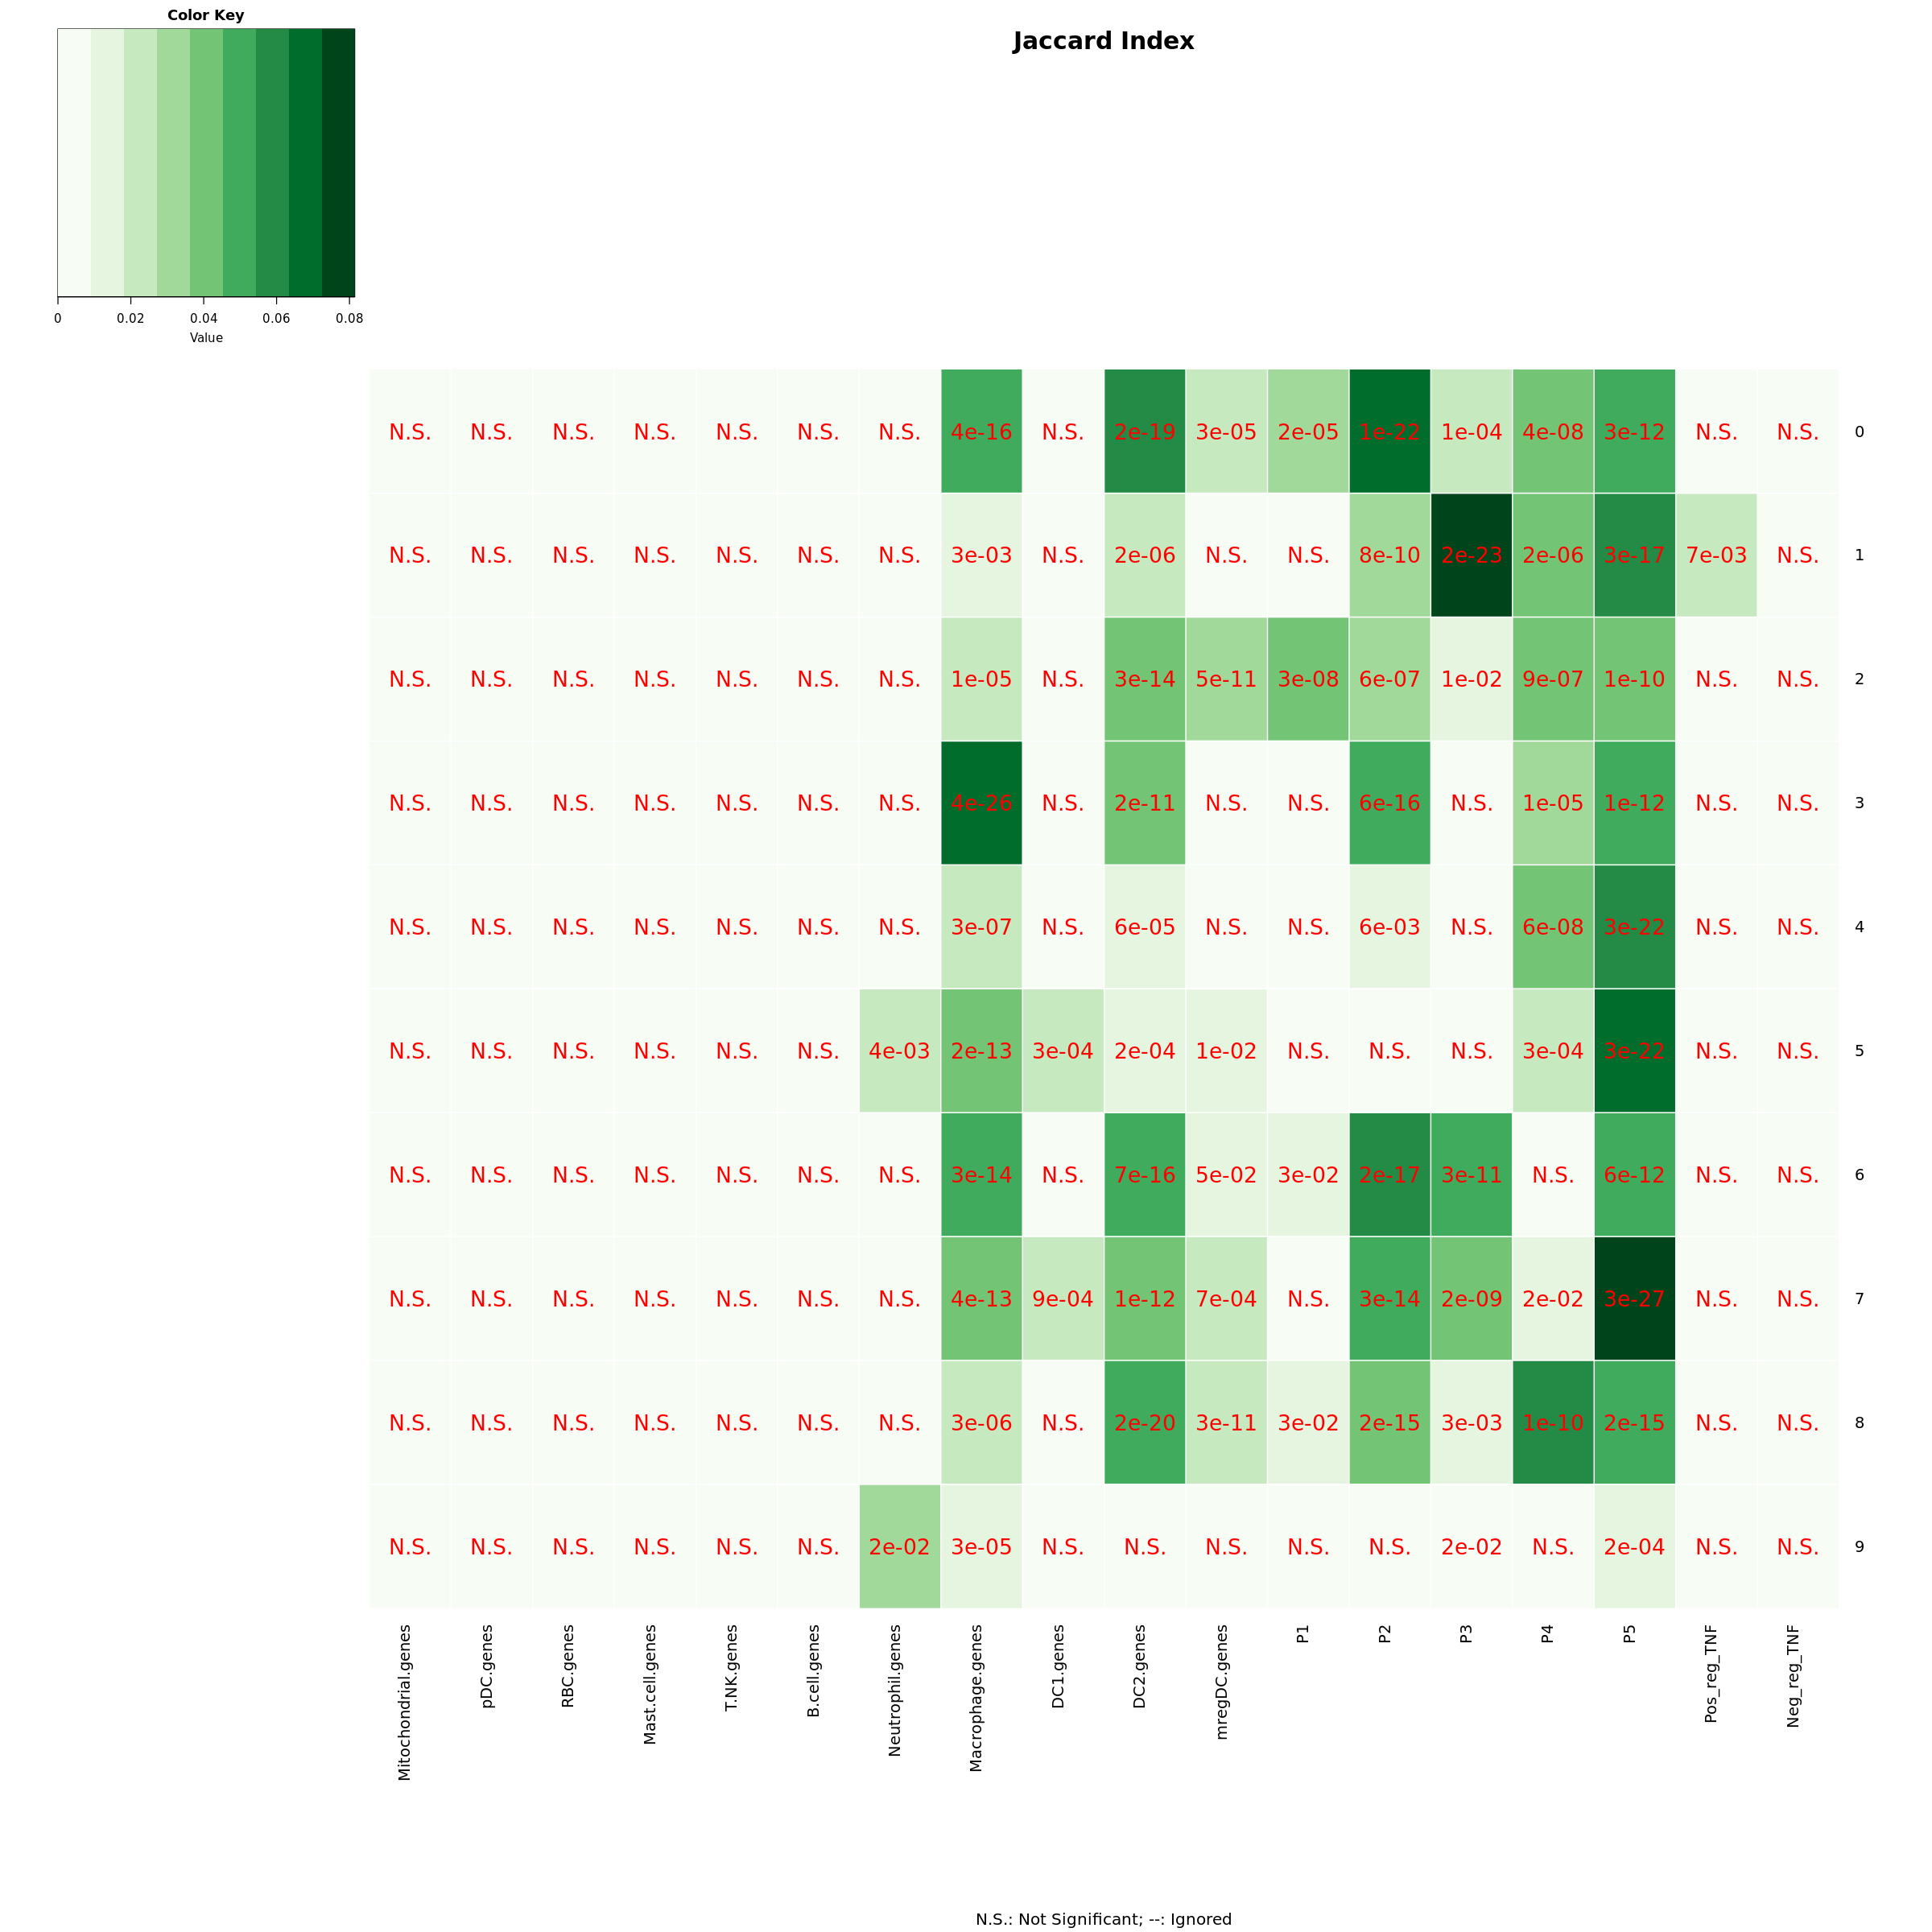

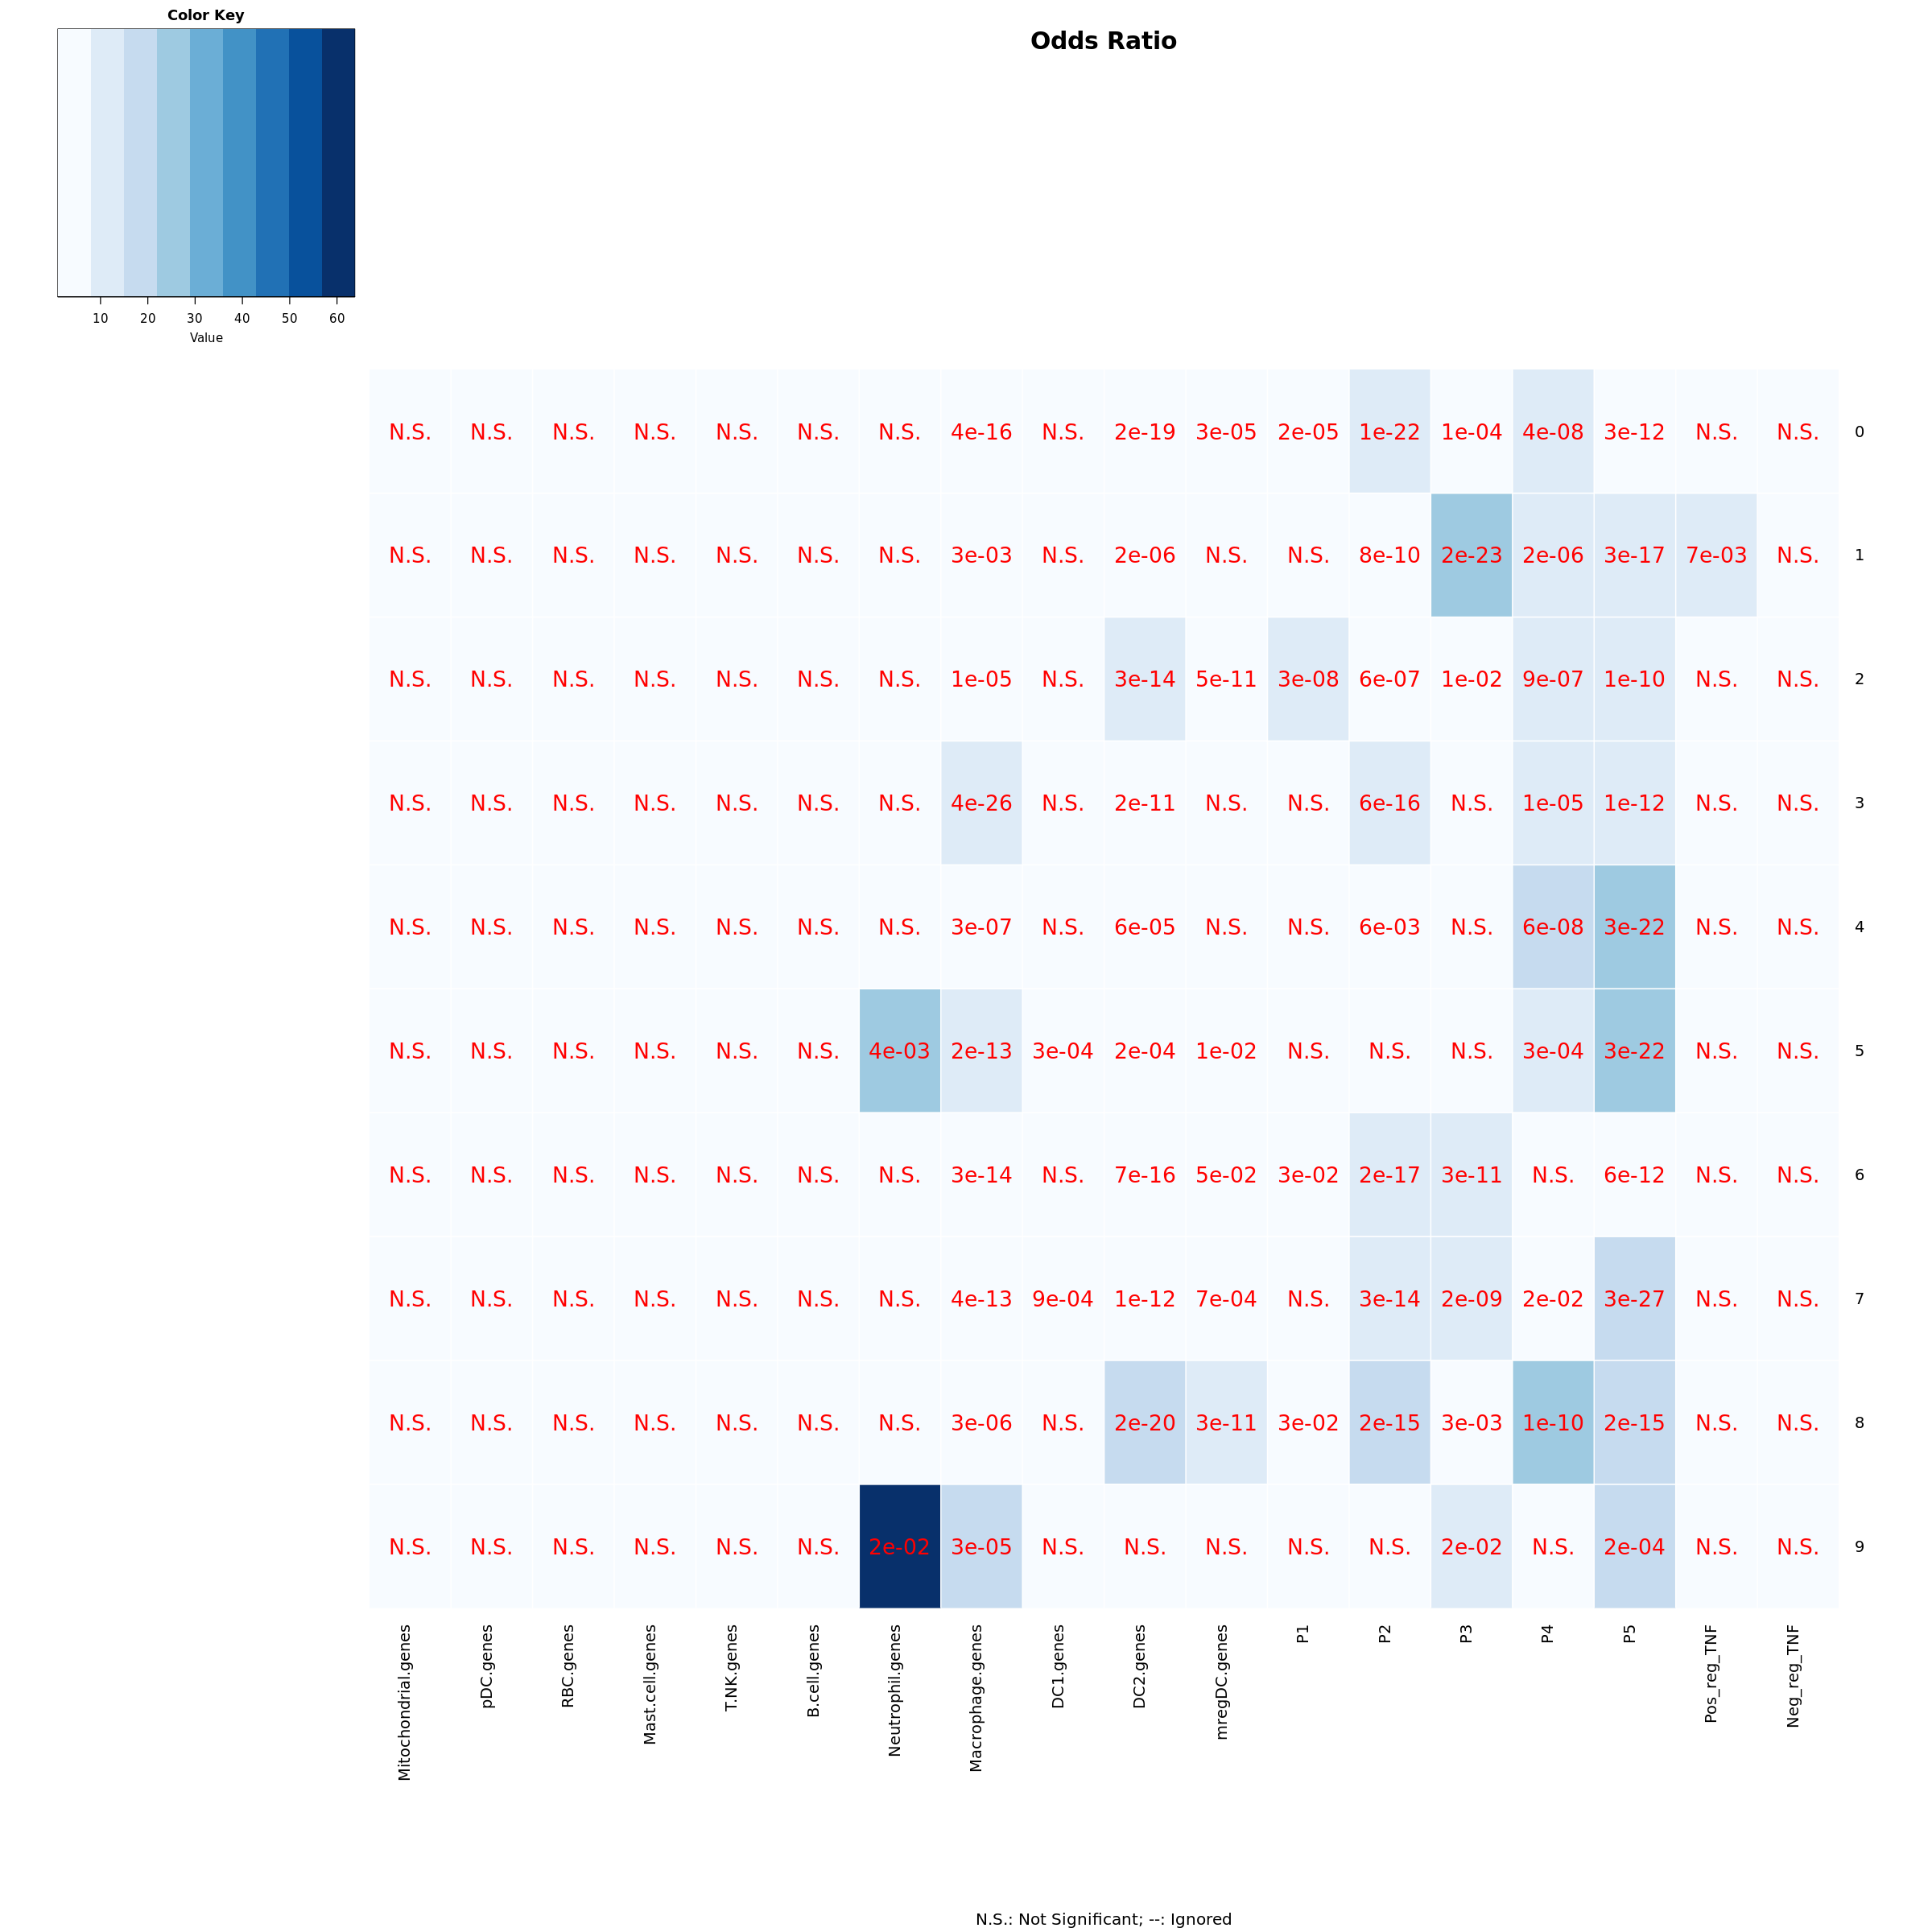